In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.stats as sp_stats
from sklearn.model_selection import train_test_split as tts
from collections import Counter as colCounter
from imblearn.over_sampling import SMOTE as SyntheticMinorityOverSamplingTechnique
from sklearn.metrics import accuracy_score as acc_score, confusion_matrix as conf_matrix, classification_report as class_report
from sklearn import metrics as sk_metrics
from sklearn.ensemble import RandomForestClassifier as RFC
from catboost import CatBoostClassifier as CatBoost
from xgboost import XGBClassifier as XGBoost
from sklearn.svm import SVC as SupportVectorClassifier
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neighbors import KNeighborsClassifier as KNN
import joblib as jb


In [2]:
# Read the dataset
weather_data = pd.read_csv("weatherAUS.csv")

# Set pandas option to display all columns
pd.set_option("display.max_columns", None)

# Display the dataframe
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
# Identify numerical features
num_features = [col for col in weather_data.columns if weather_data[col].dtypes != 'O']

# Identify discrete numerical features
disc_features = [col for col in num_features if len(weather_data[col].unique()) < 25]

# Identify continuous numerical features
cont_features = [col for col in num_features if col not in disc_features]

# Identify categorical features
cat_features = [col for col in weather_data.columns if col not in num_features]

# Print the counts of each type of feature
print("Numerical Features Count {}".format(len(num_features)))
print("Discrete Features Count {}".format(len(disc_features)))
print("Continuous Features Count {}".format(len(cont_features)))
print("Categorical Features Count {}".format(len(cat_features)))


Numerical Features Count 16
Discrete Features Count 2
Continuous Features Count 14
Categorical Features Count 7


In [4]:
# Calculate the percentage of missing values for each column
missing_values_percentage = weather_data.isnull().sum() * 100 / len(weather_data)

# Display the missing values percentage
missing_values_percentage


Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [5]:
# Print the list of numerical features
print(num_features)


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [6]:
def random_sample_imputation(data, variable):
    data[variable] = data[variable]
    random_sample = data[variable].dropna().sample(data[variable].isnull().sum(), random_state=0)
    random_sample.index = data[data[variable].isnull()].index
    data.loc[data[variable].isnull(), variable] = random_sample


In [7]:
random_sample_imputation(weather_data, "Cloud9am")
random_sample_imputation(weather_data, "Cloud3pm")
random_sample_imputation(weather_data, "Evaporation")
random_sample_imputation(weather_data, "Sunshine")


In [7]:
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2417356391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = weather_data.corr(method="spearman")


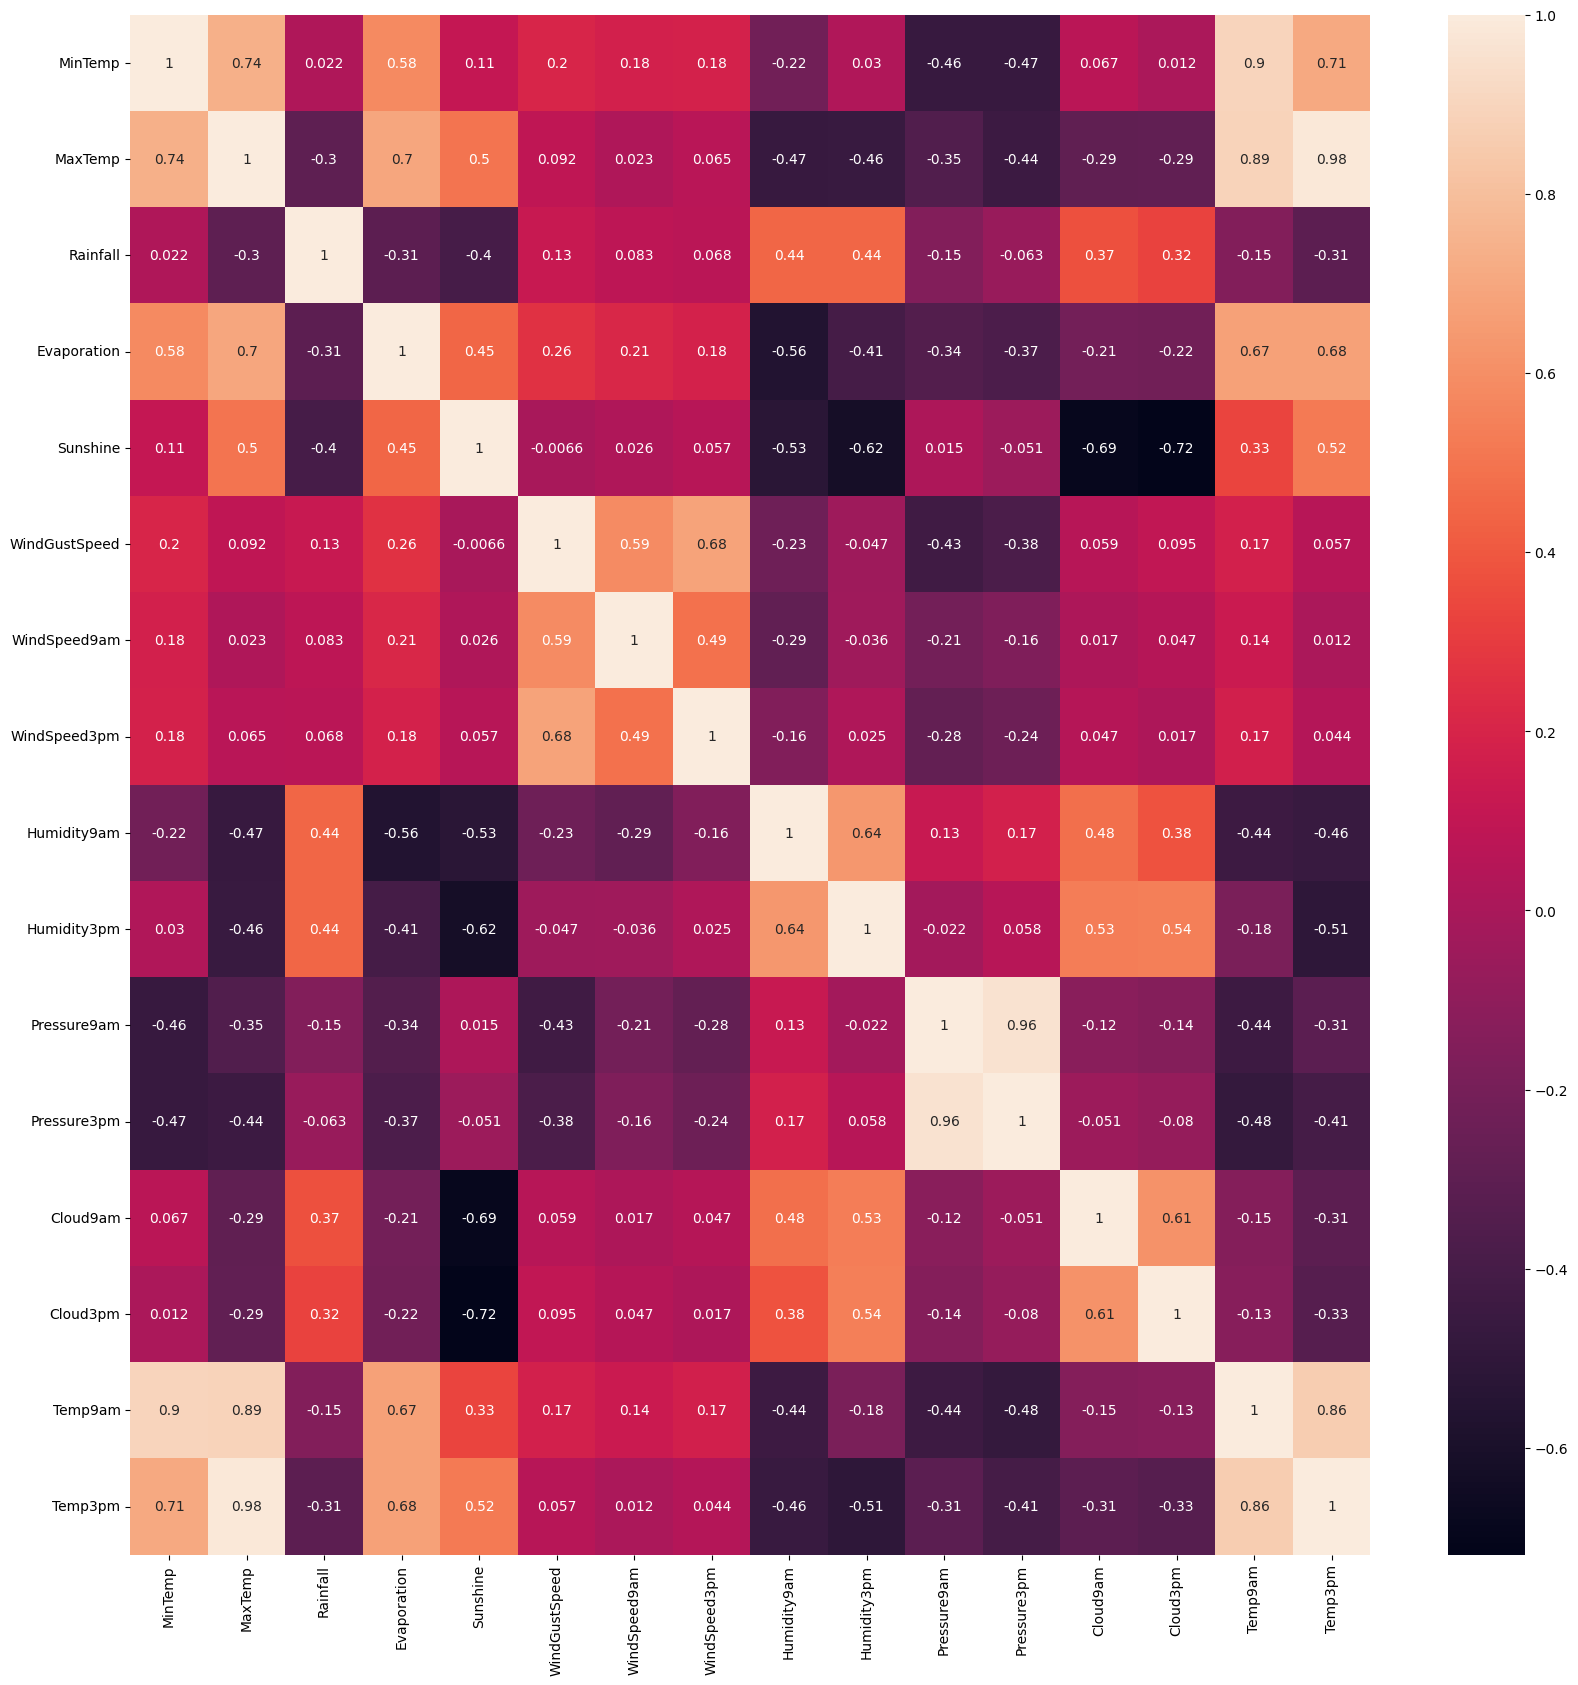

In [8]:


# Compute the correlation matrix using Spearman method
corr_matrix = weather_data.corr(method="spearman")

# Set up the figure size
plt.figure(figsize=(20, 20))

# Plot the heatmap
sns_heatmap = sns.heatmap(corr_matrix, annot=True)

# Show the plot
plt.show()


C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


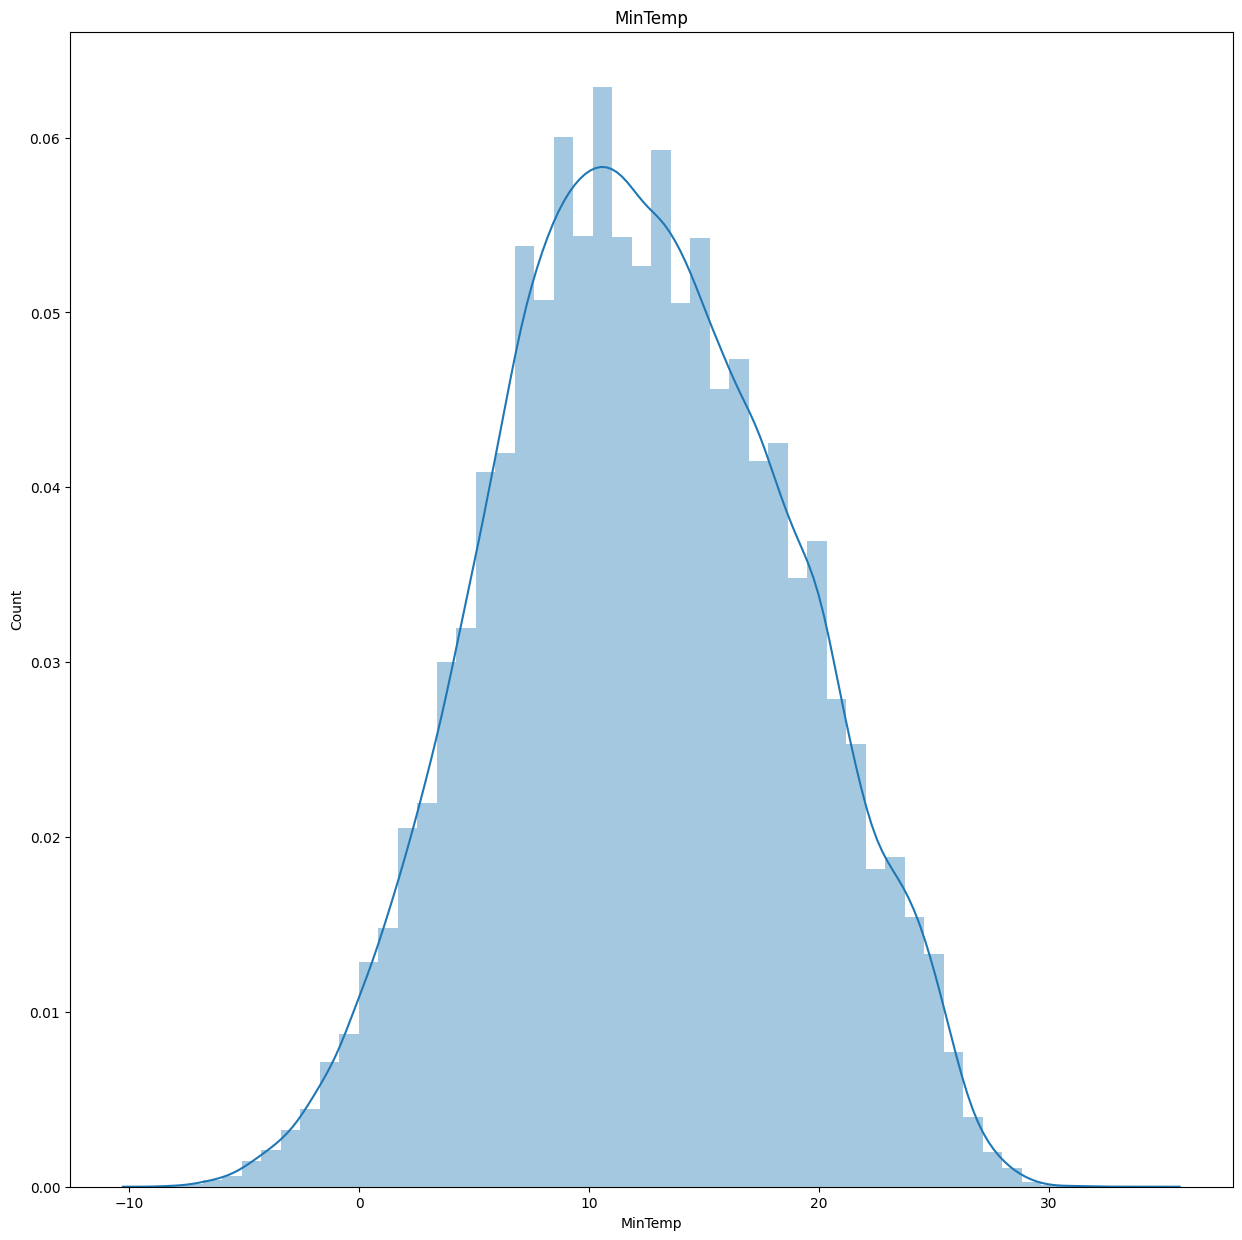

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


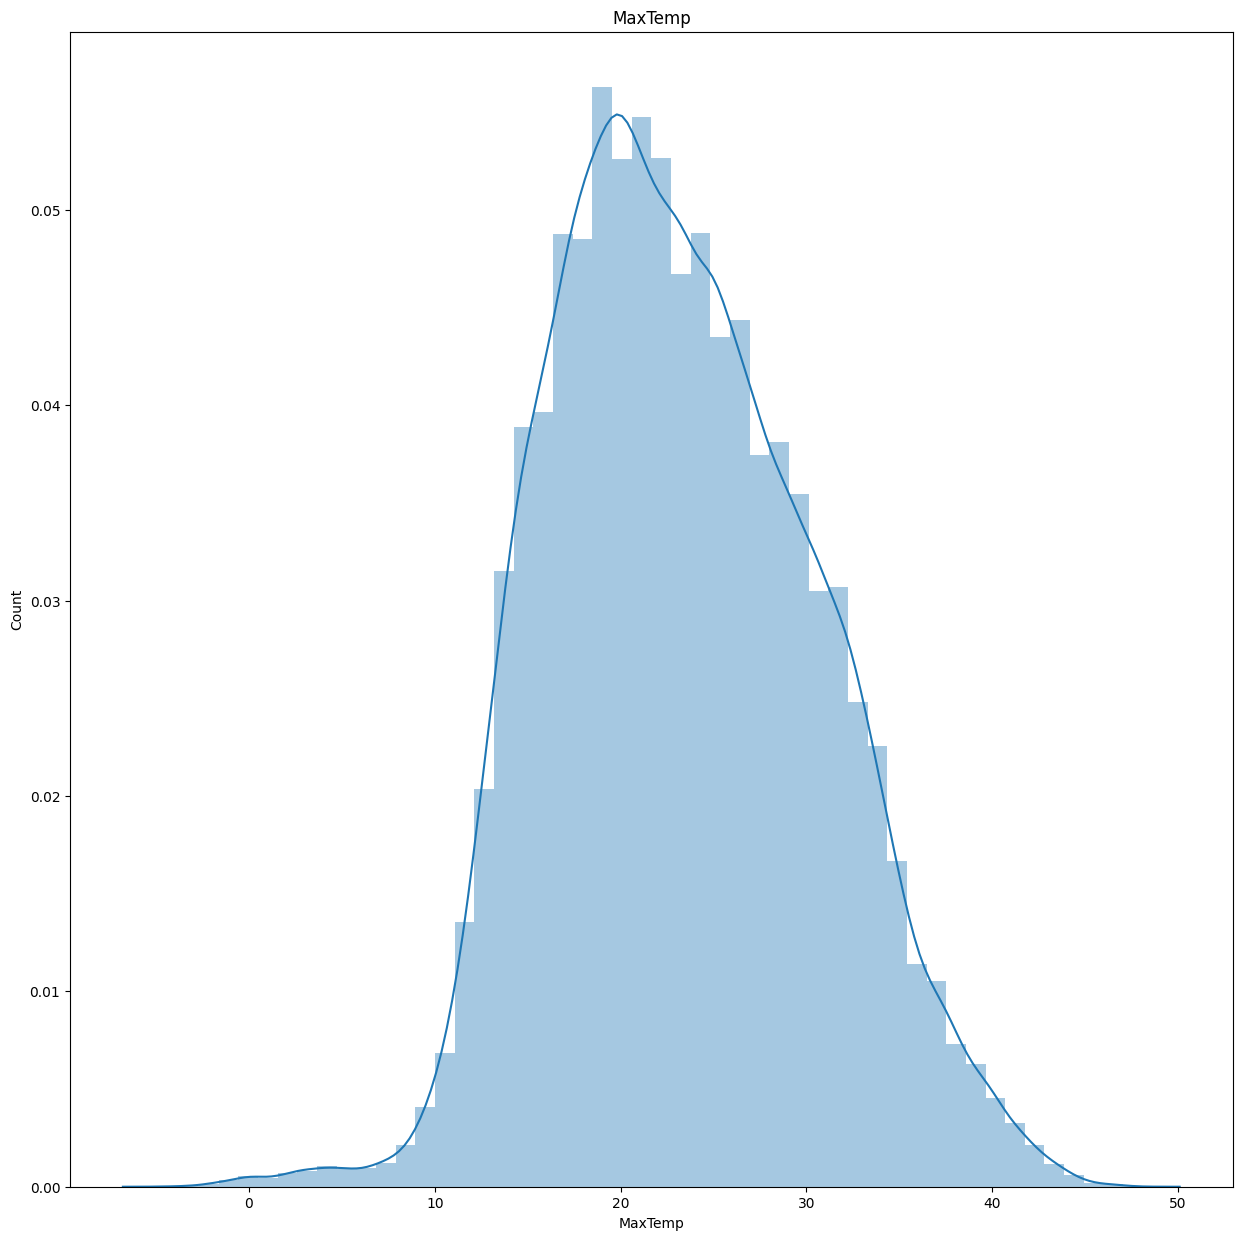

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


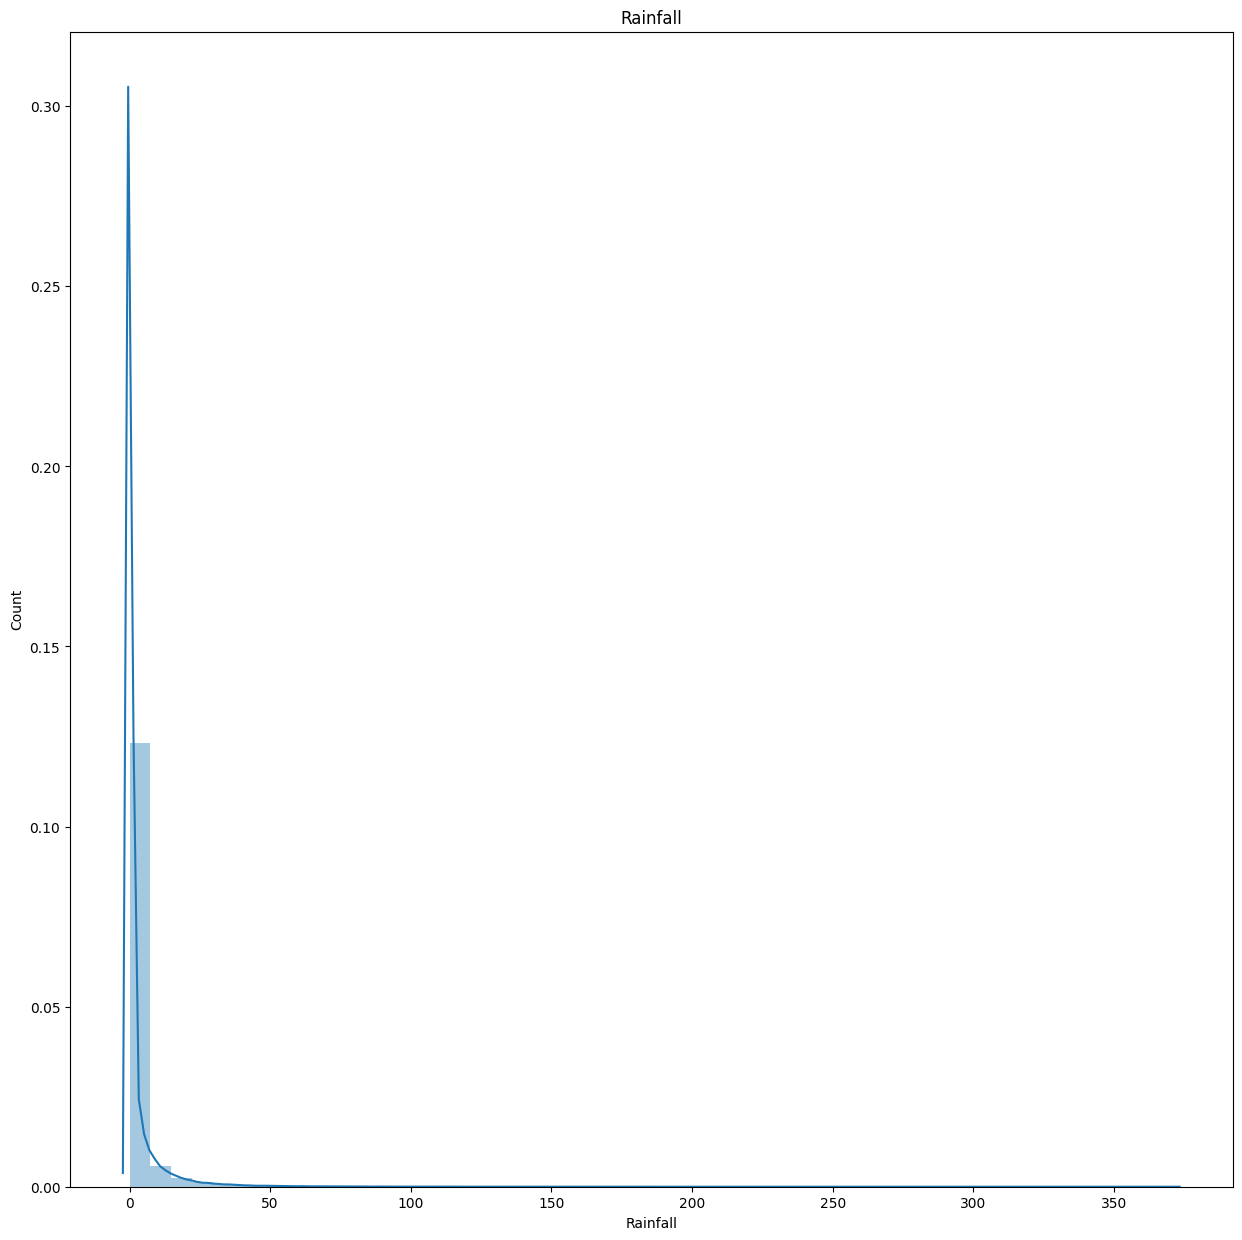

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


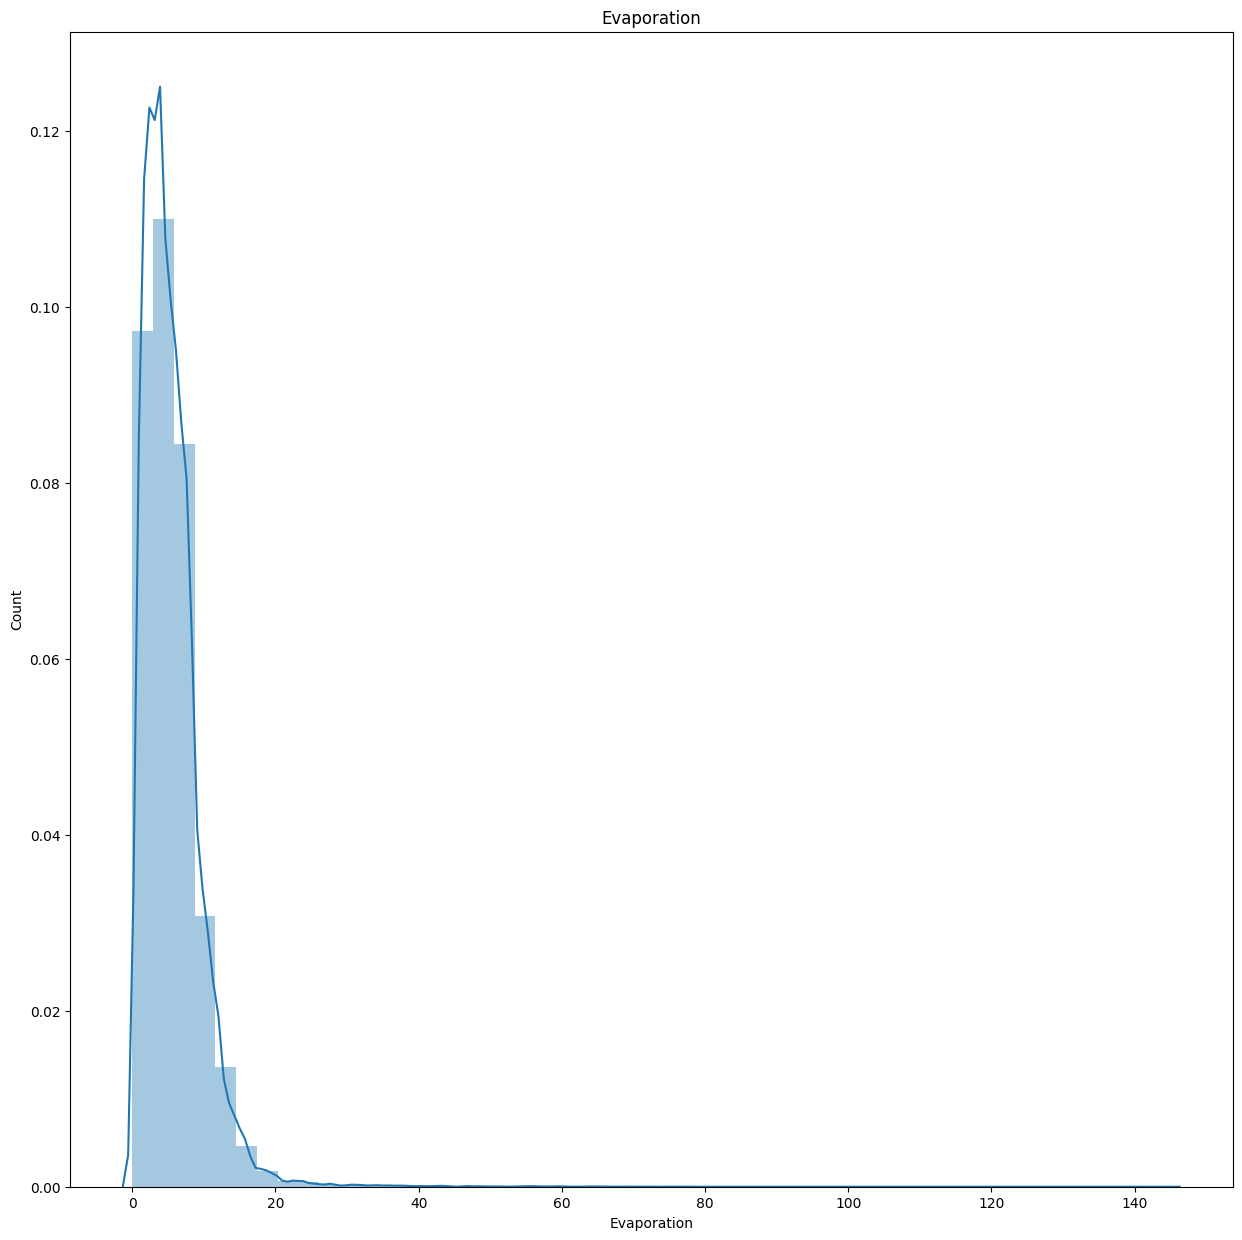

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


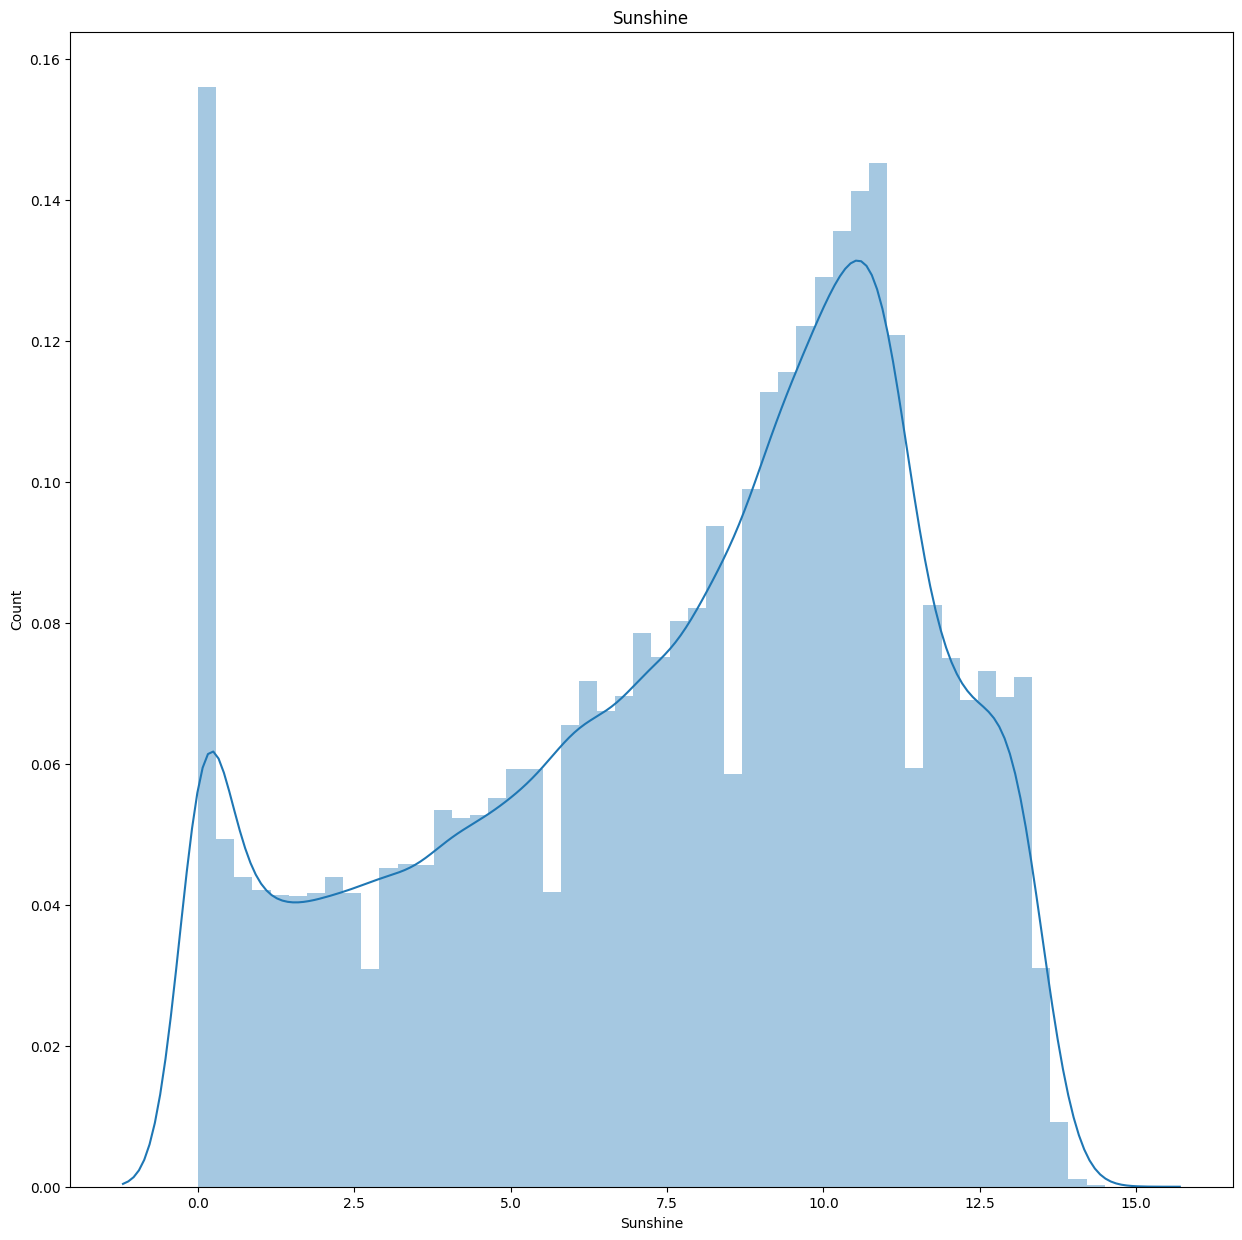

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


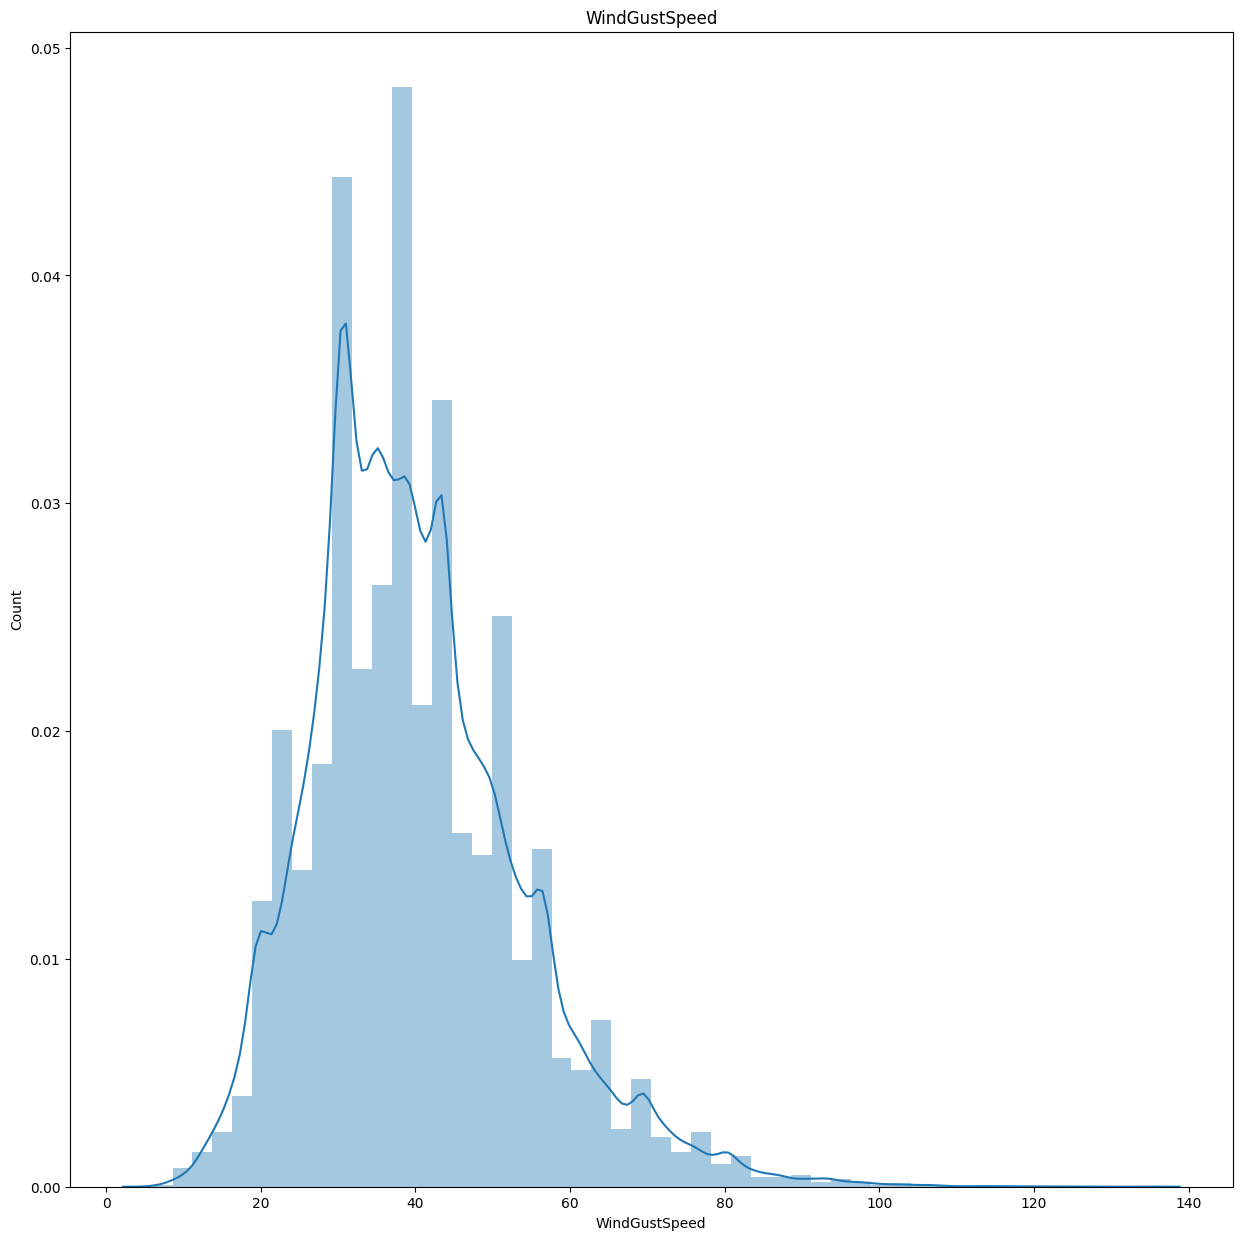

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


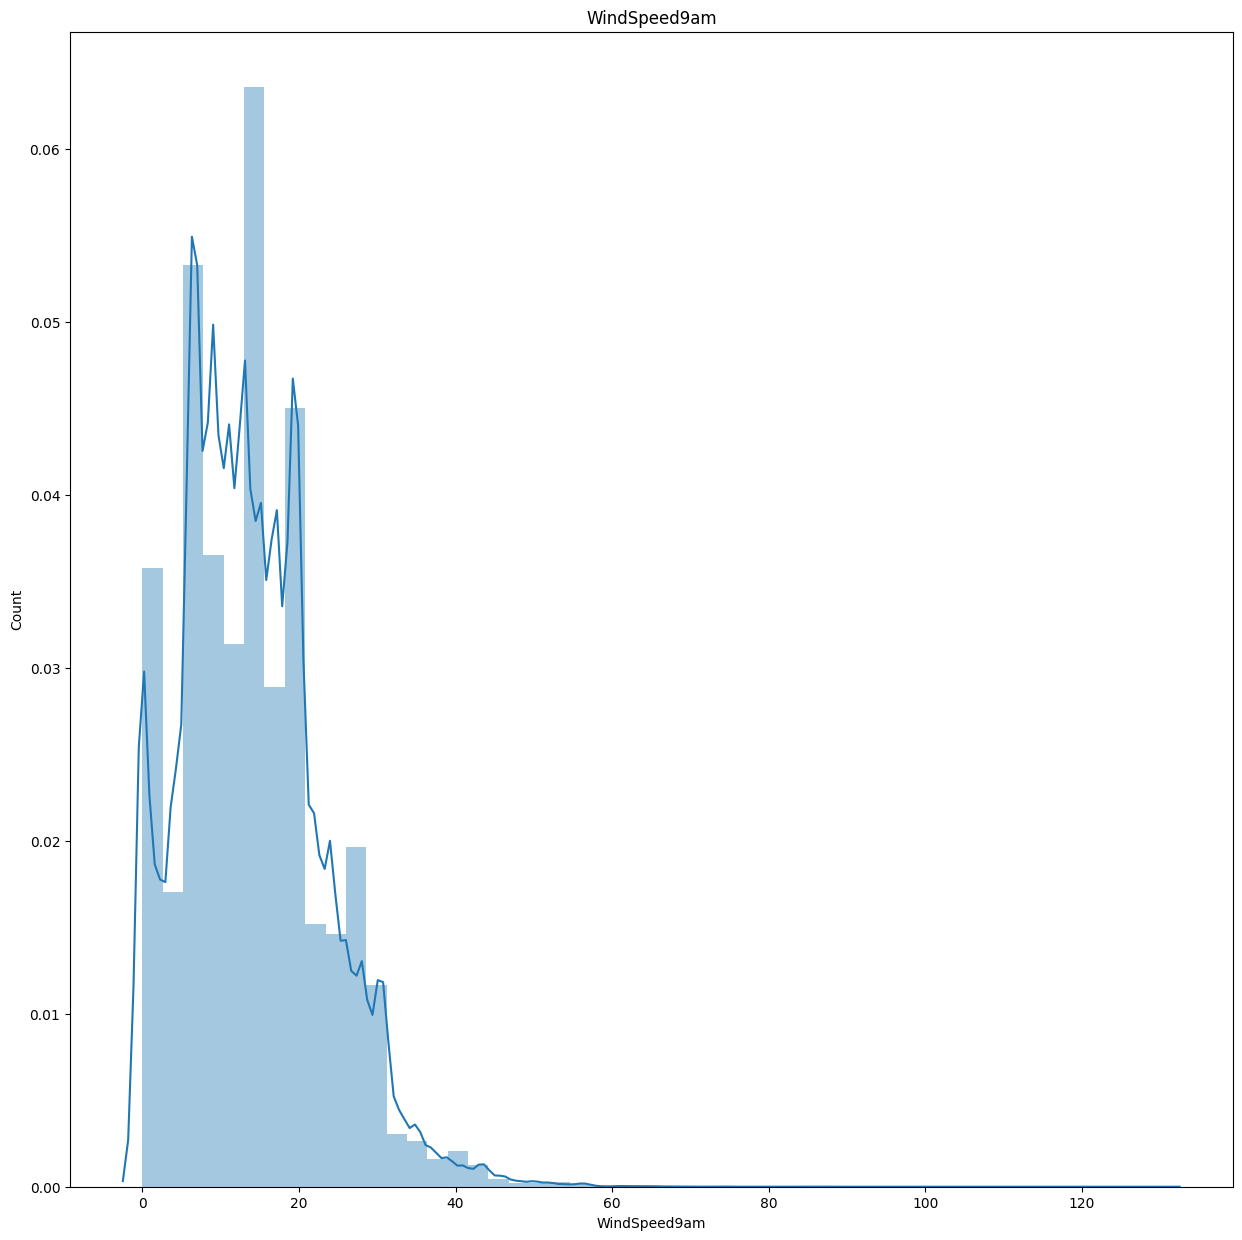

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


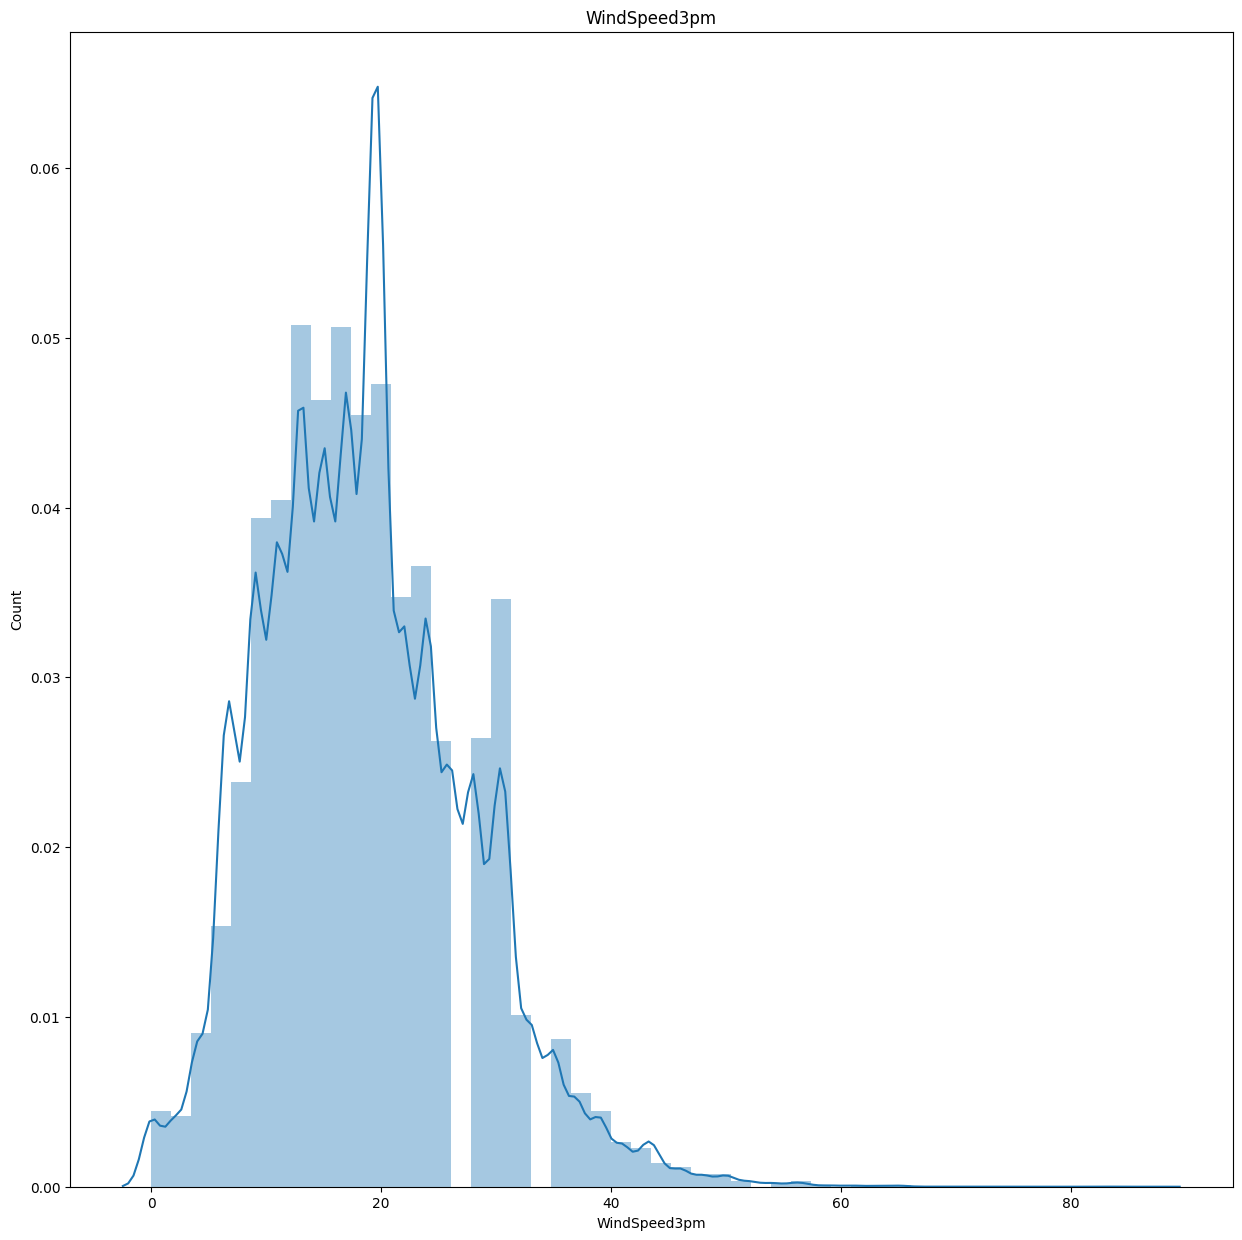

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


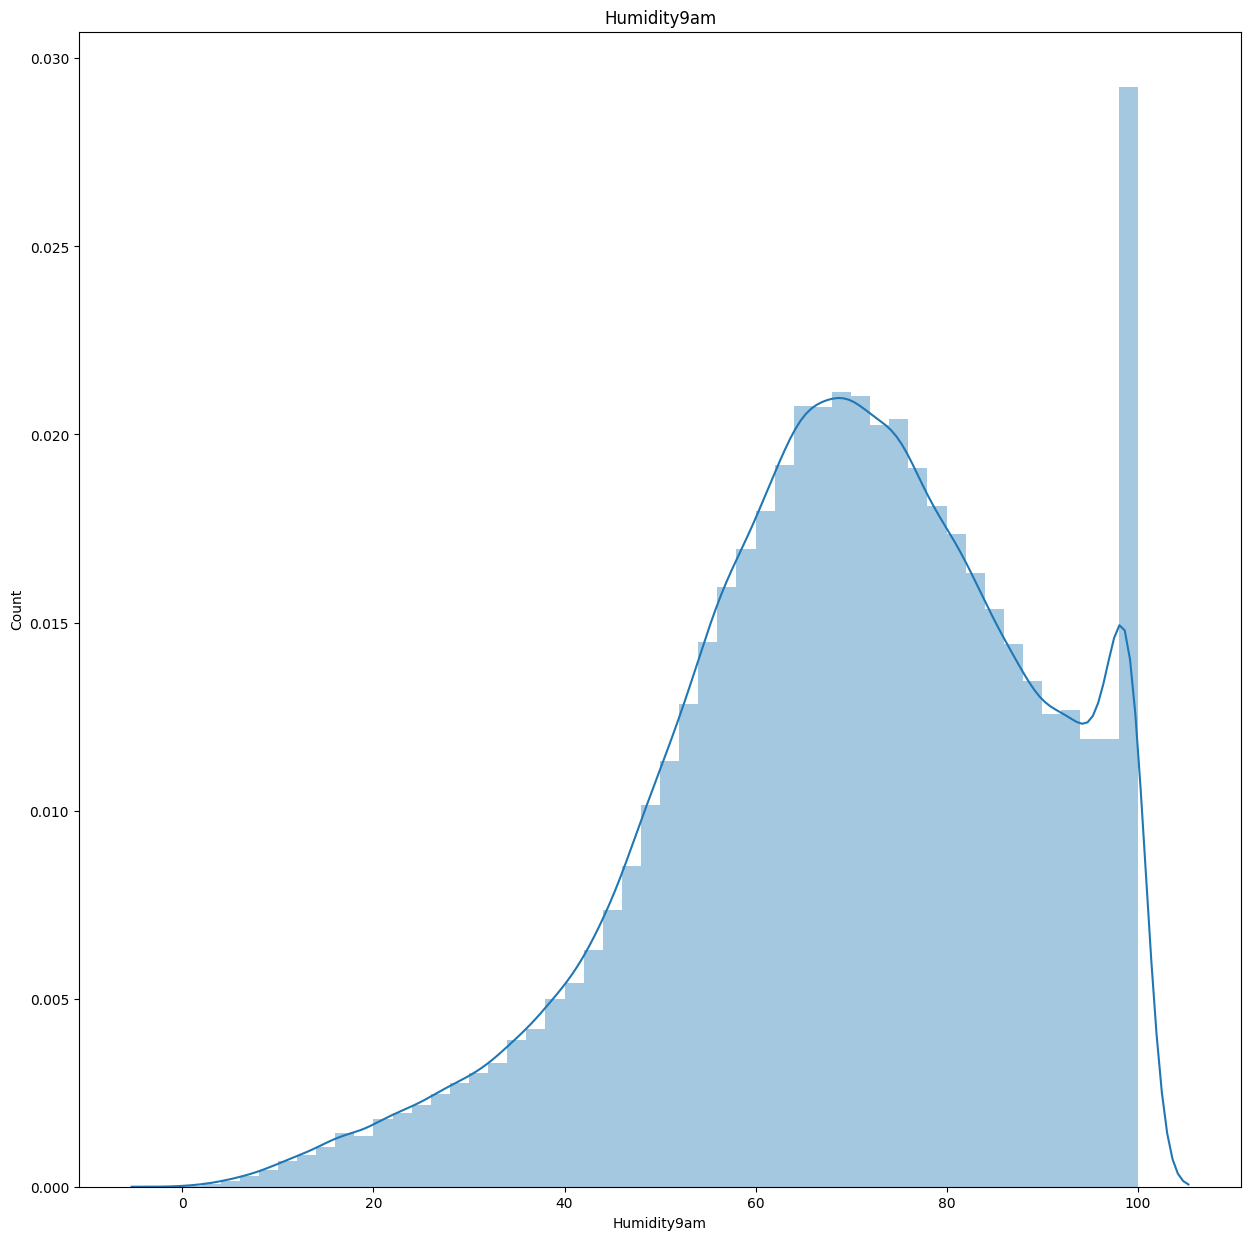

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


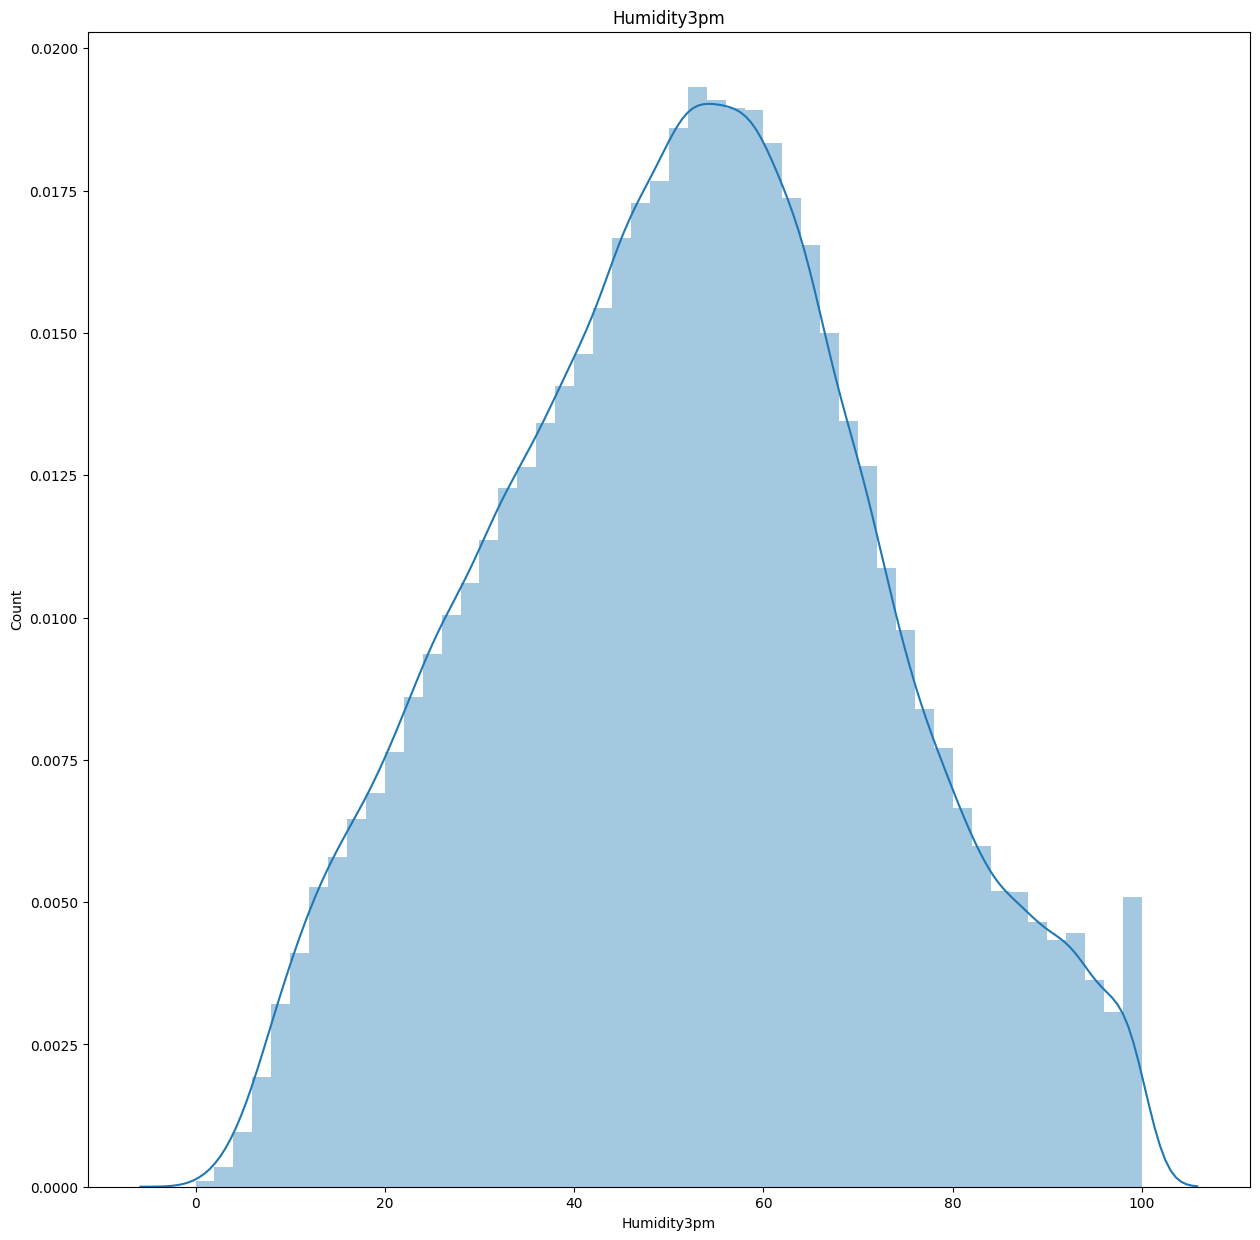

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


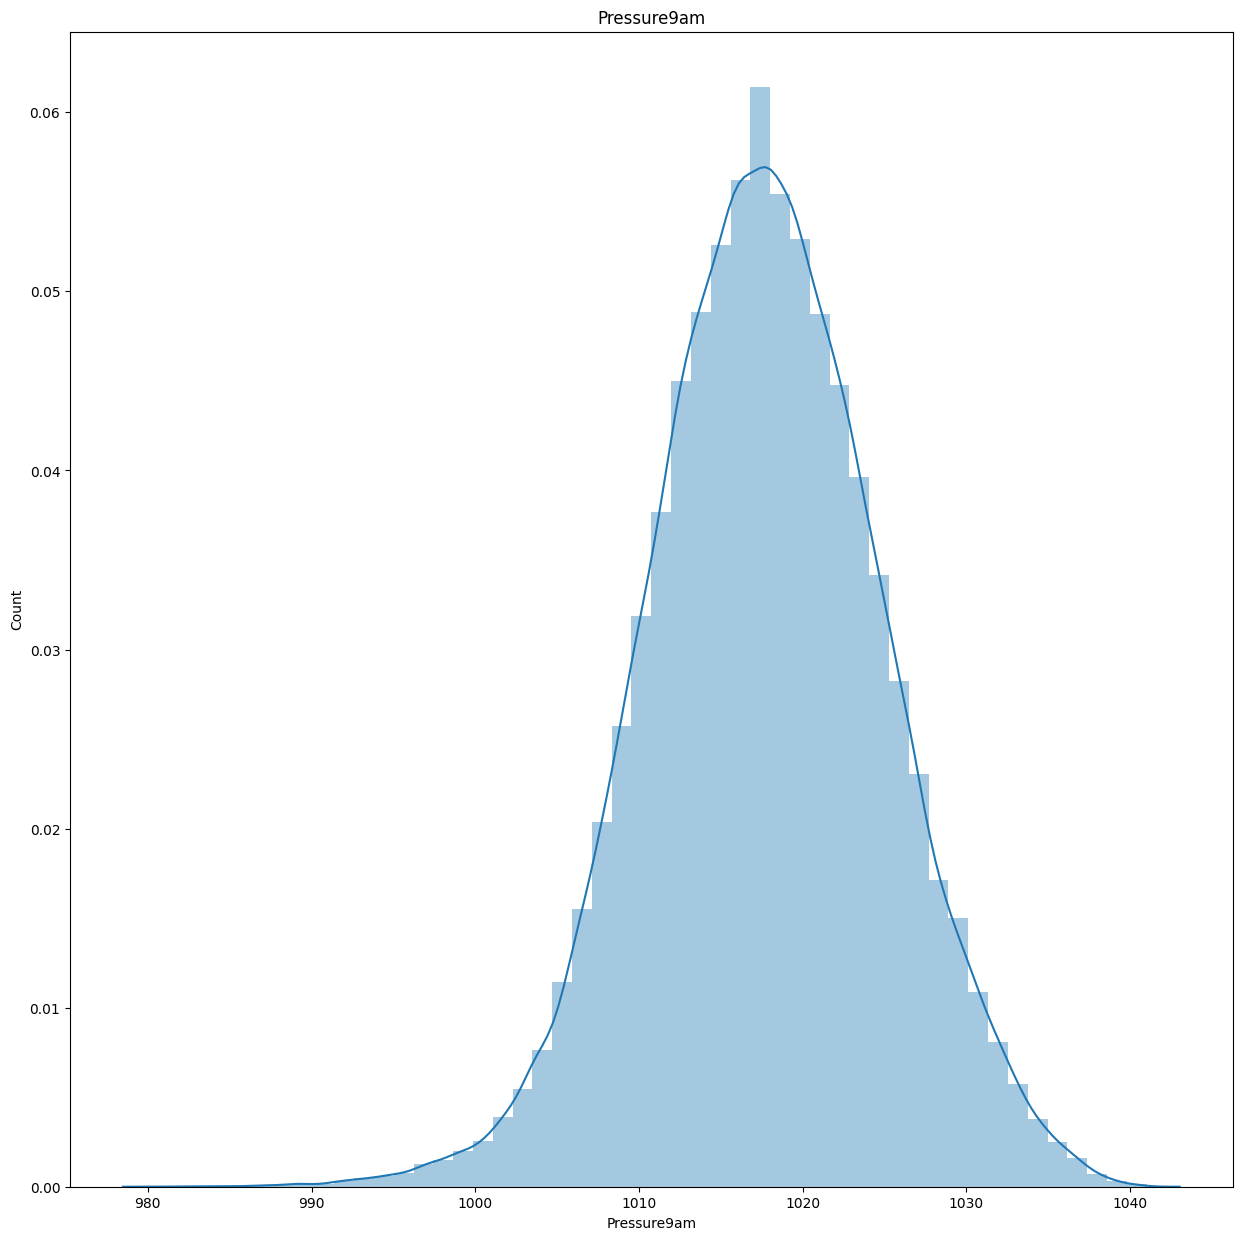

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


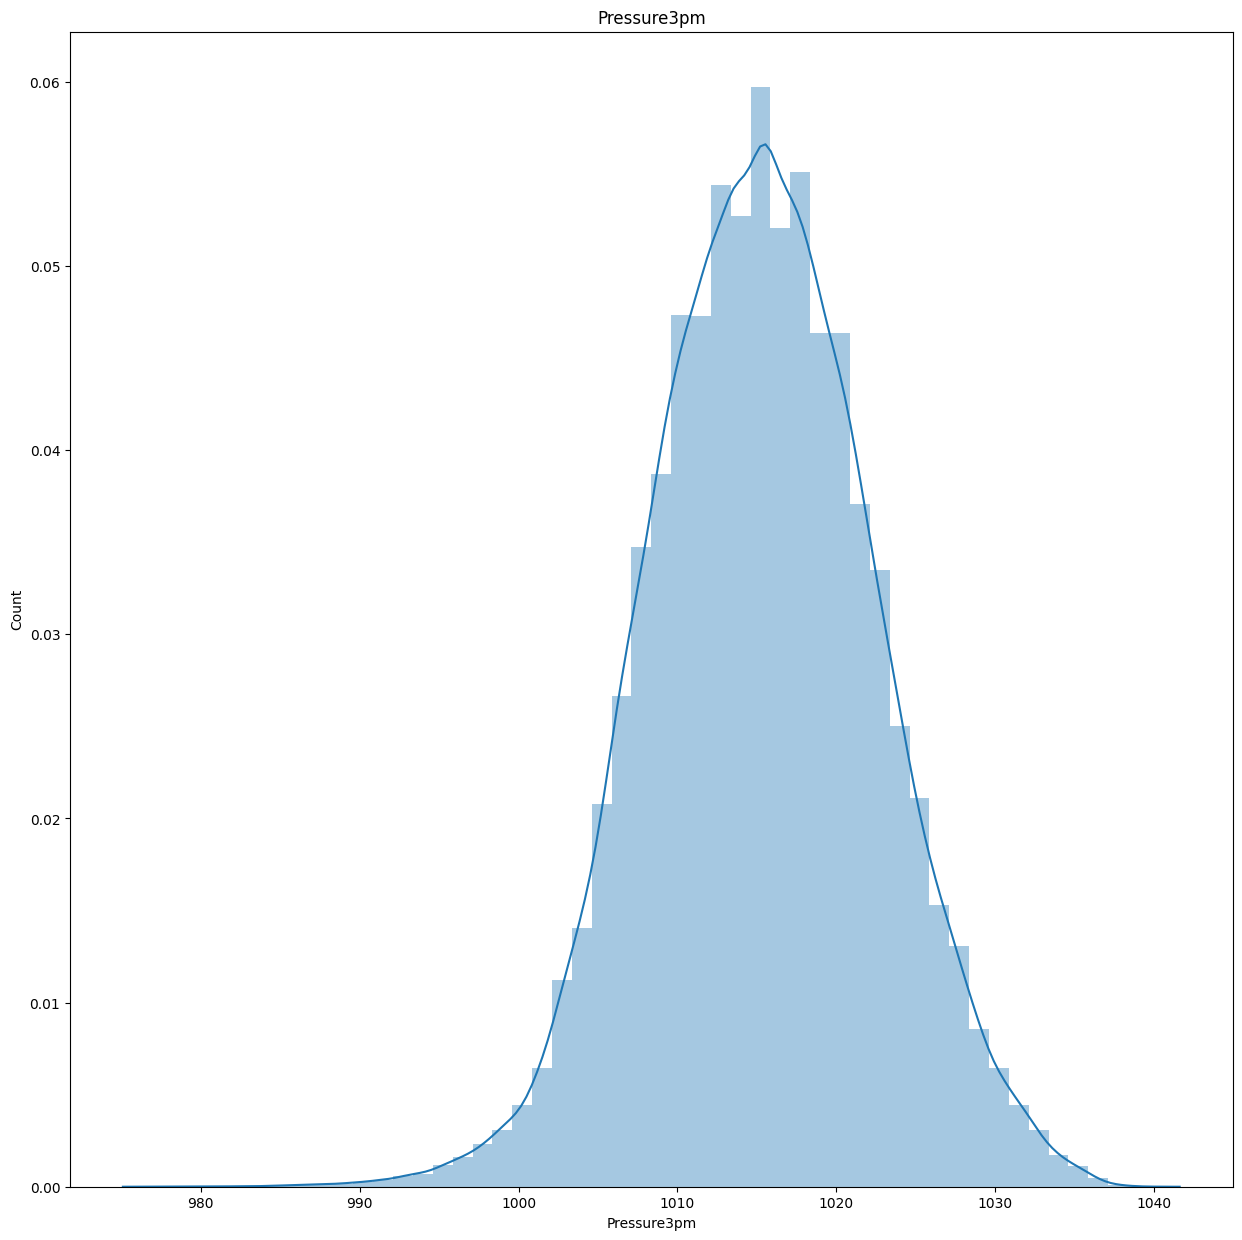

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


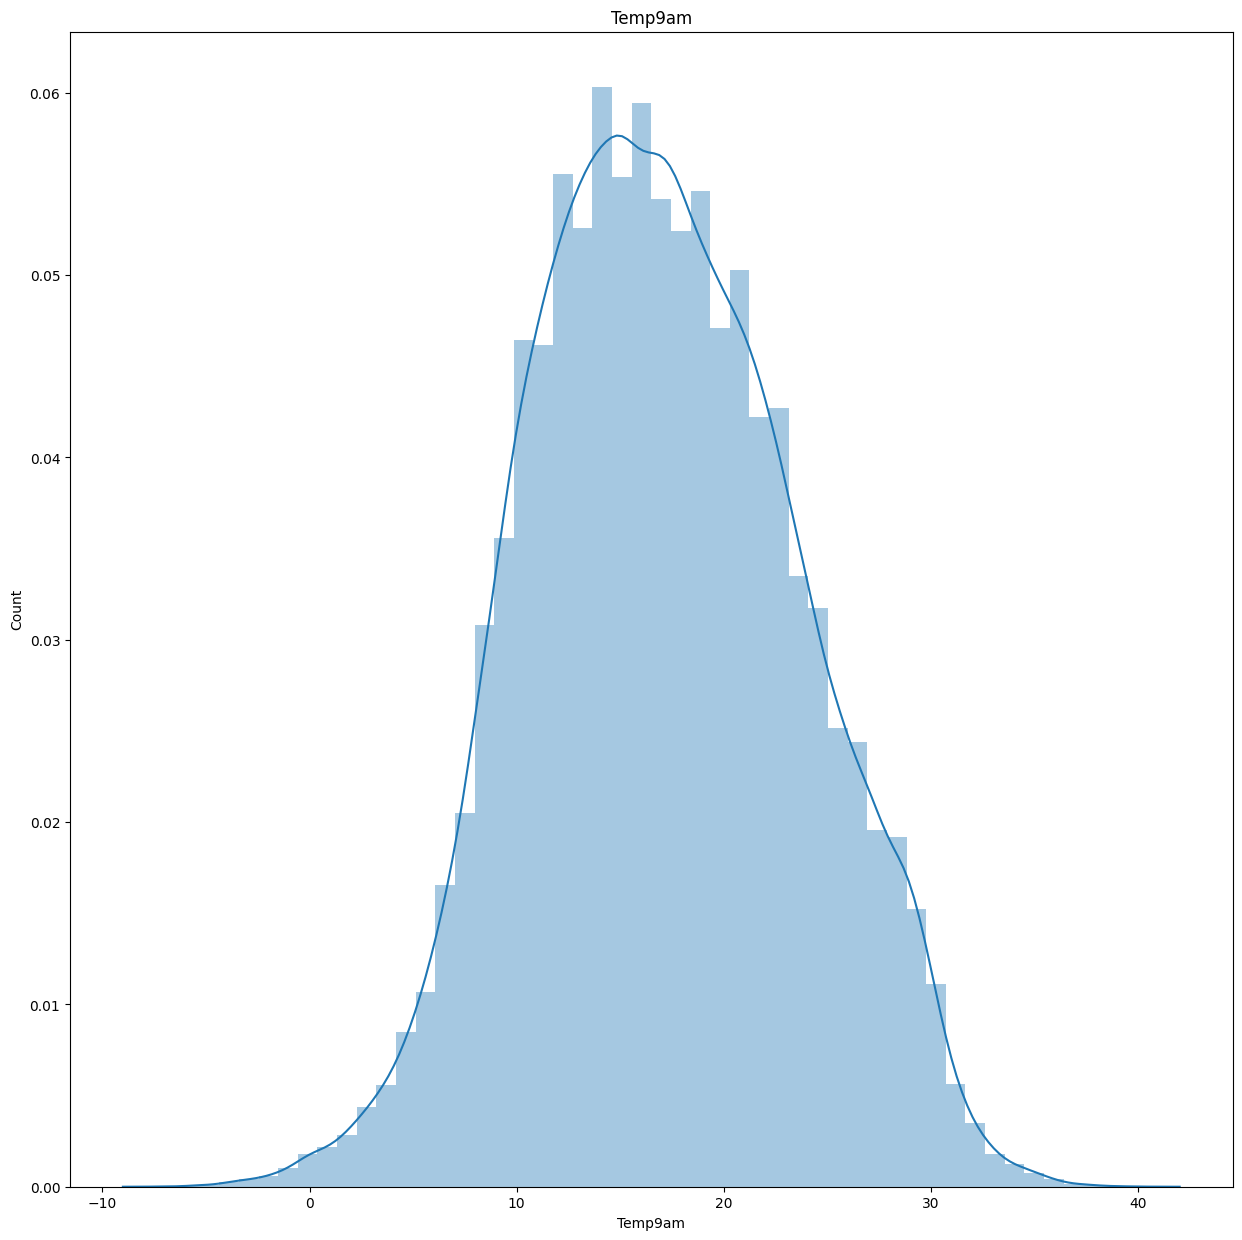

C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\2593479012.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather_data[feature])


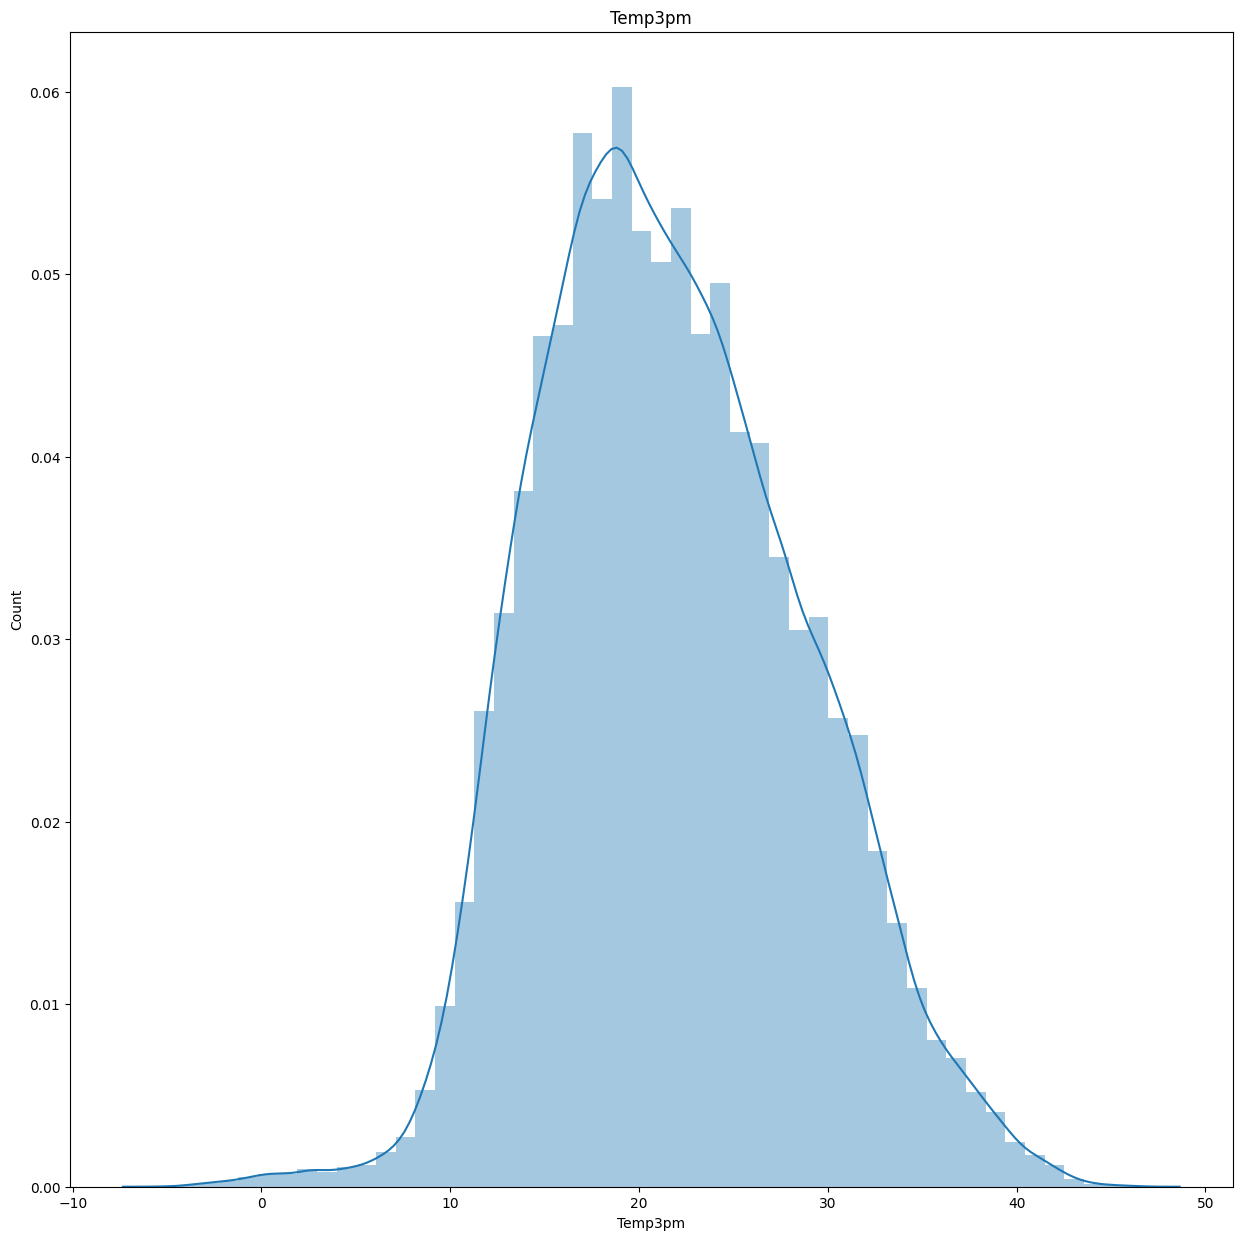

In [9]:
for feature in cont_features:
    data = weather_data.copy()
    plt.figure(figsize=(15, 15))
    sns.distplot(weather_data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


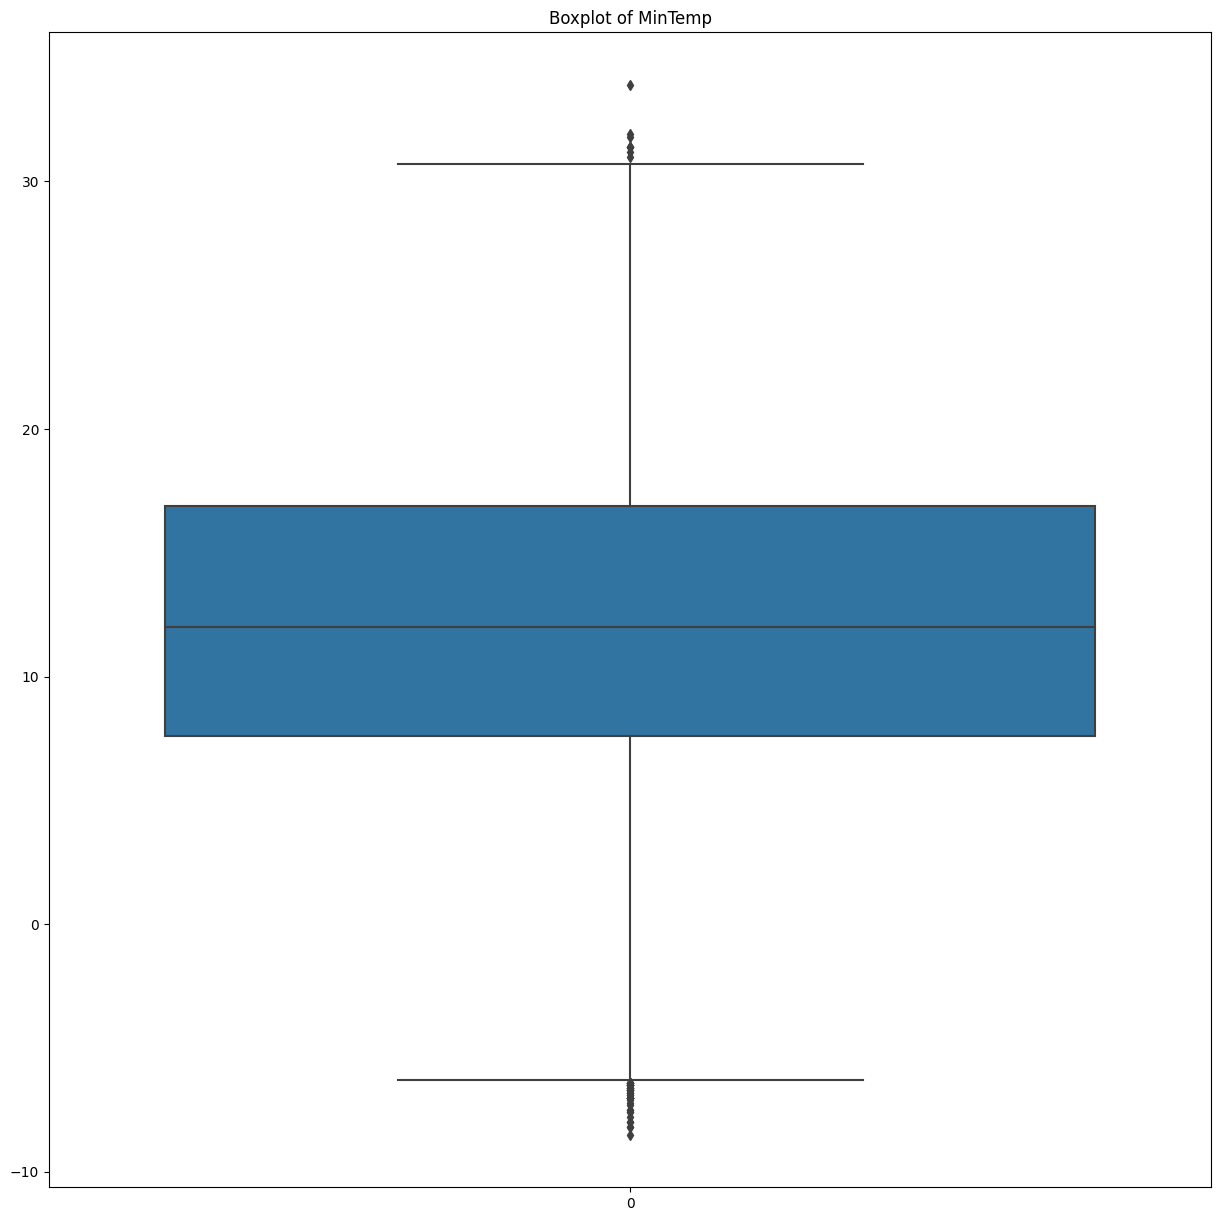

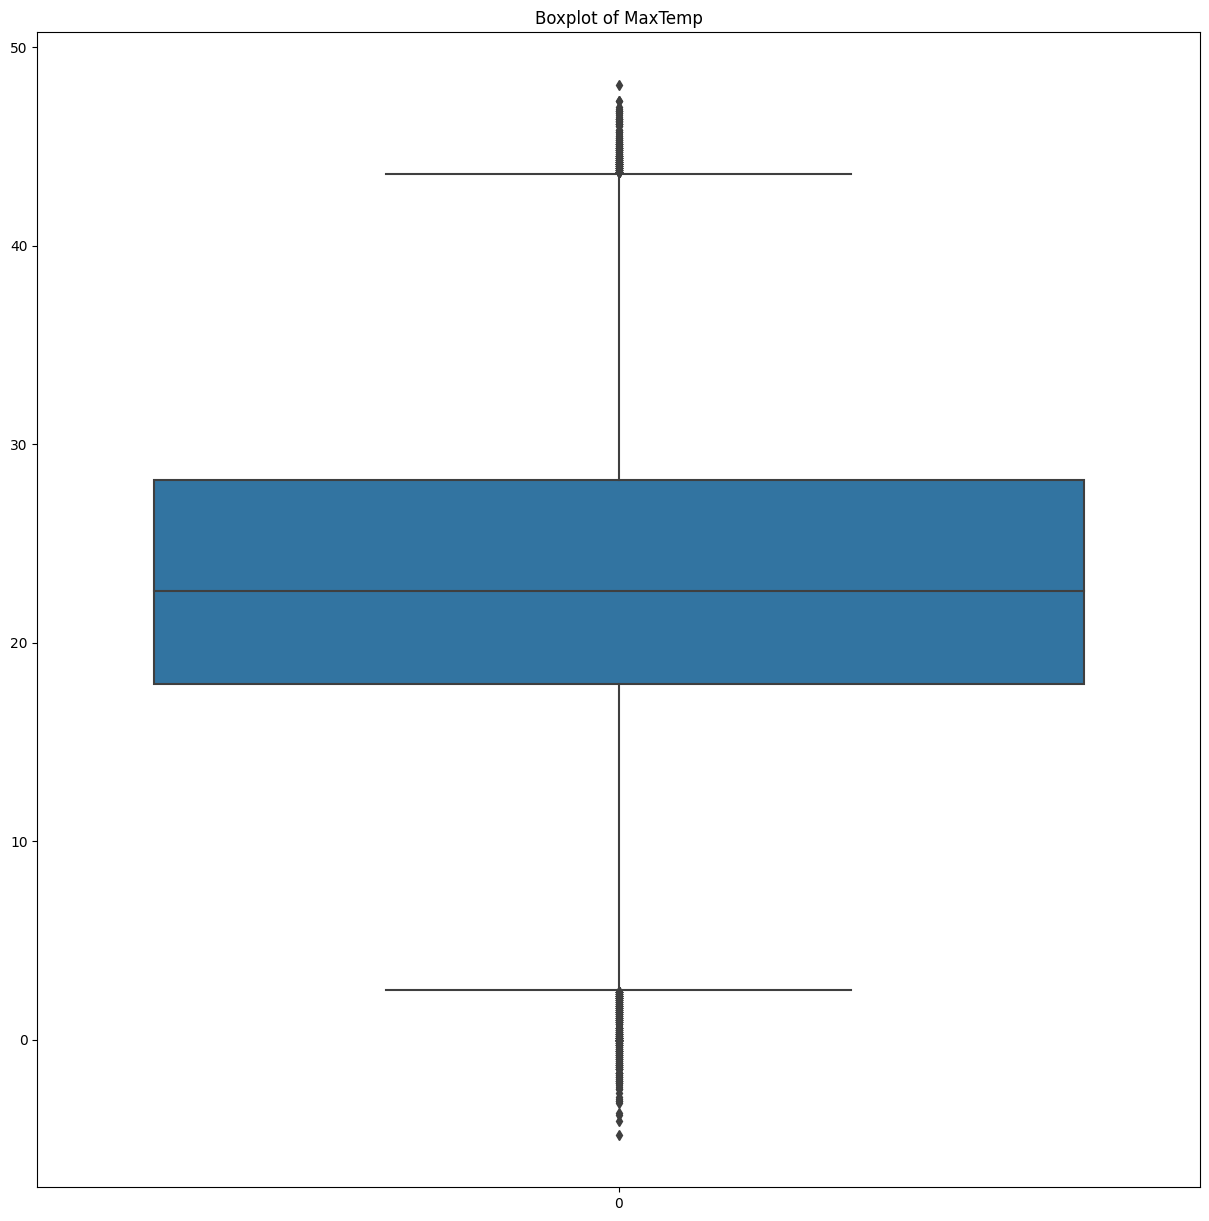

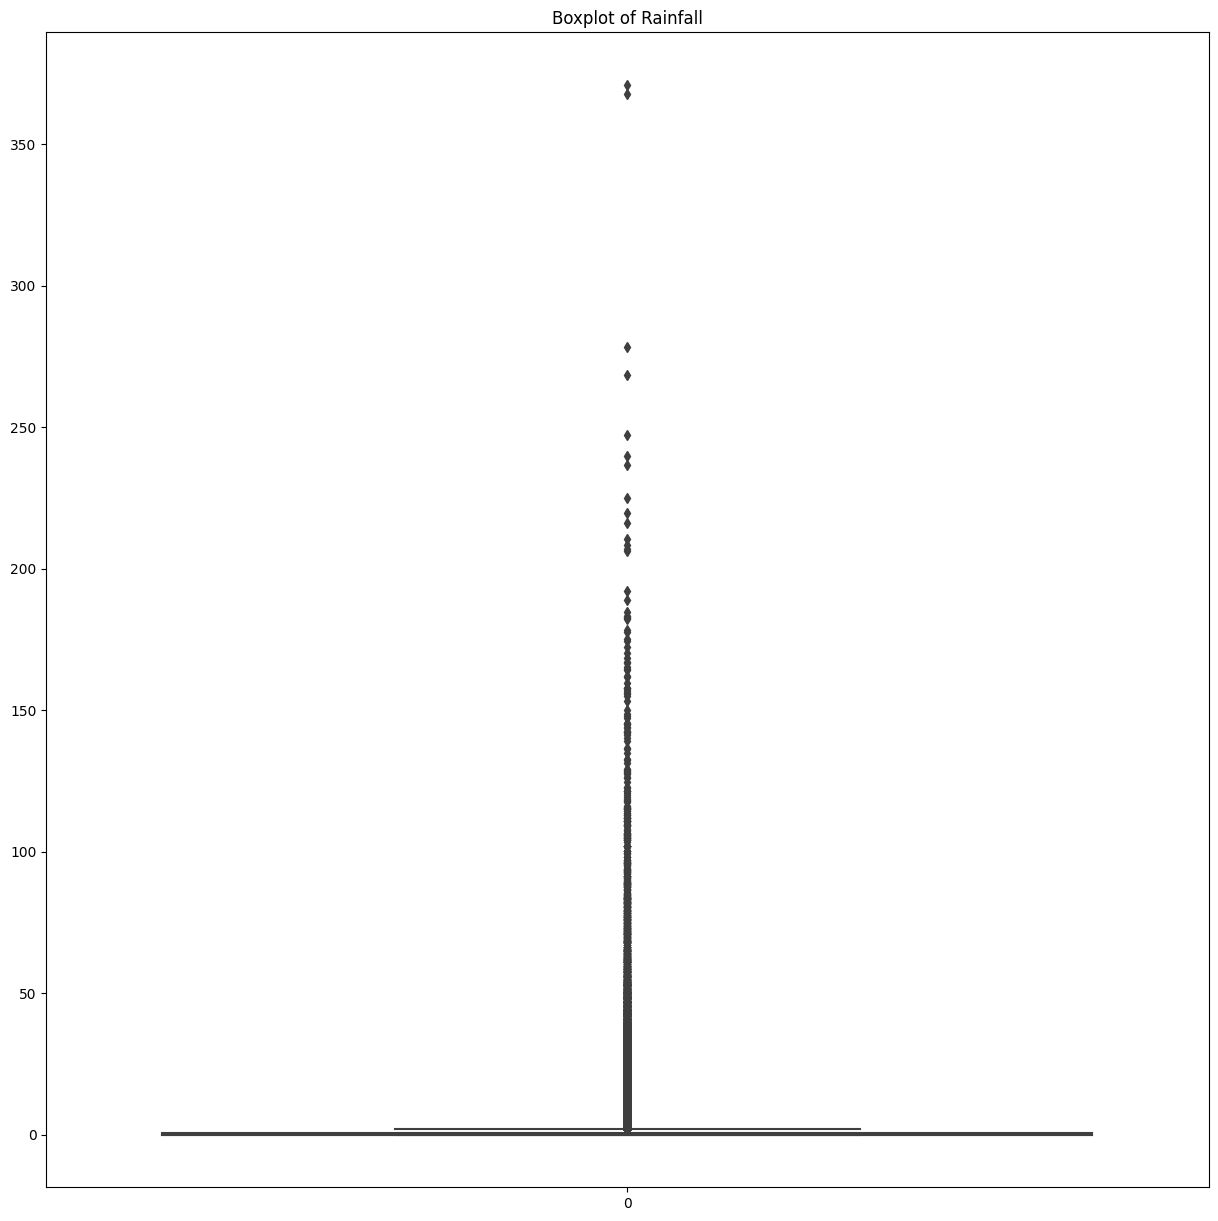

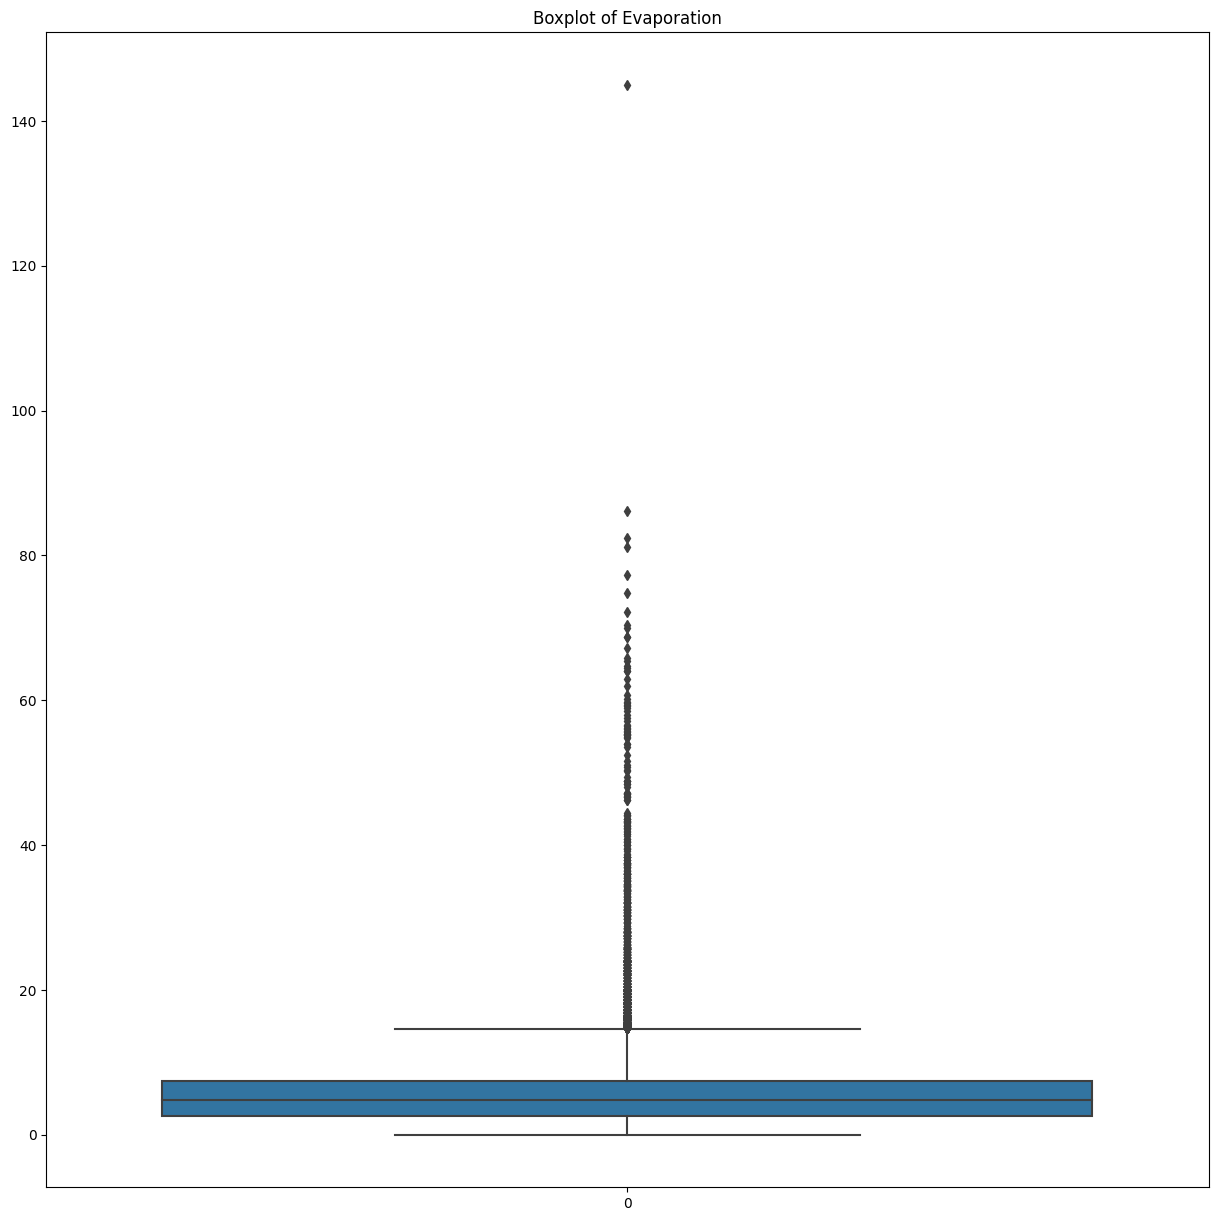

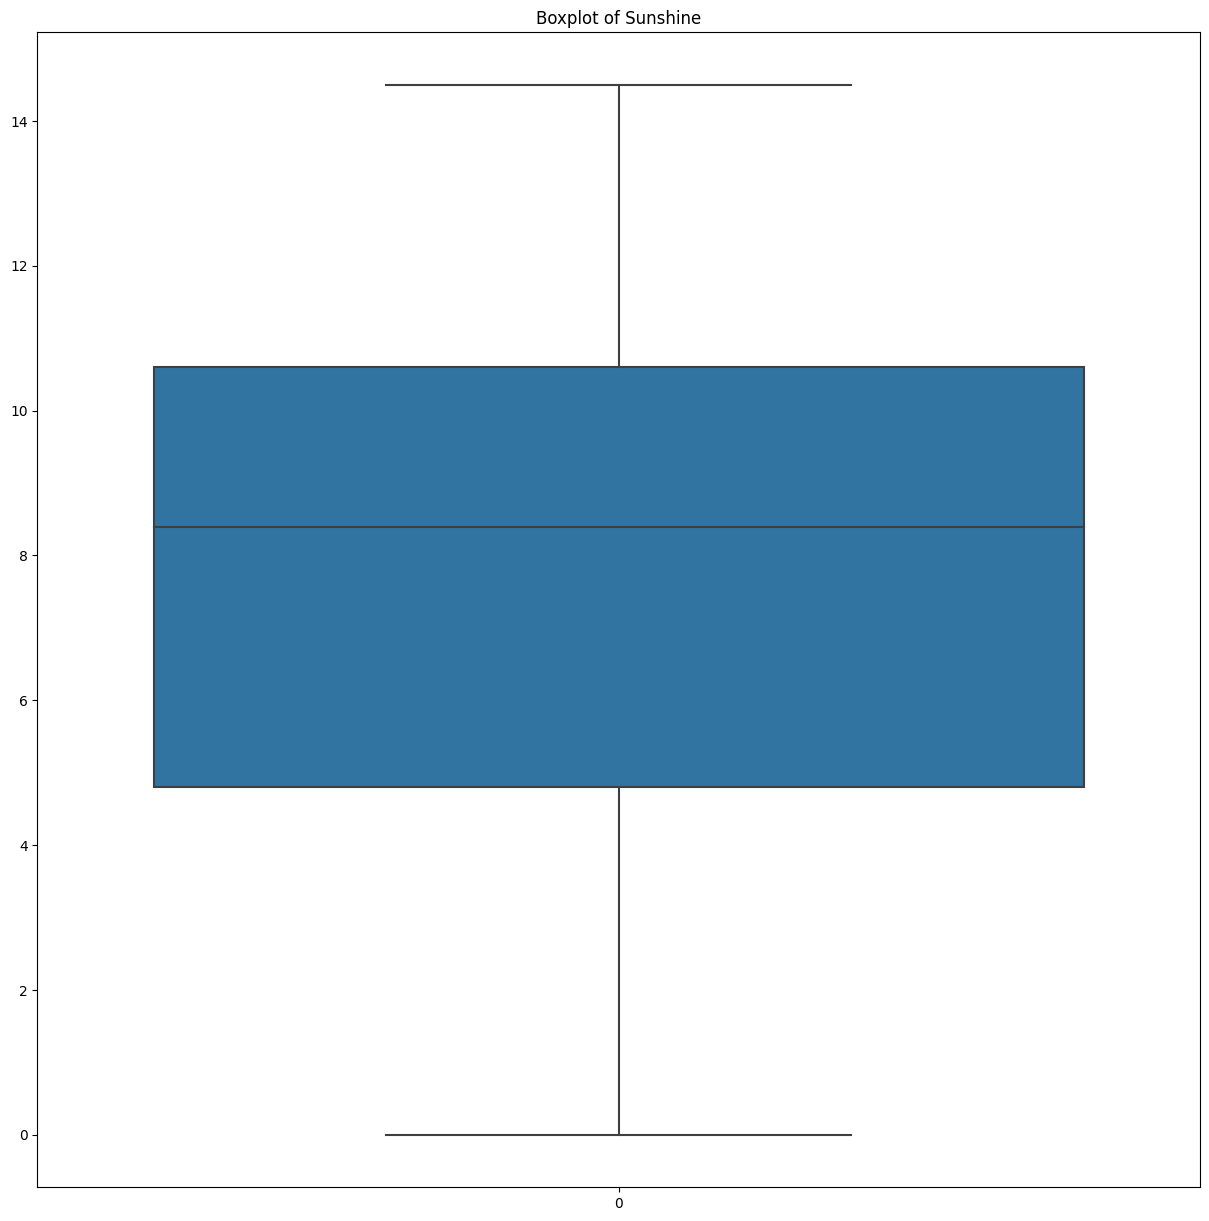

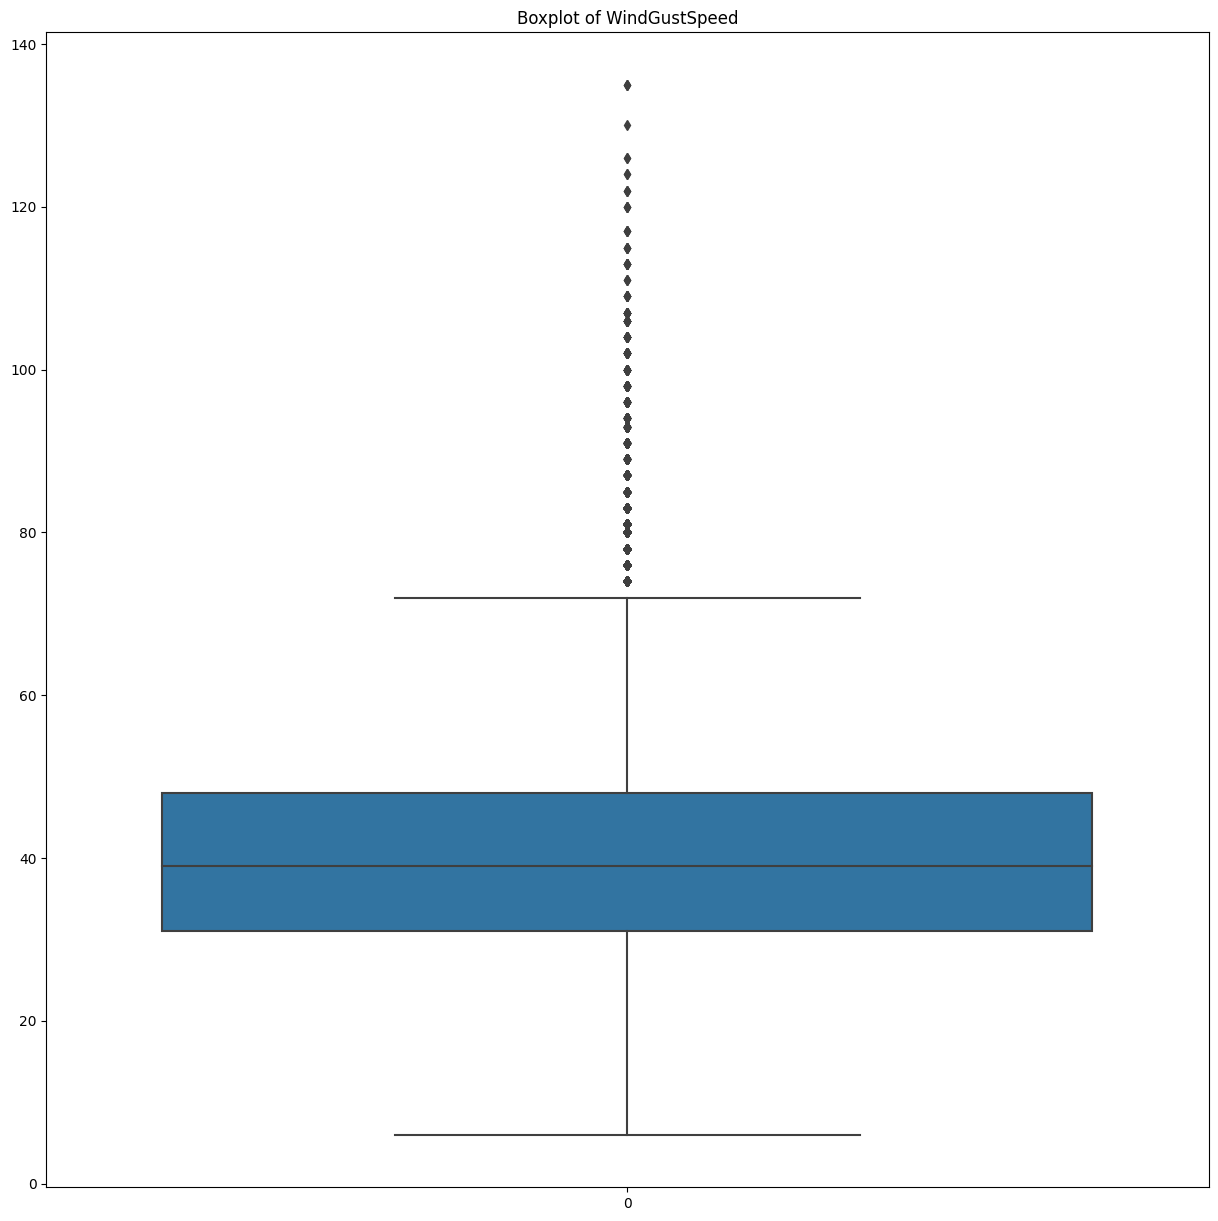

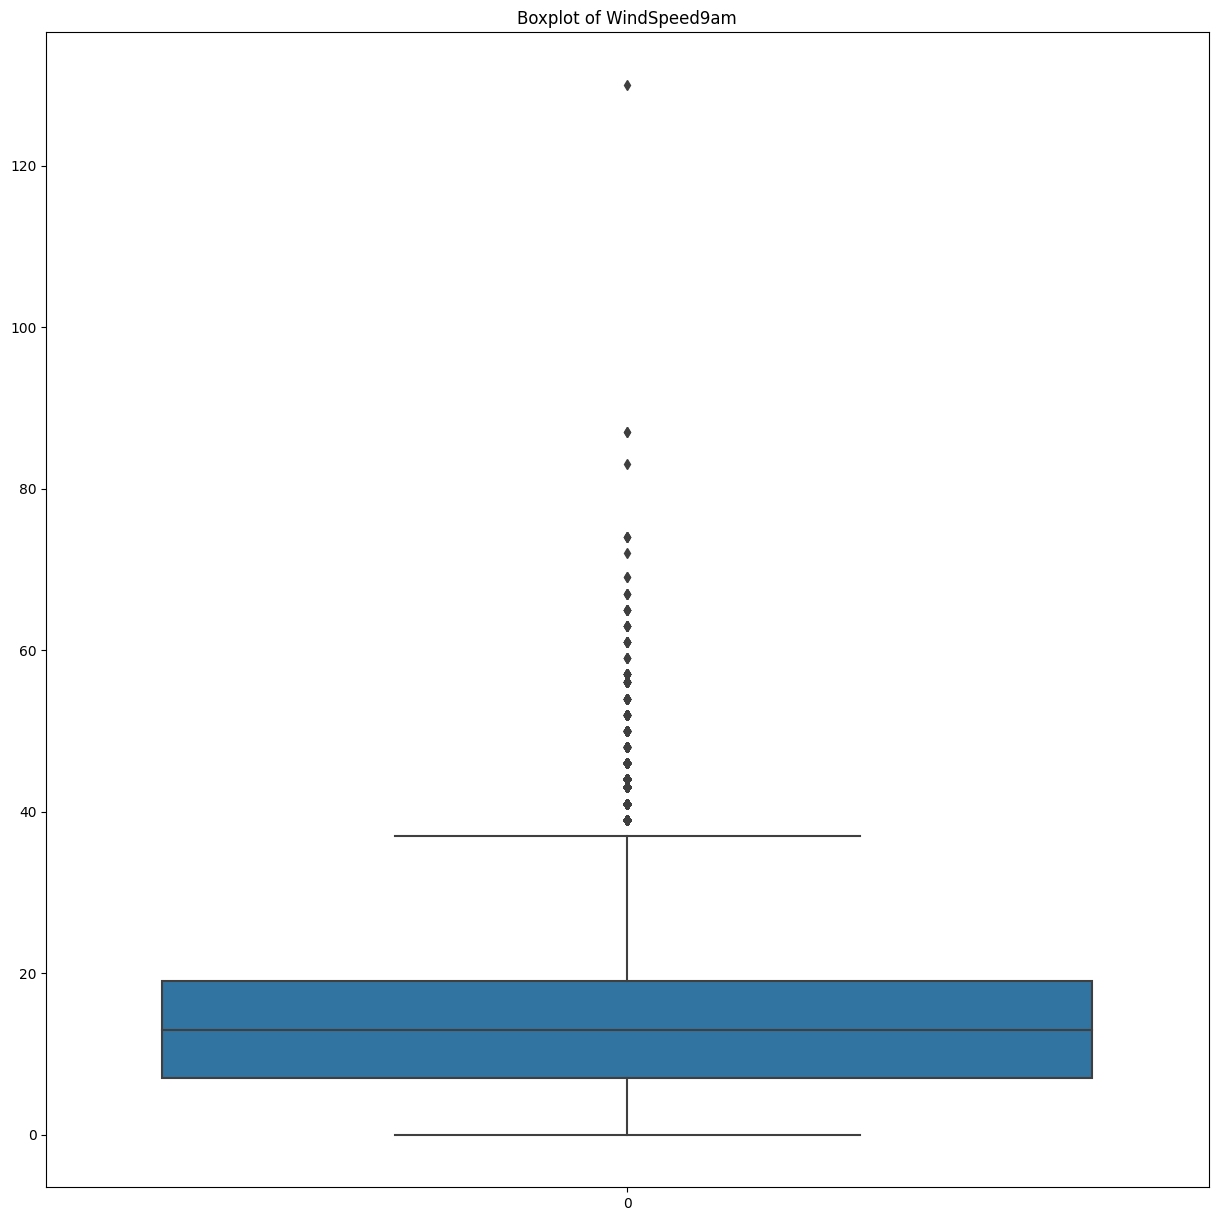

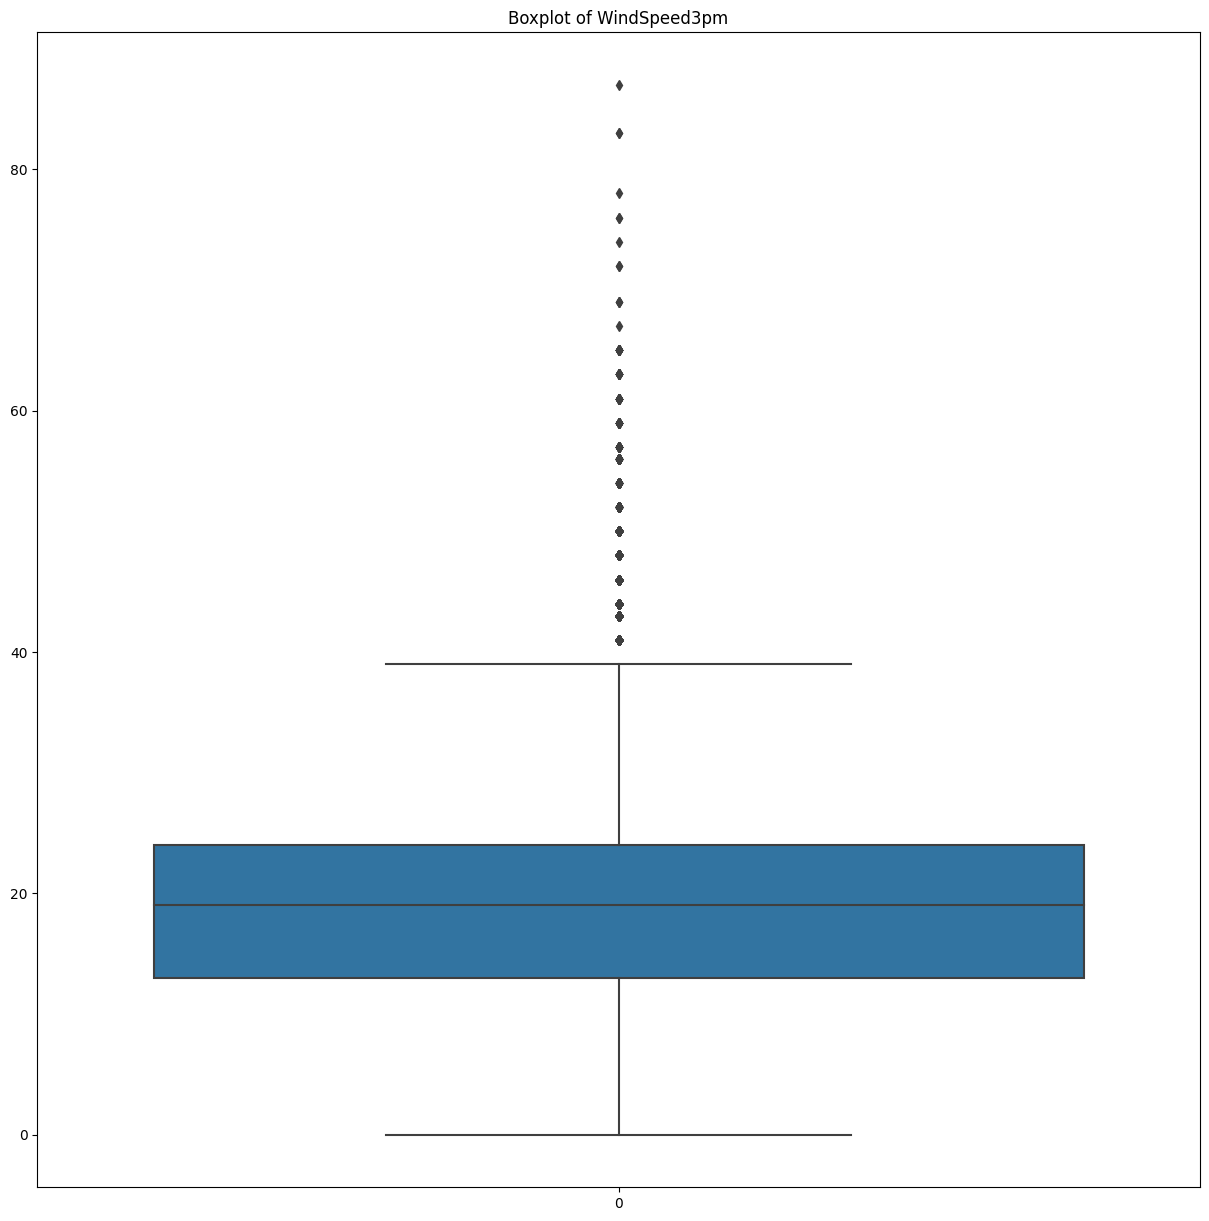

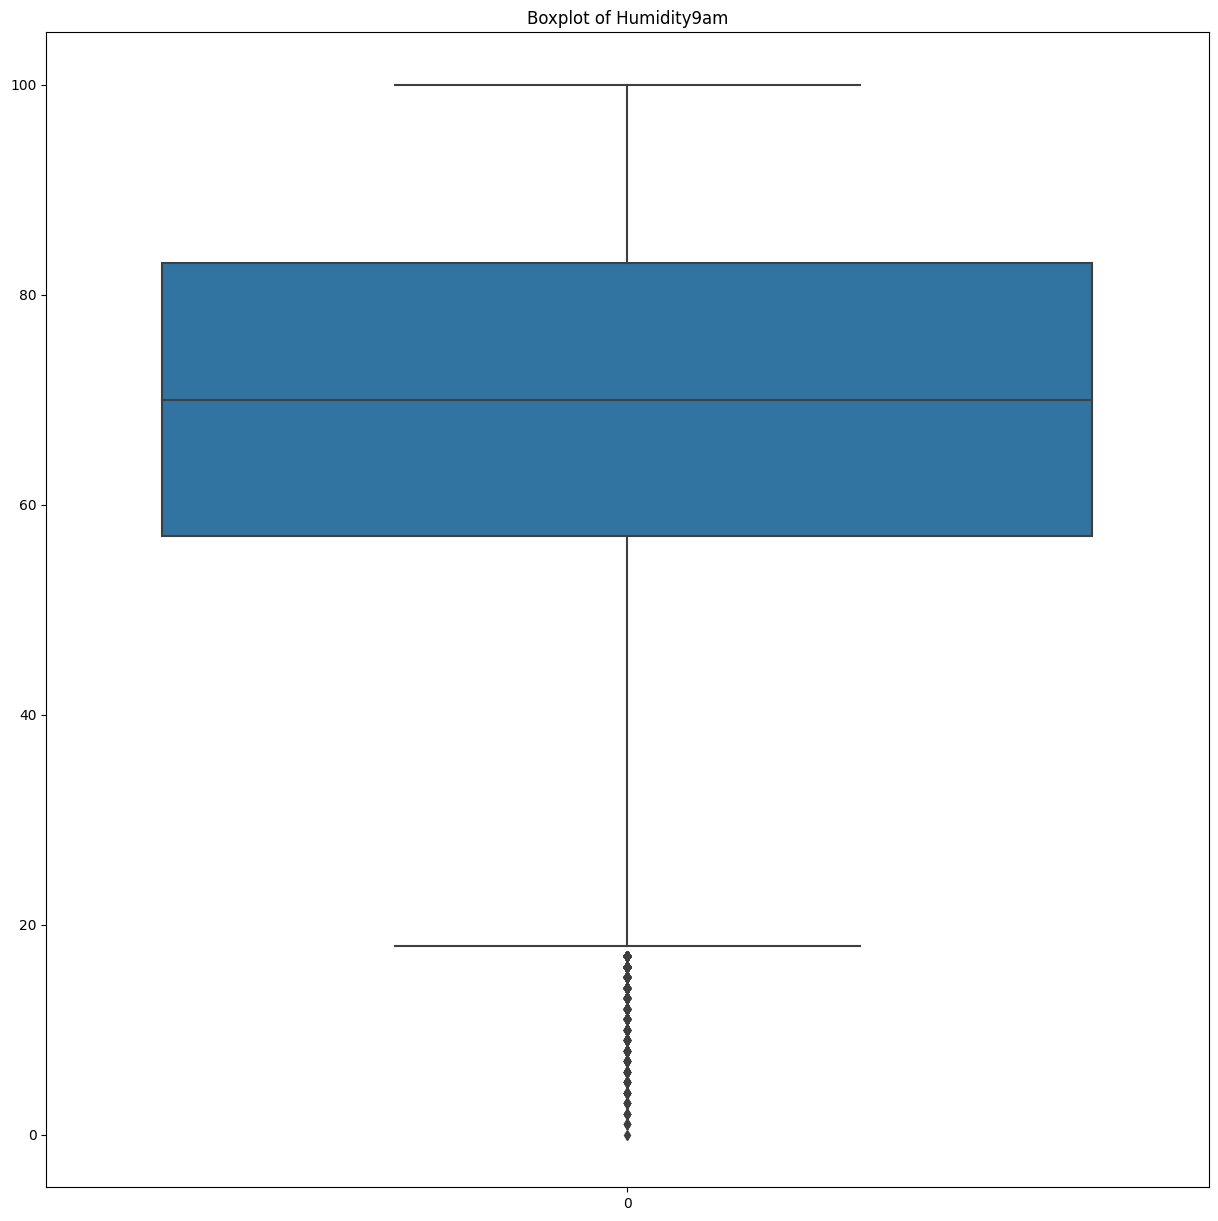

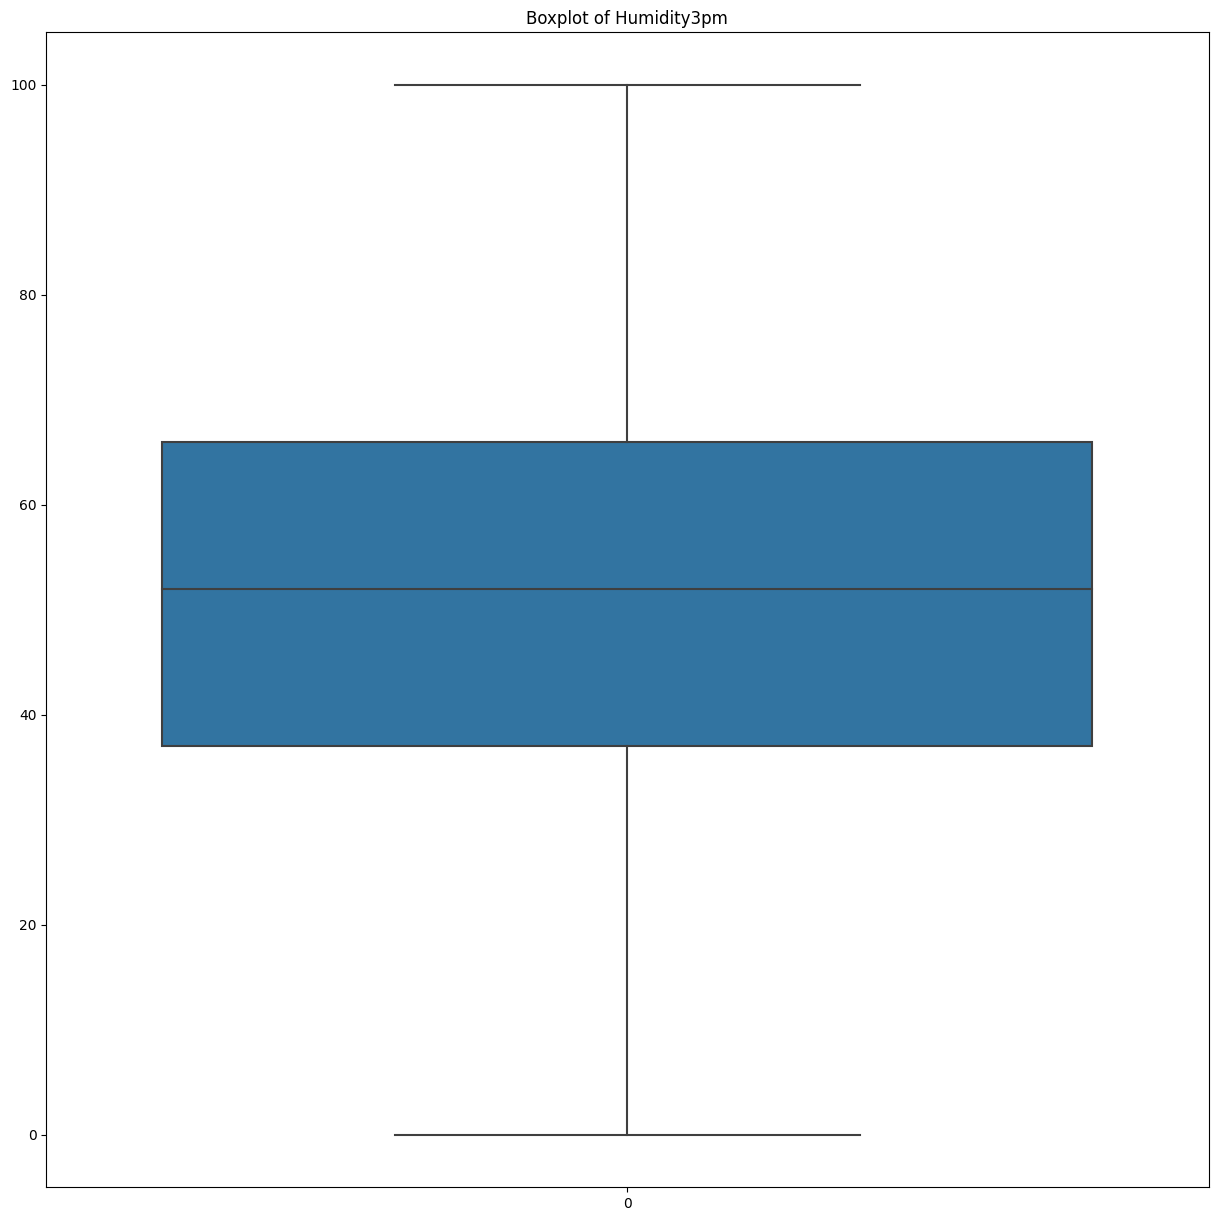

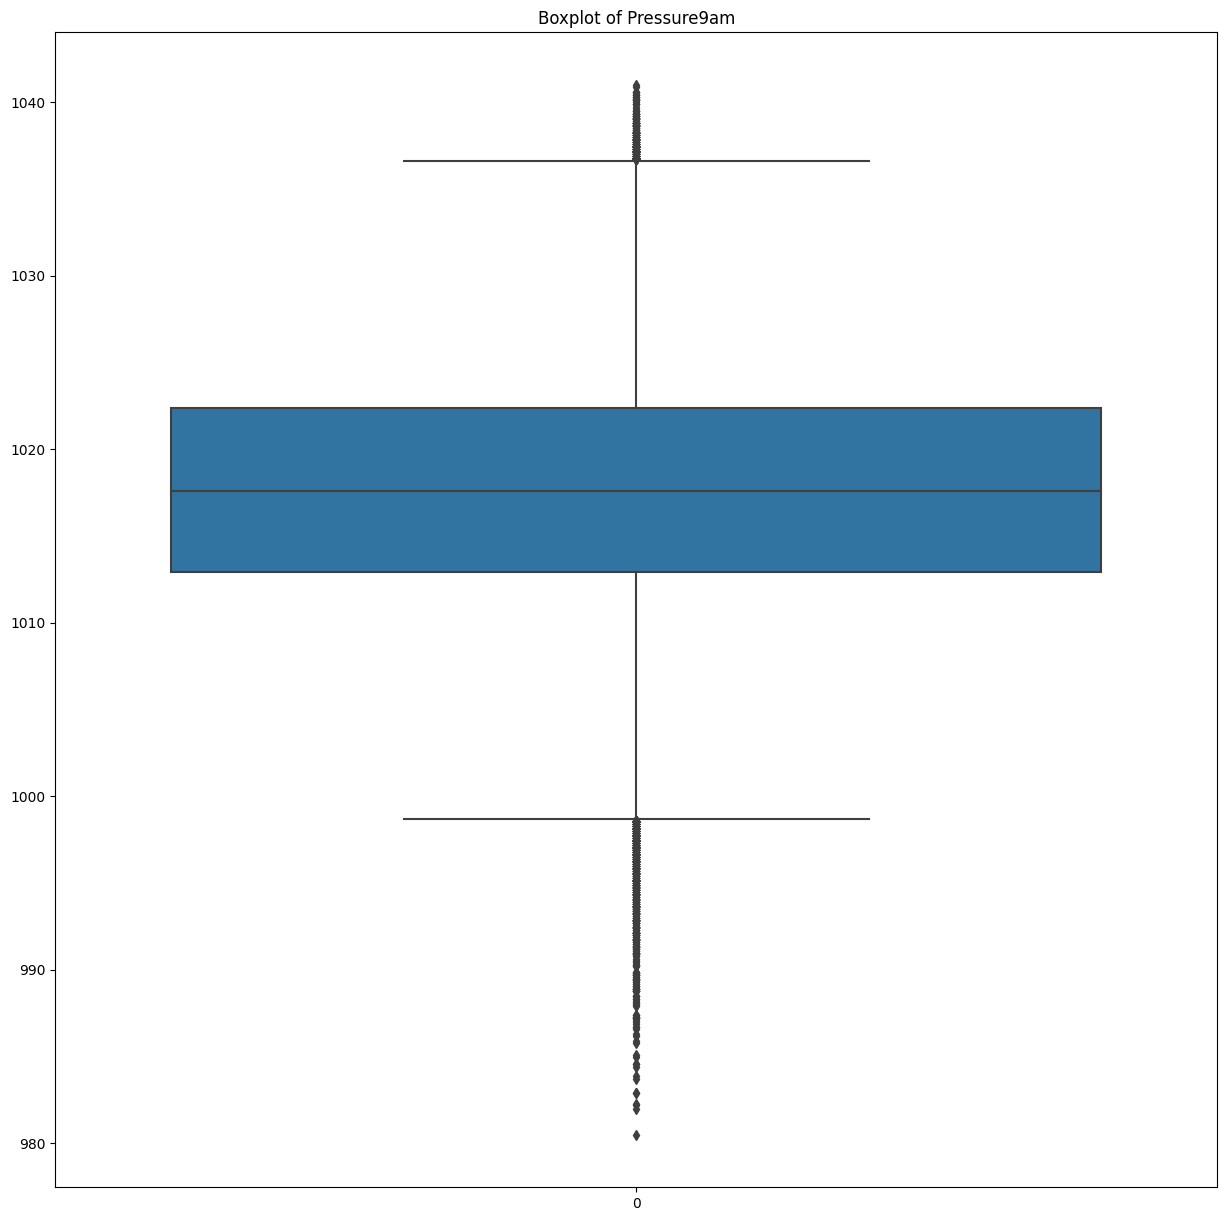

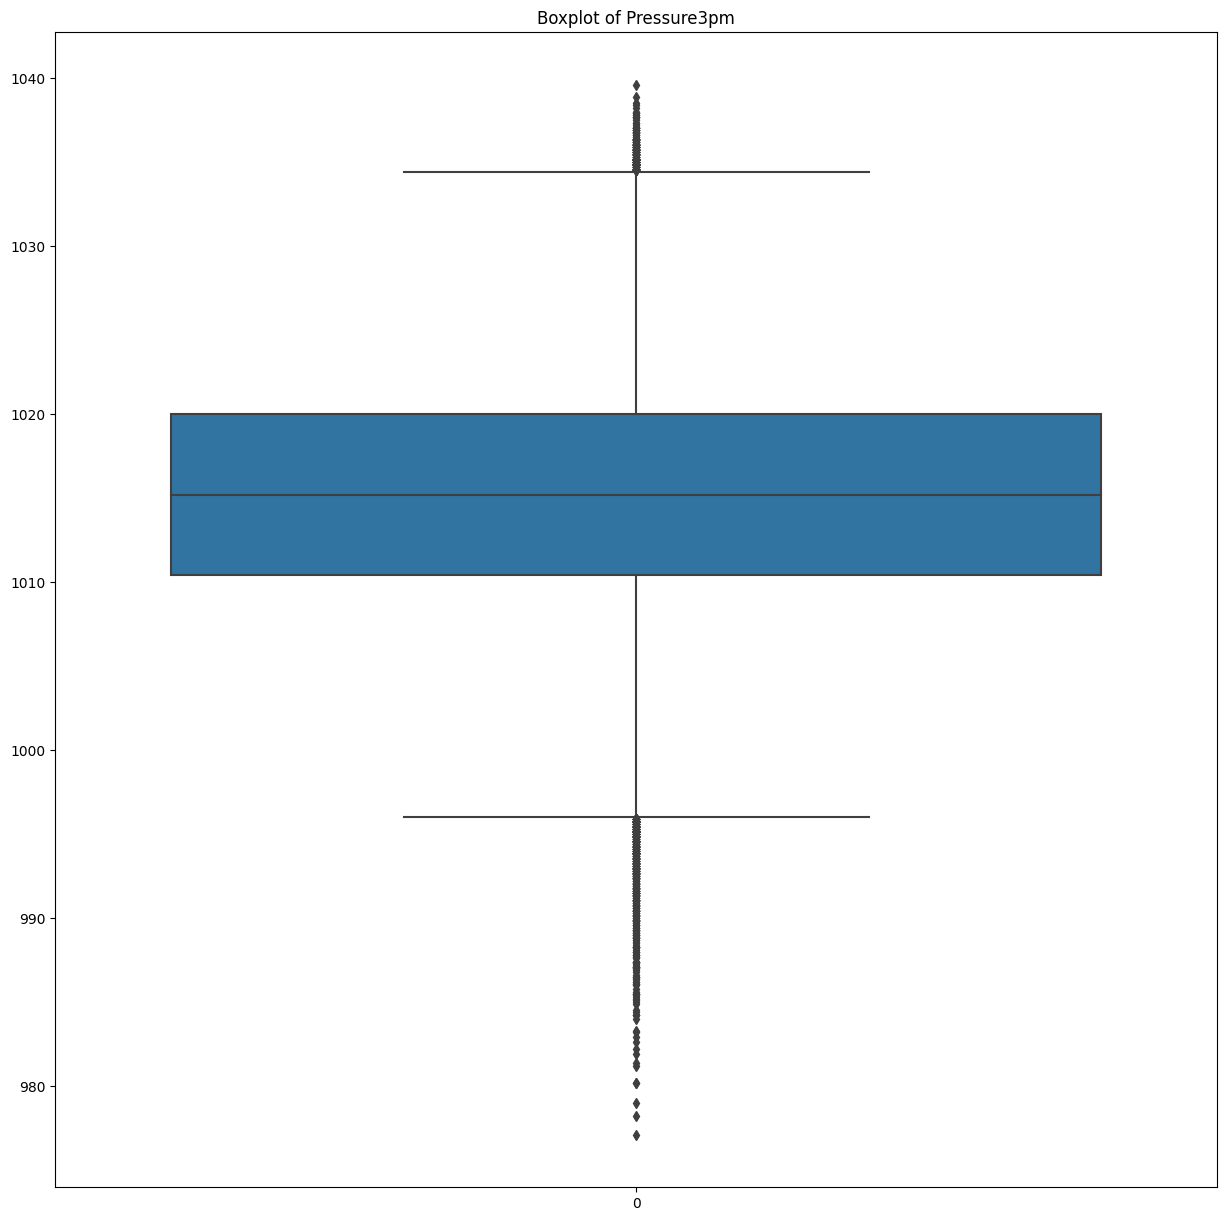

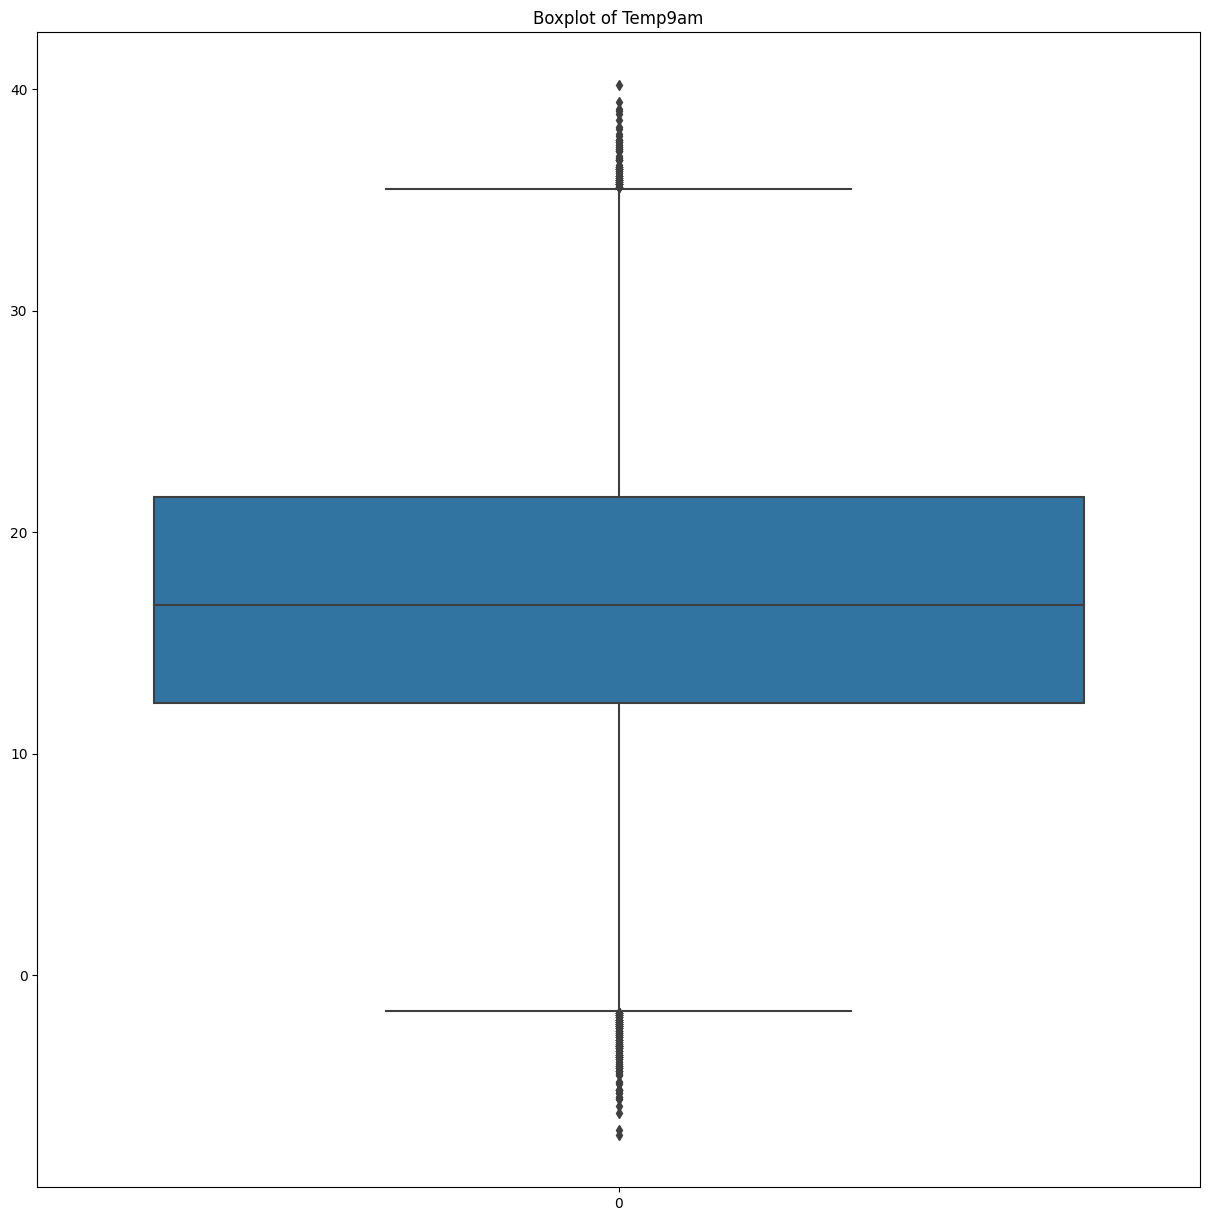

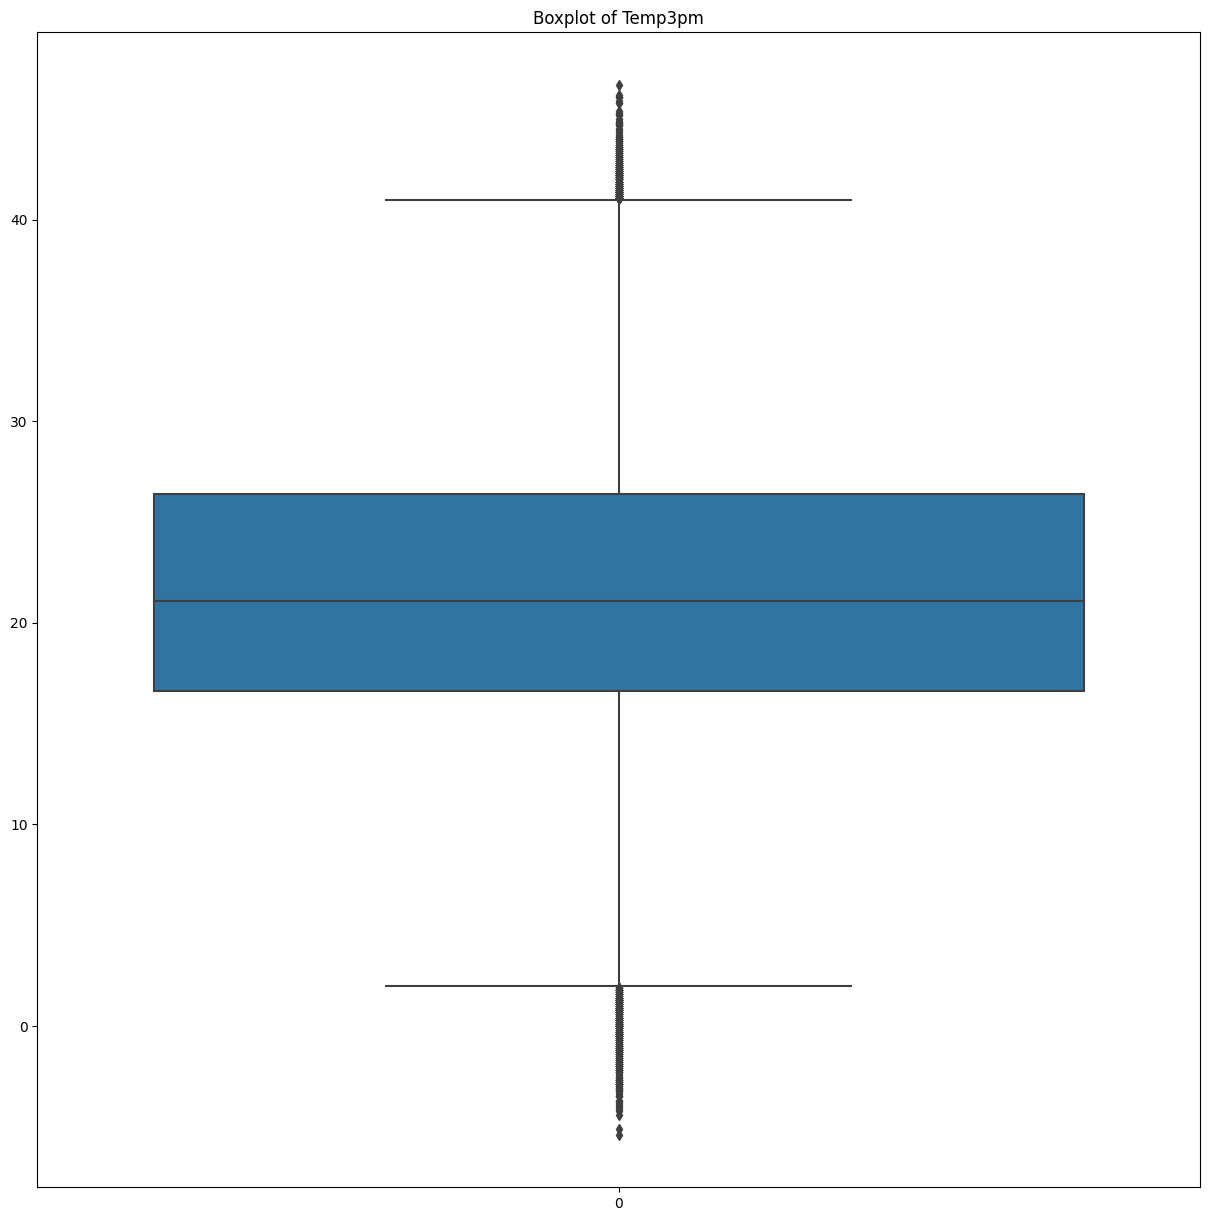

In [10]:
for feature in cont_features:
    plt.figure(figsize=(15, 15))
    sns.boxplot(weather_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [12]:
for feature in cont_features:
    if weather_data[feature].isnull().sum() > 0:
        weather_data[feature] = weather_data[feature].fillna(weather_data[feature].median())


In [13]:
missing_percentages = weather_data.isnull().sum() * 100 / len(weather_data)
missing_percentages


Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     0.000000
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [14]:
print(disc_features)


['Cloud9am', 'Cloud3pm']


In [15]:
def mode_nan(data, variable):
    mode_value = data[variable].value_counts().index[0]
    data[variable].fillna(mode_value, inplace=True)

mode_nan(weather_data, "Cloud9am")
mode_nan(weather_data, "Cloud3pm")


In [16]:
weather_data["RainToday"] = pd.get_dummies(weather_data["RainToday"], drop_first=True)
weather_data["RainTomorrow"] = pd.get_dummies(weather_data["RainTomorrow"], drop_first=True)
weather_data


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [18]:
for feature in cat_features:
    print(feature, weather_data.groupby(feature)["RainTomorrow"].mean().sort_values(ascending=False).index)


Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [19]:
windgustdir = {'NNW': 0, 'NW': 1, 'WNW': 2, 'N': 3, 'W': 4, 'WSW': 5, 'NNE': 6, 'S': 7, 'SSW': 8, 'SW': 9, 'SSE': 10,
               'NE': 11, 'SE': 12, 'ESE': 13, 'ENE': 14, 'E': 15}

winddir9am = {'NNW': 0, 'N': 1, 'NW': 2, 'NNE': 3, 'WNW': 4, 'W': 5, 'WSW': 6, 'SW': 7, 'SSW': 8, 'NE': 9, 'S': 10,
              'SSE': 11, 'ENE': 12, 'SE': 13, 'ESE': 14, 'E': 15}

winddir3pm = {'NW': 0, 'NNW': 1, 'N': 2, 'WNW': 3, 'W': 4, 'NNE': 5, 'WSW': 6, 'SSW': 7, 'S': 8, 'SW': 9, 'SE': 10,
              'NE': 11, 'SSE': 12, 'ENE': 13, 'E': 14, 'ESE': 15}

weather_data["WindGustDir"] = weather_data["WindGustDir"].map(windgustdir)
weather_data["WindDir9am"] = weather_data["WindDir9am"].map(winddir9am)
weather_data["WindDir3pm"] = weather_data["WindDir3pm"].map(winddir3pm)


In [20]:
weather_data["WindGustDir"] = weather_data["WindGustDir"].fillna(weather_data["WindGustDir"].value_counts().index[0])
weather_data["WindDir9am"] = weather_data["WindDir9am"].fillna(weather_data["WindDir9am"].value_counts().index[0])
weather_data["WindDir3pm"] = weather_data["WindDir3pm"].fillna(weather_data["WindDir3pm"].value_counts().index[0])


In [21]:
weather_data.isnull().sum()*100/len(weather_data)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [22]:
weather_data1 = weather_data.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [23]:
weather_data1

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [24]:
weather_data1[1].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [25]:
weather_data1[1].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [26]:
len(weather_data1[1].sort_values(ascending = False).index)

49

In [27]:
location = {'Portland': 1, 'Cairns': 2, 'Walpole': 3, 'Dartmoor': 4, 'MountGambier': 5,
            'NorfolkIsland': 6, 'Albany': 7, 'Witchcliffe': 8, 'CoffsHarbour': 9, 'Sydney': 10,
            'Darwin': 11, 'MountGinini': 12, 'NorahHead': 13, 'Ballarat': 14, 'GoldCoast': 15,
            'SydneyAirport': 16, 'Hobart': 17, 'Watsonia': 18, 'Newcastle': 19, 'Wollongong': 20,
            'Brisbane': 21, 'Williamtown': 22, 'Launceston': 23, 'Adelaide': 24, 'MelbourneAirport': 25,
            'Perth': 26, 'Sale': 27, 'Melbourne': 28, 'Canberra': 29, 'Albury': 30, 'Penrith': 31,
            'Nuriootpa': 32, 'BadgerysCreek': 33, 'Tuggeranong': 34, 'PerthAirport': 35, 'Bendigo': 36,
            'Richmond': 37, 'WaggaWagga': 38, 'Townsville': 39, 'PearceRAAF': 40, 'SalmonGums': 41,
            'Moree': 42, 'Cobar': 43, 'Mildura': 44, 'Katherine': 45, 'AliceSprings': 46, 'Nhil': 47,
            'Woomera': 48, 'Uluru': 49}

weather_data["Location"] = weather_data["Location"].map(location)


In [28]:
weather_data["Date"] = pd.to_datetime(weather_data["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [29]:
weather_data["Date_month"] = weather_data["Date"].dt.month
weather_data["Date_day"] = weather_data["Date"].dt.day

In [30]:
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,4.8,8.4,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,4.8,8.4,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,4.8,8.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,4.8,8.4,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,4.8,8.4,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.4,0.0,4.8,8.4,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0,6,21
145456,2017-06-22,49,3.6,25.3,0.0,4.8,8.4,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0,6,22
145457,2017-06-23,49,5.4,26.9,0.0,4.8,8.4,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0,6,23
145458,2017-06-24,49,7.8,27.0,0.0,4.8,8.4,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


C:\Users\ARYAN THAKUR\AppData\Local\Temp\ipykernel_804\634436425.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = weather_data.corr()


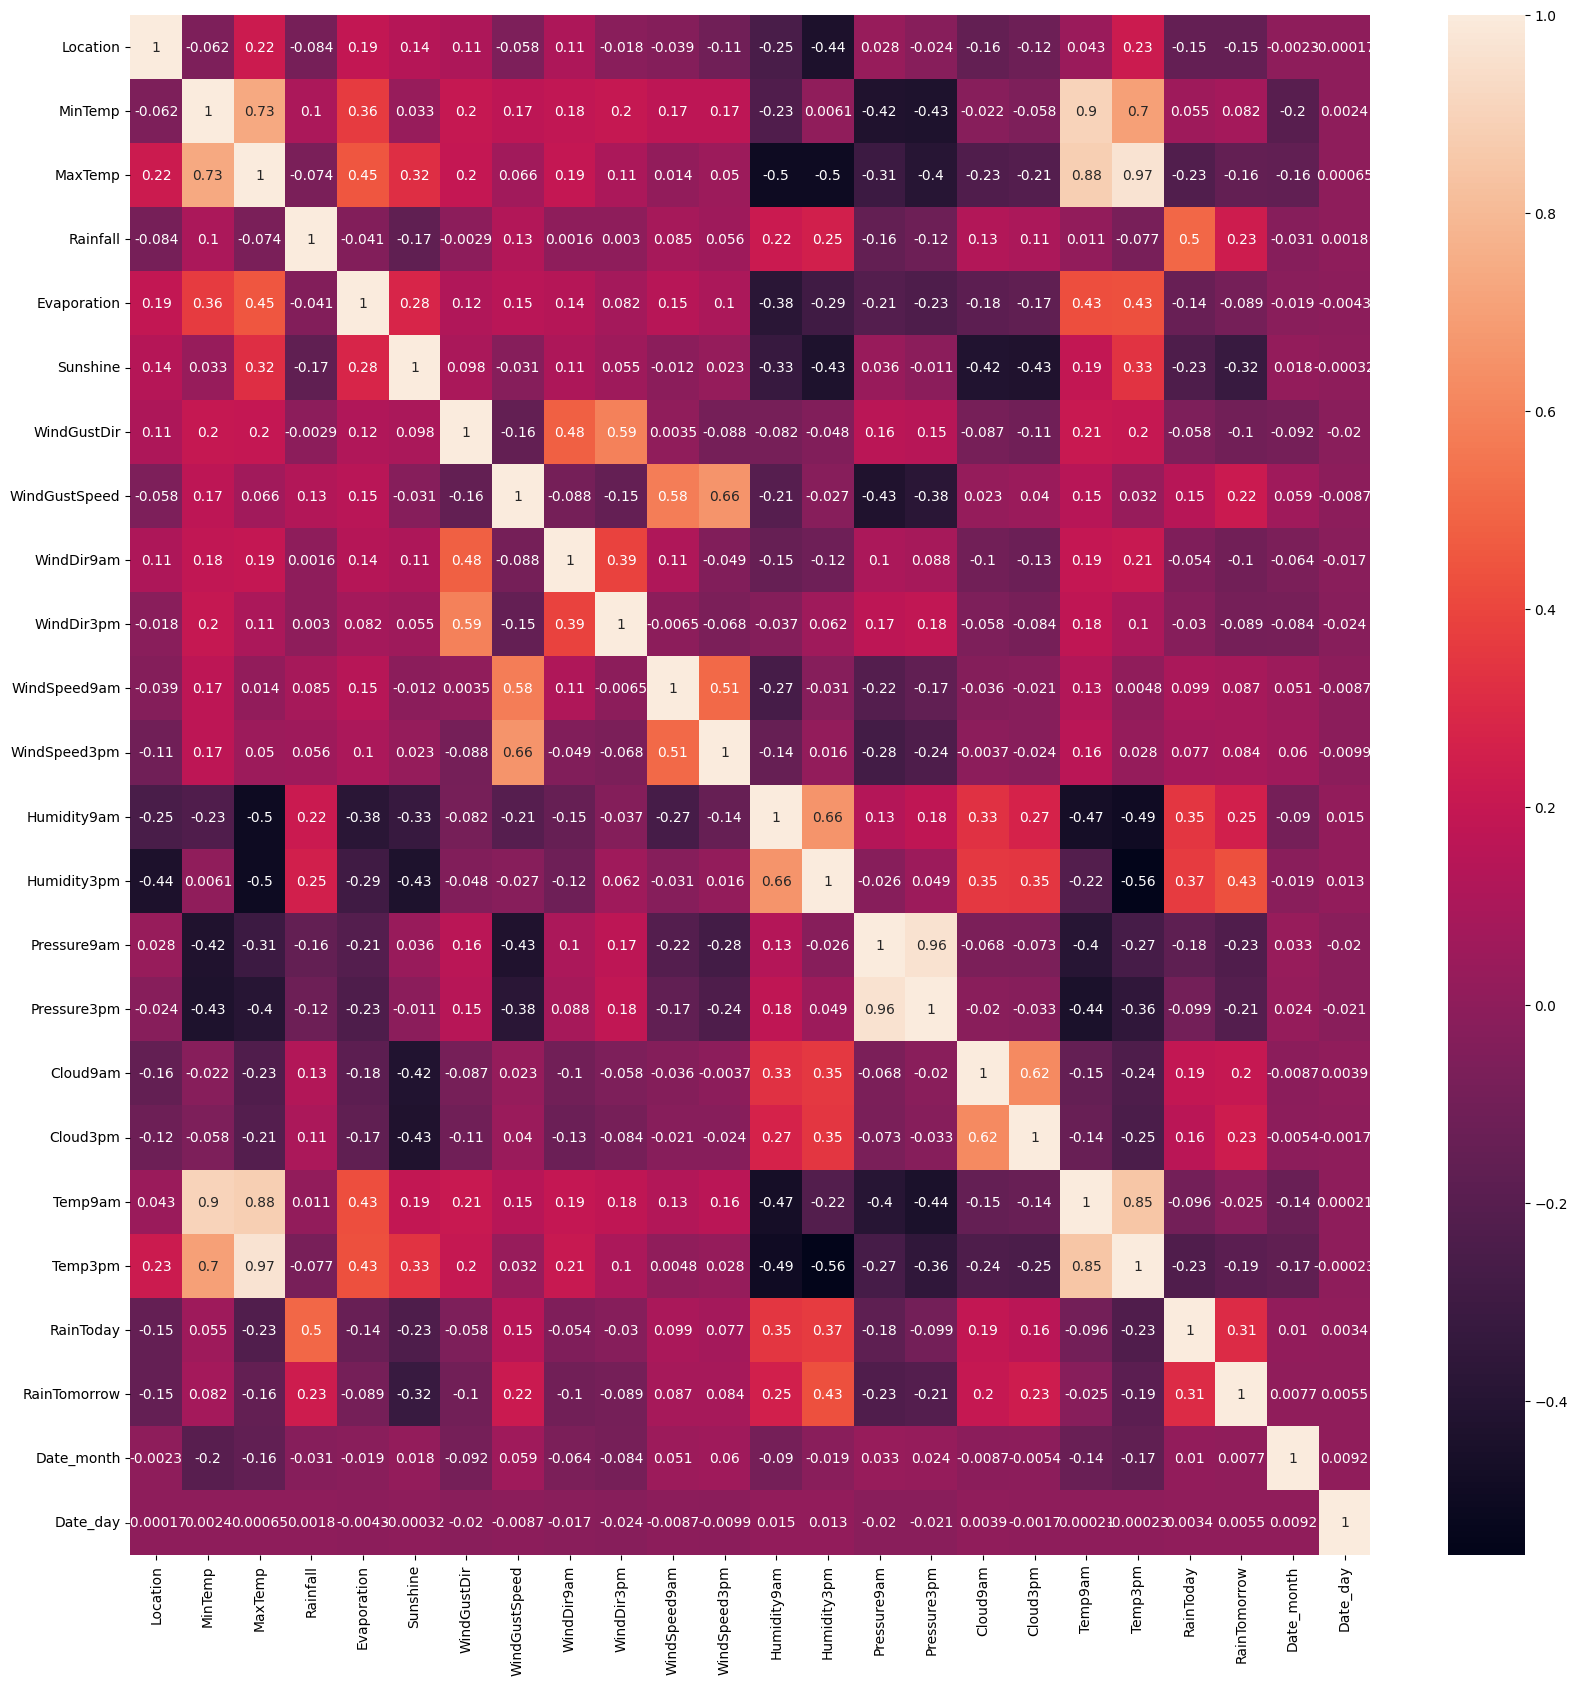

In [31]:
corrmat = weather_data.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<AxesSubplot: ylabel='count'>

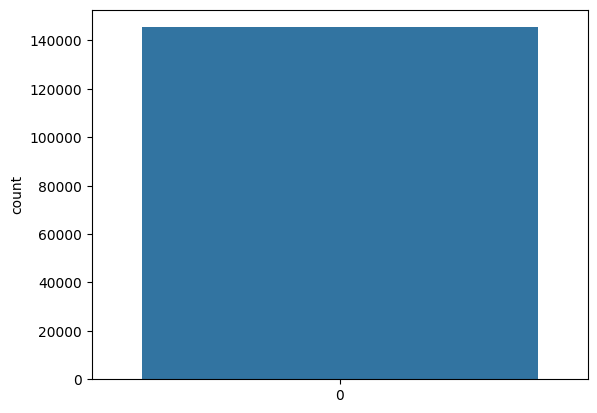

In [32]:
sns.countplot(weather_data["RainTomorrow"])

In [33]:
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,4.8,8.4,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,4.8,8.4,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,4.8,8.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,4.8,8.4,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,4.8,8.4,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.4,0.0,4.8,8.4,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0,6,21
145456,2017-06-22,49,3.6,25.3,0.0,4.8,8.4,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0,6,22
145457,2017-06-23,49,5.4,26.9,0.0,4.8,8.4,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0,6,23
145458,2017-06-24,49,7.8,27.0,0.0,4.8,8.4,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


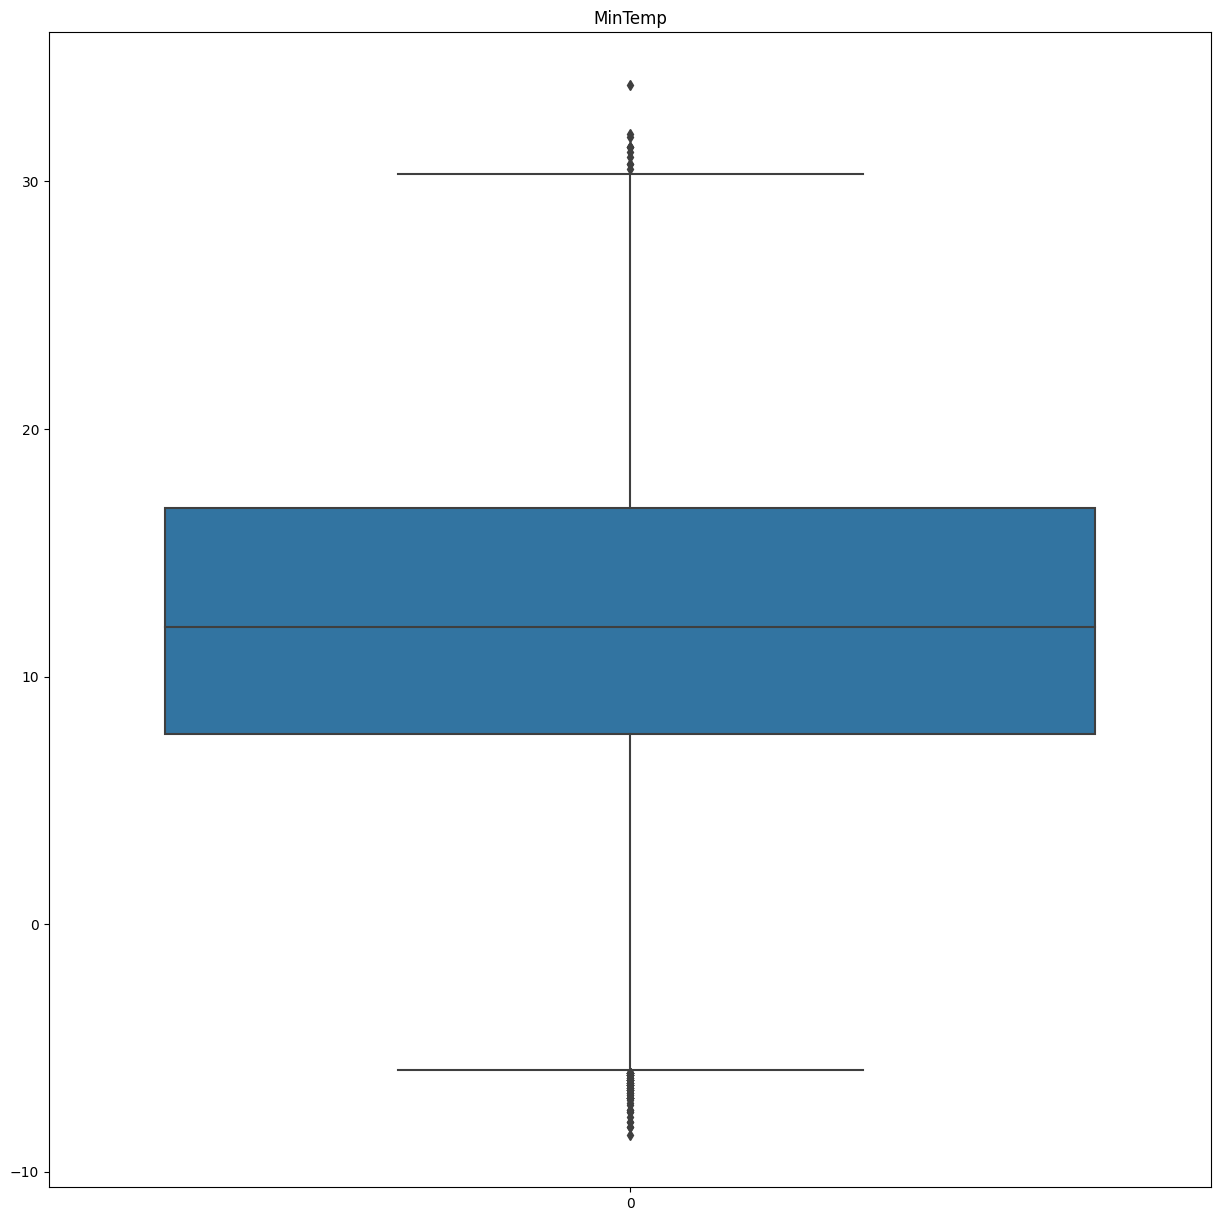

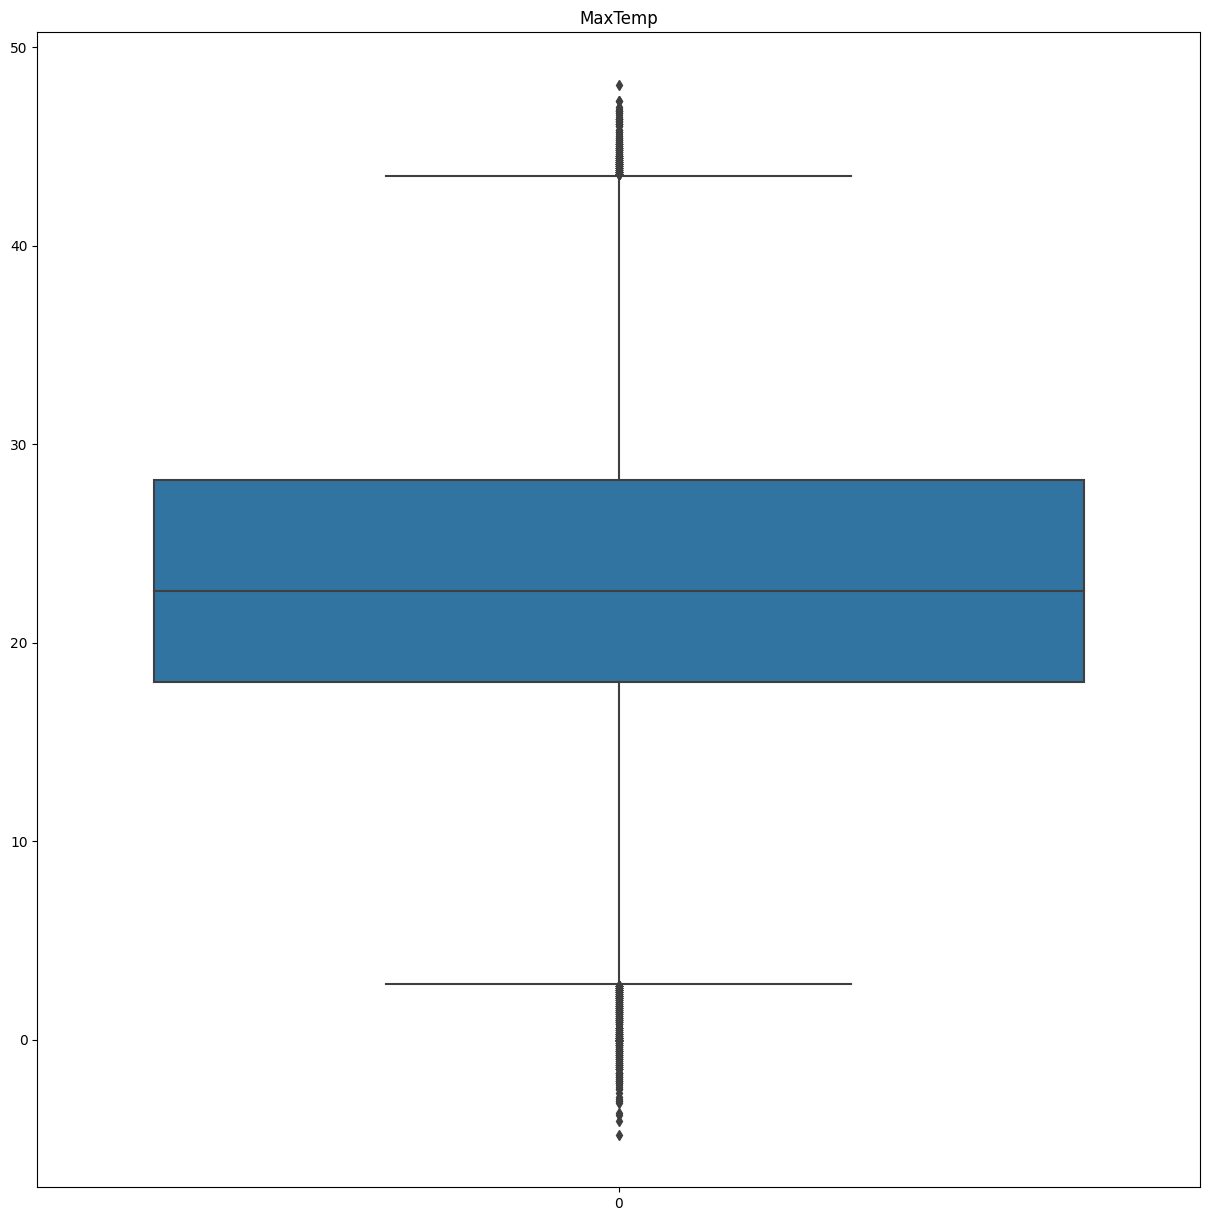

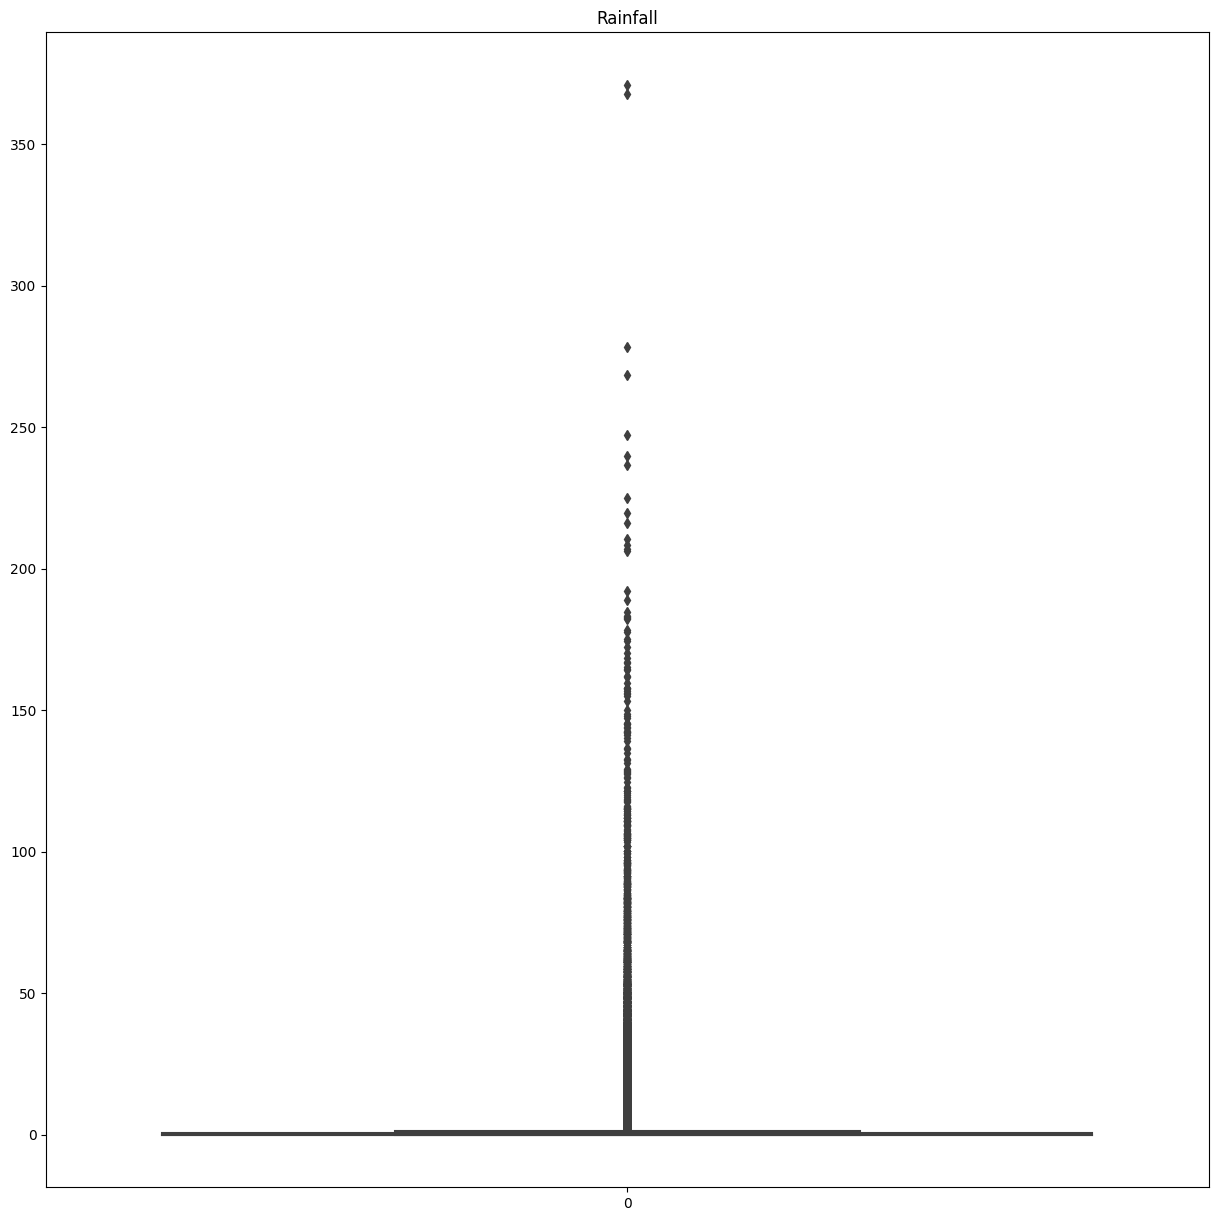

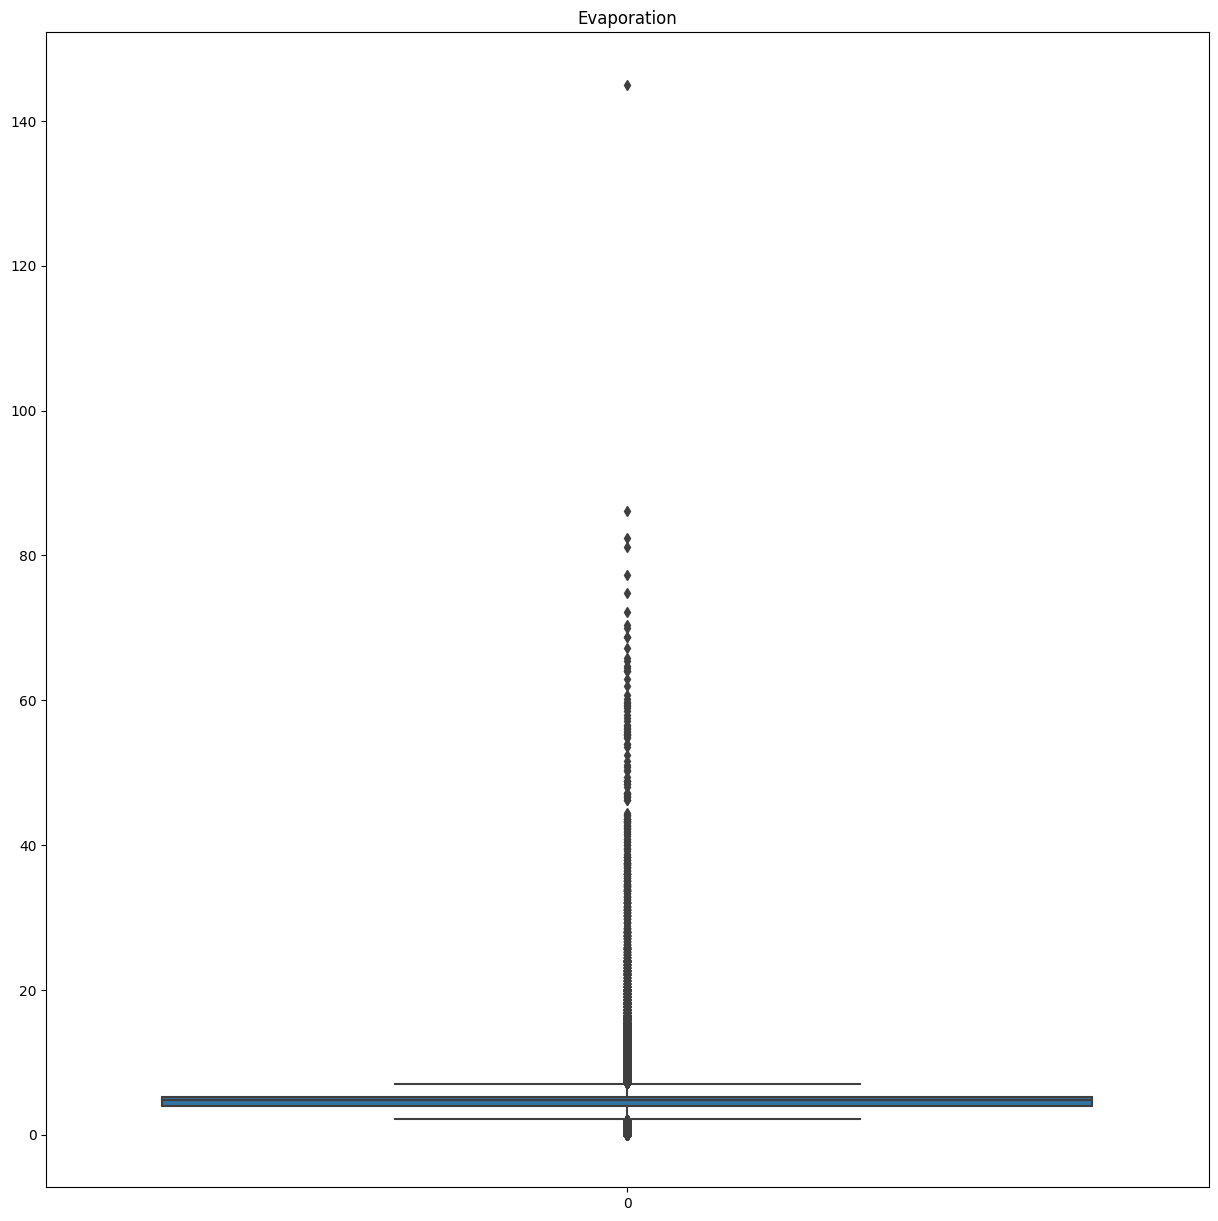

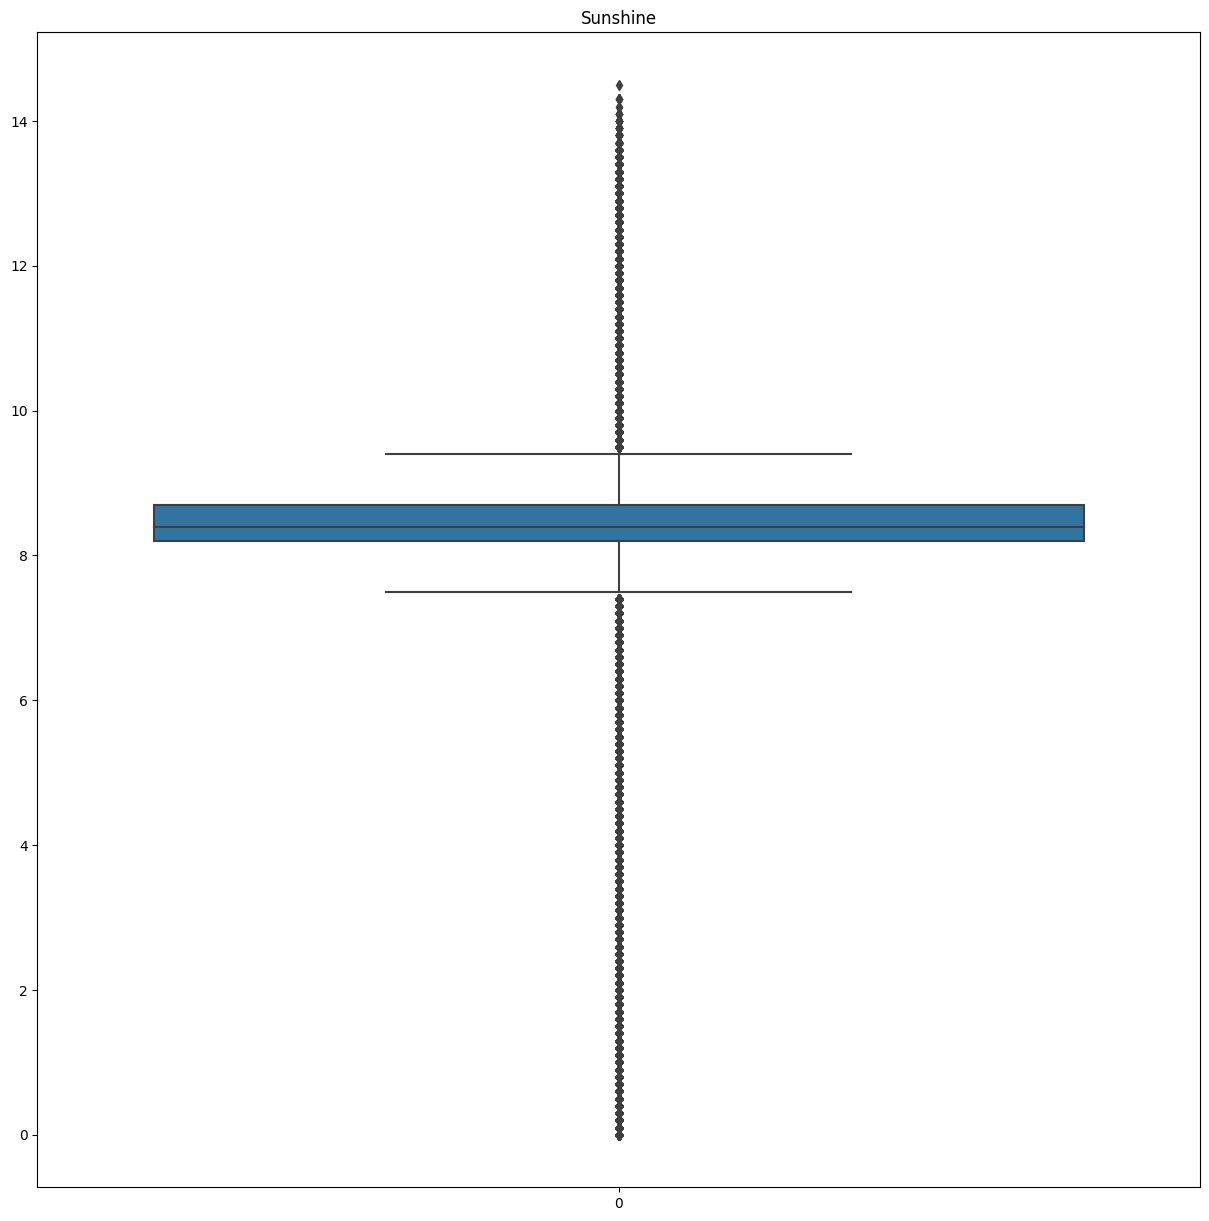

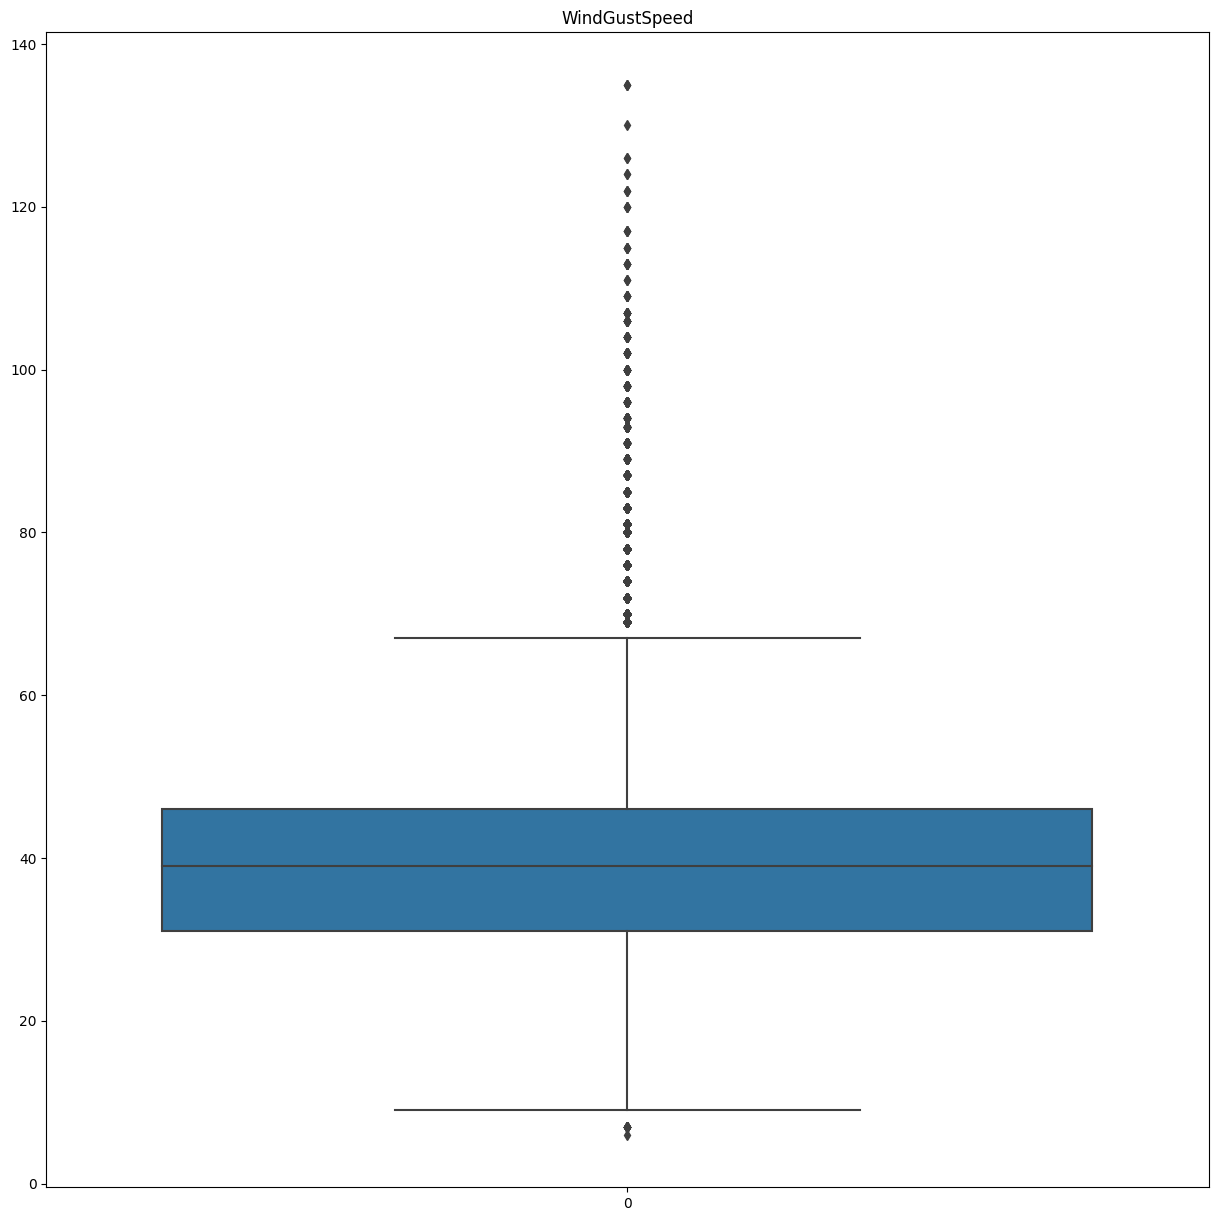

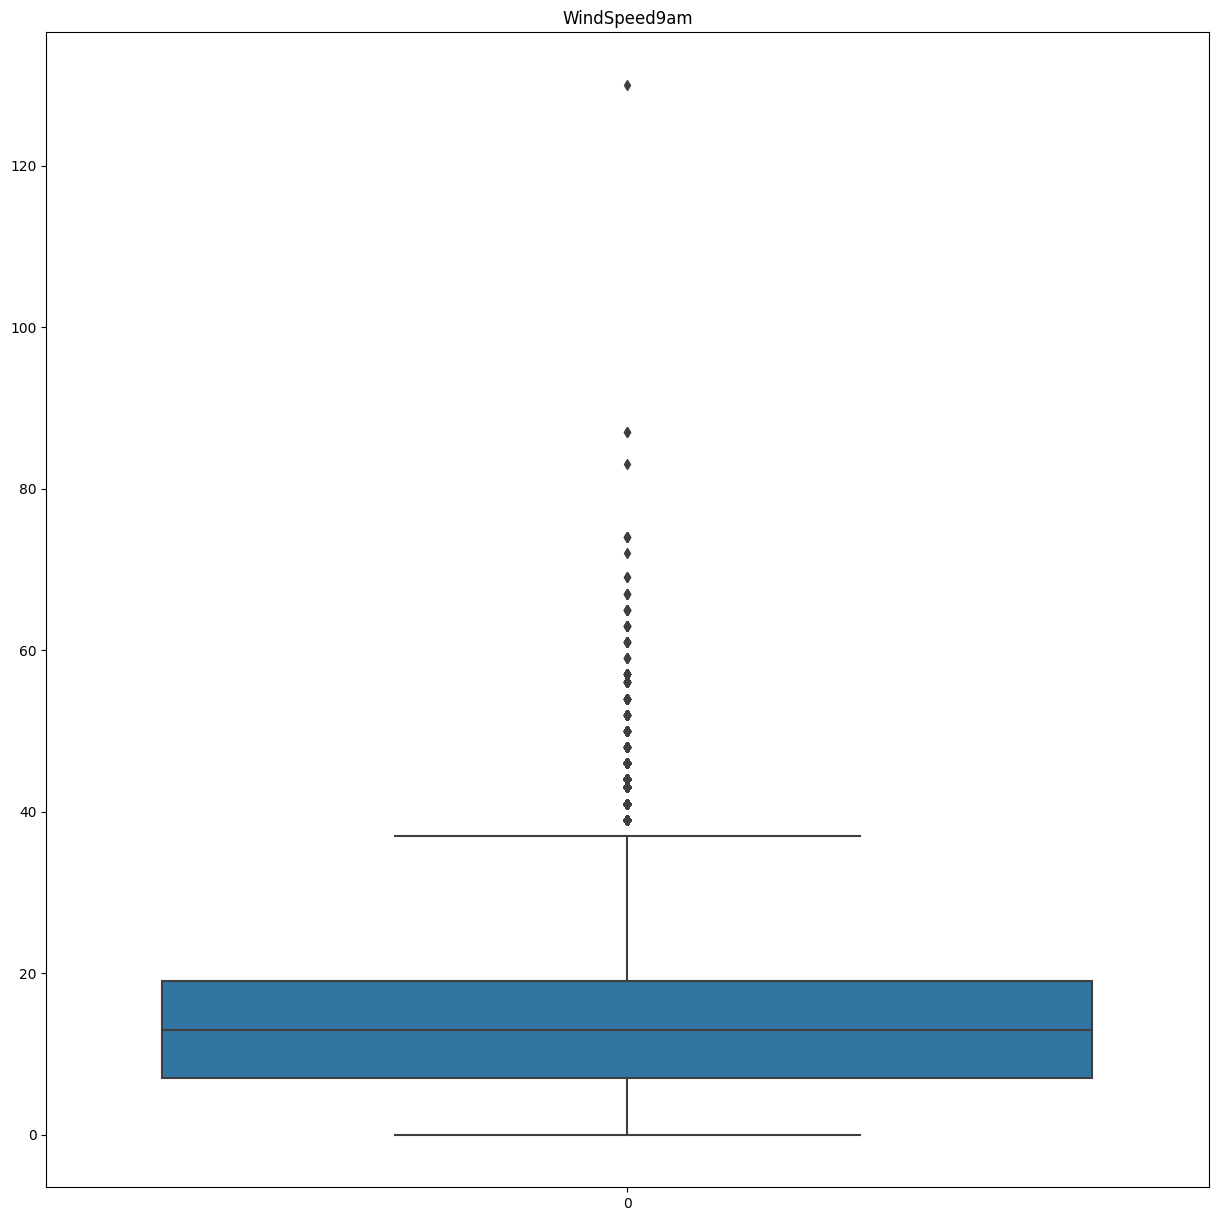

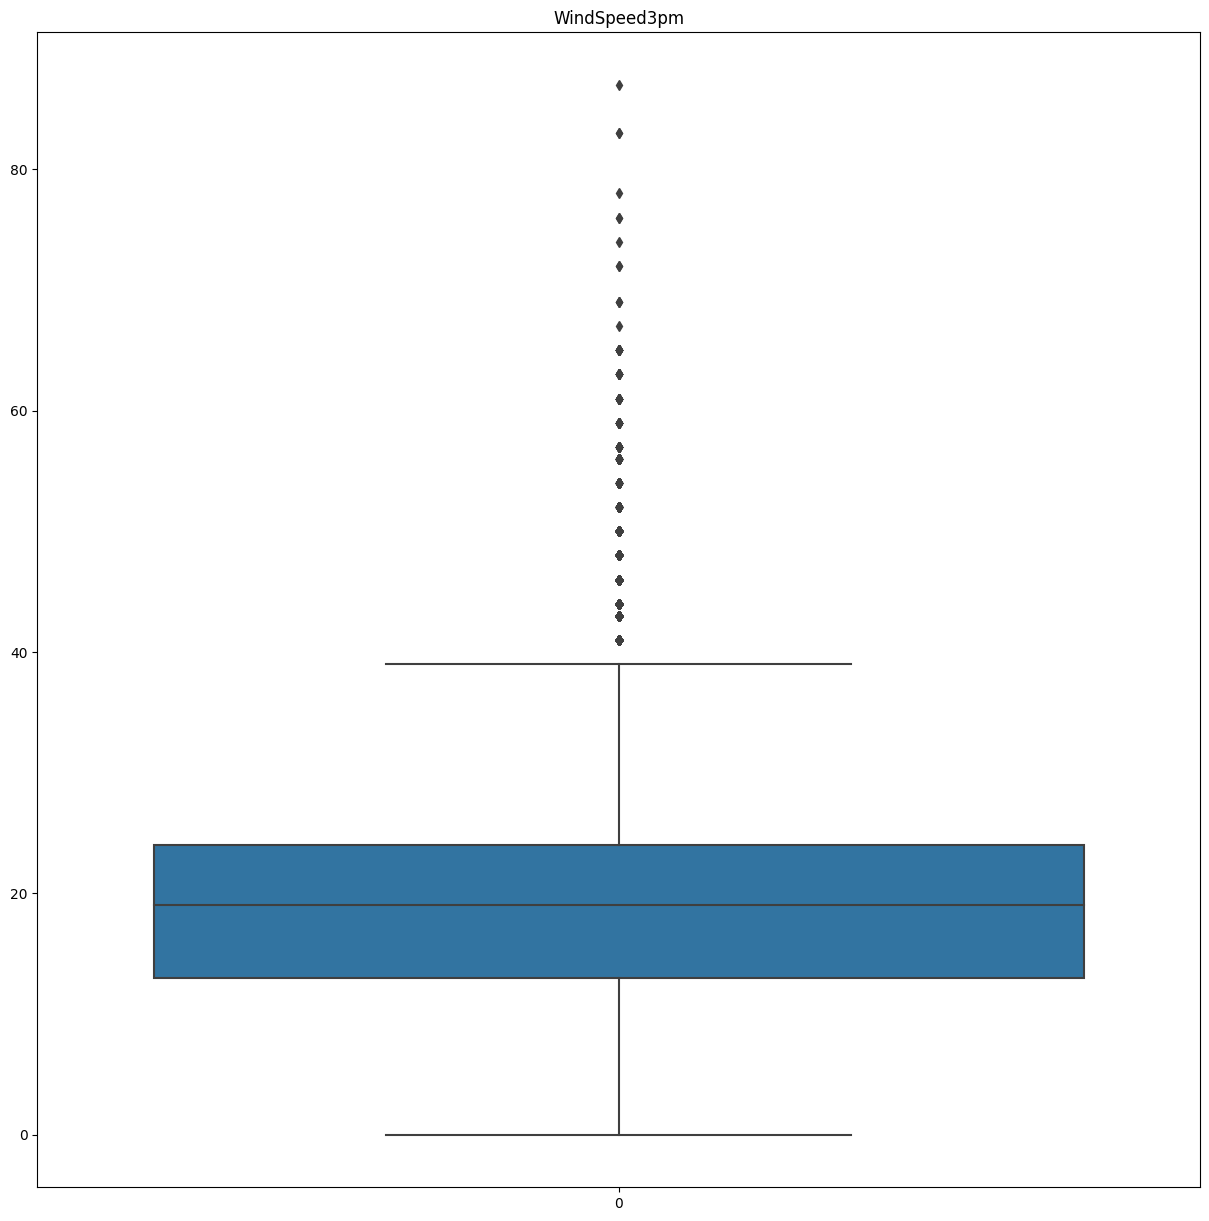

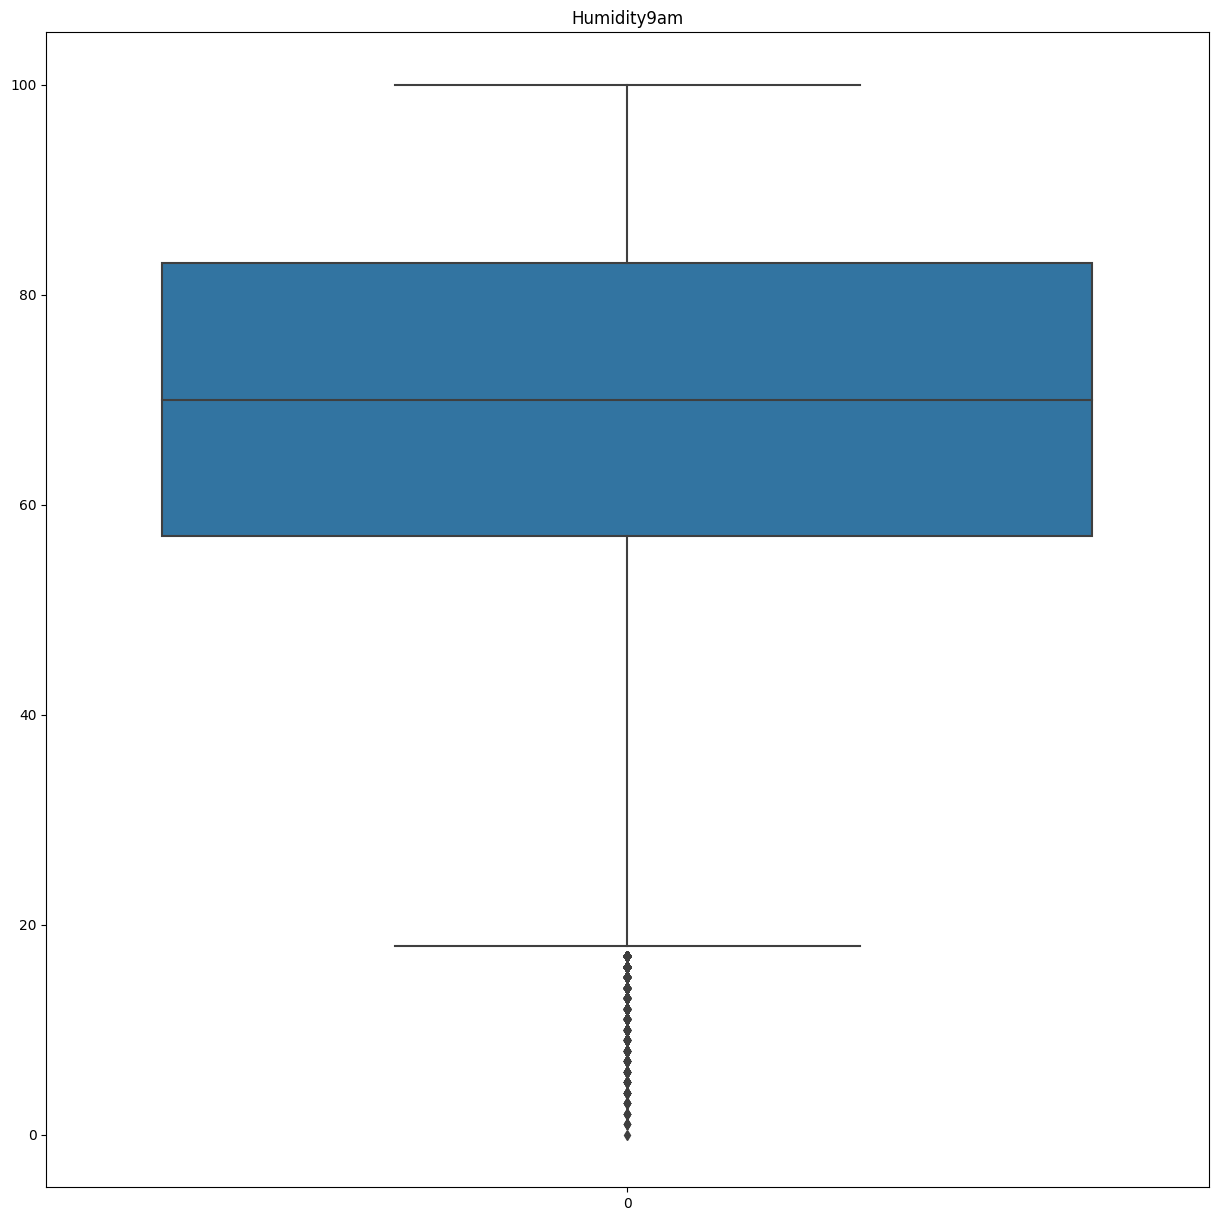

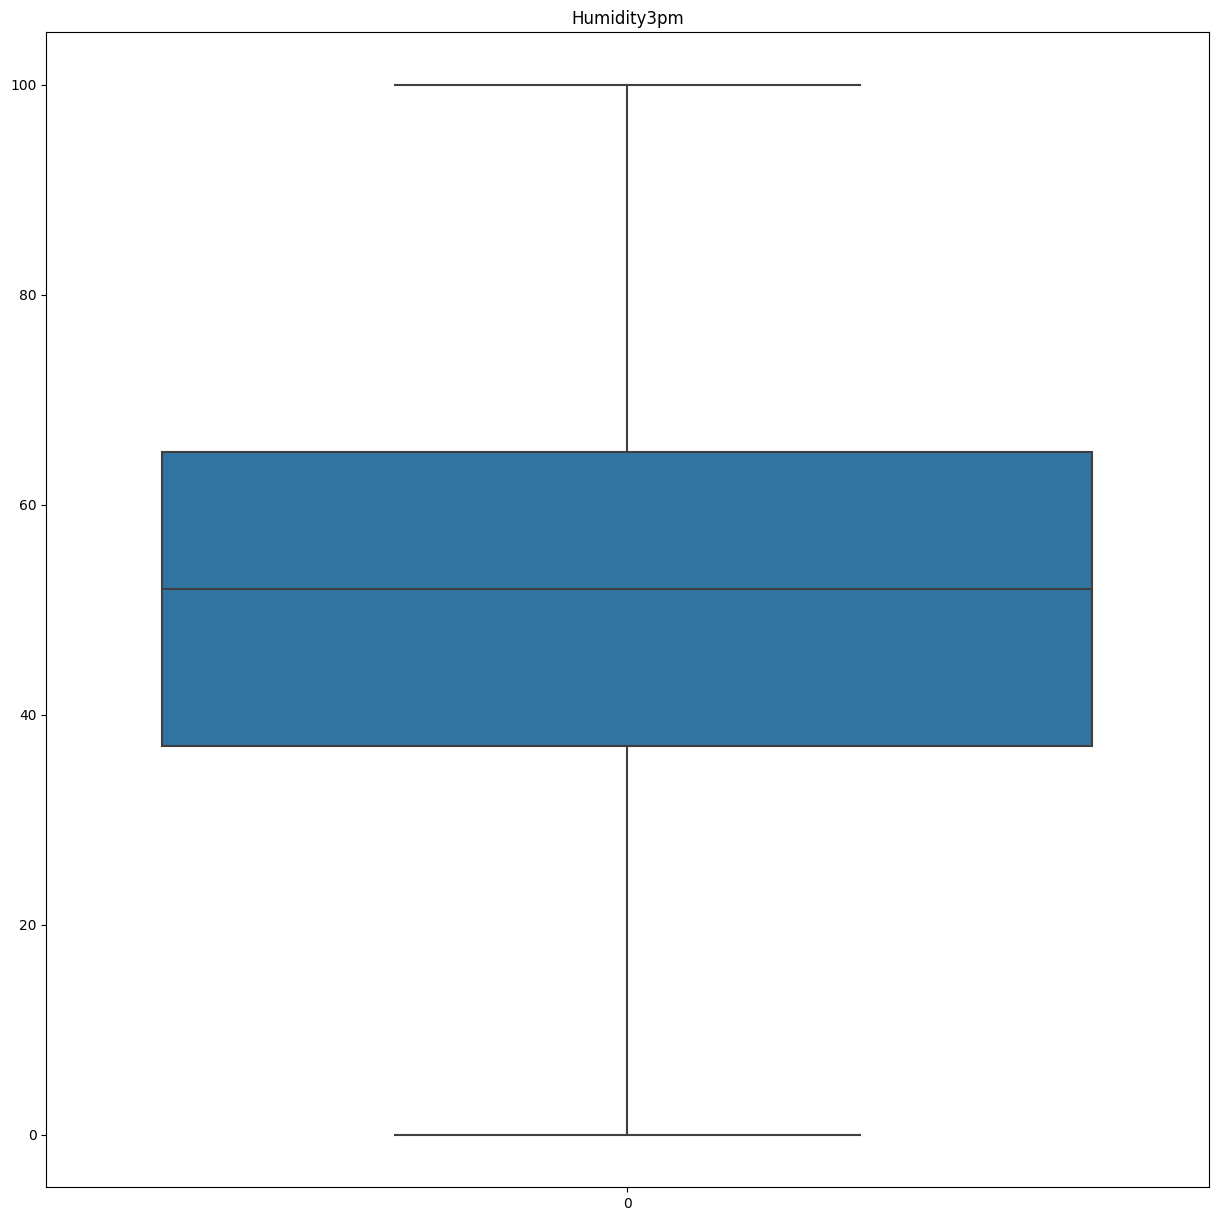

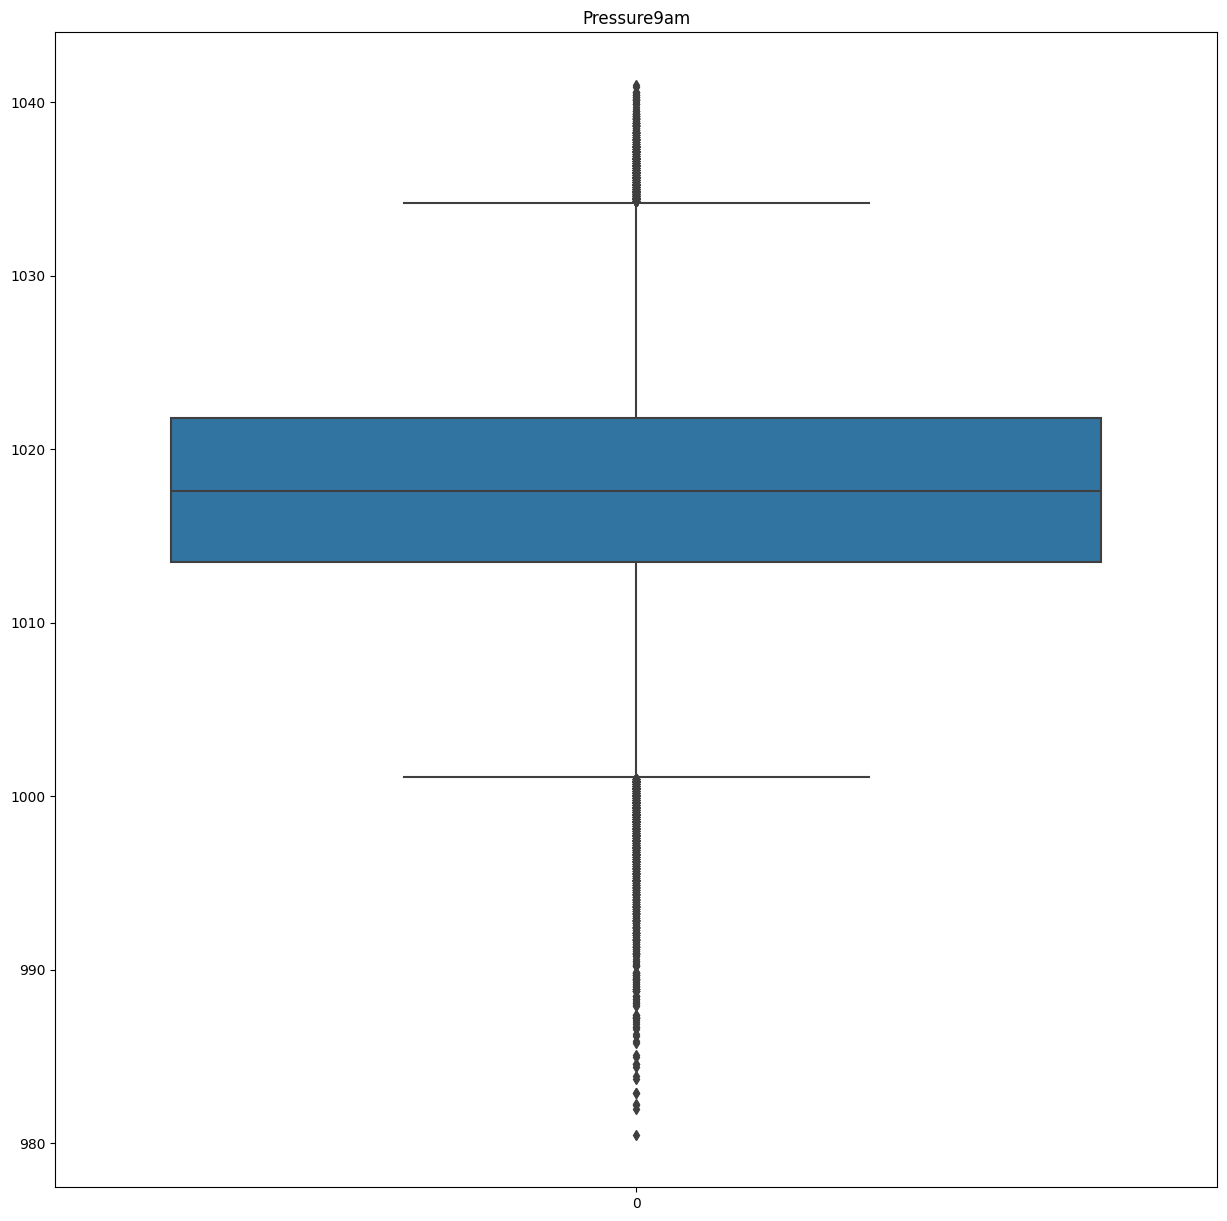

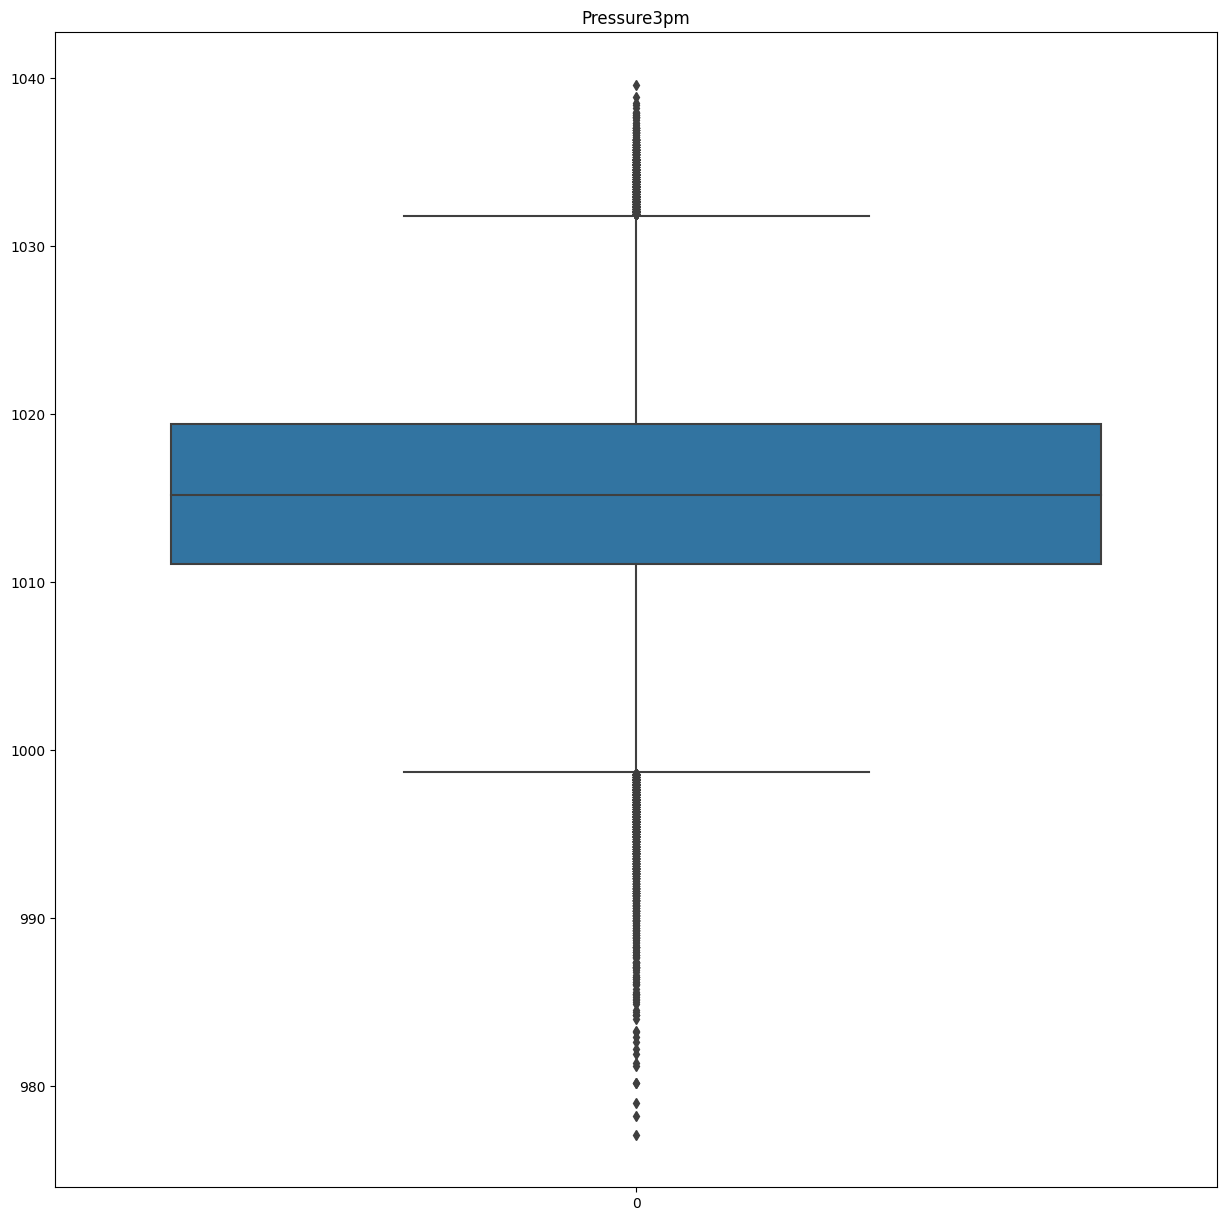

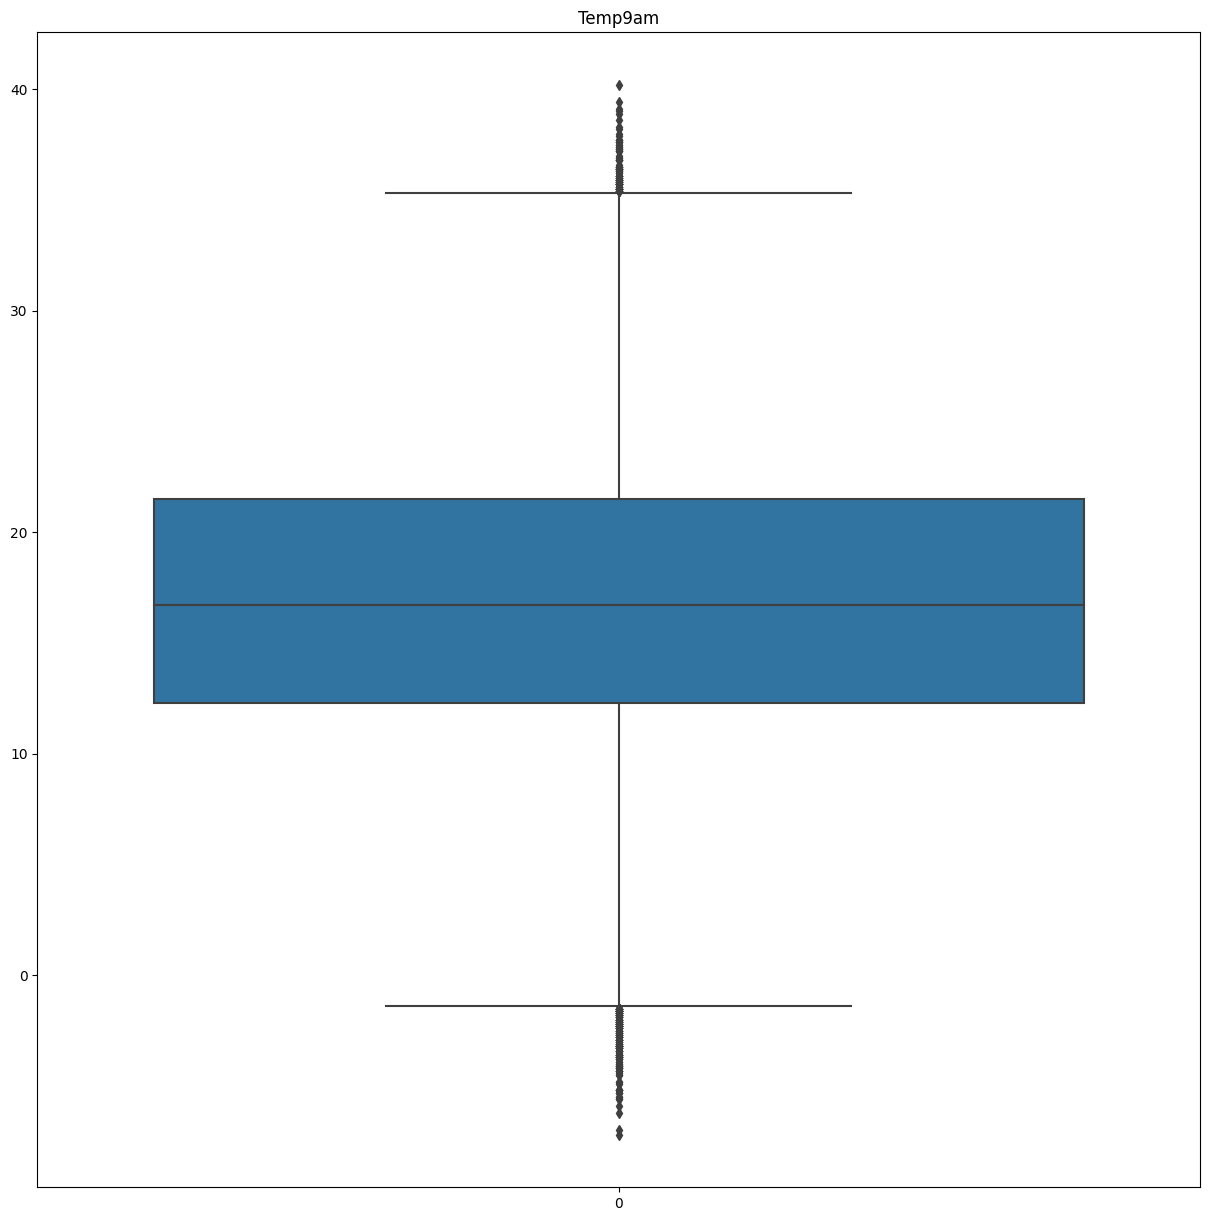

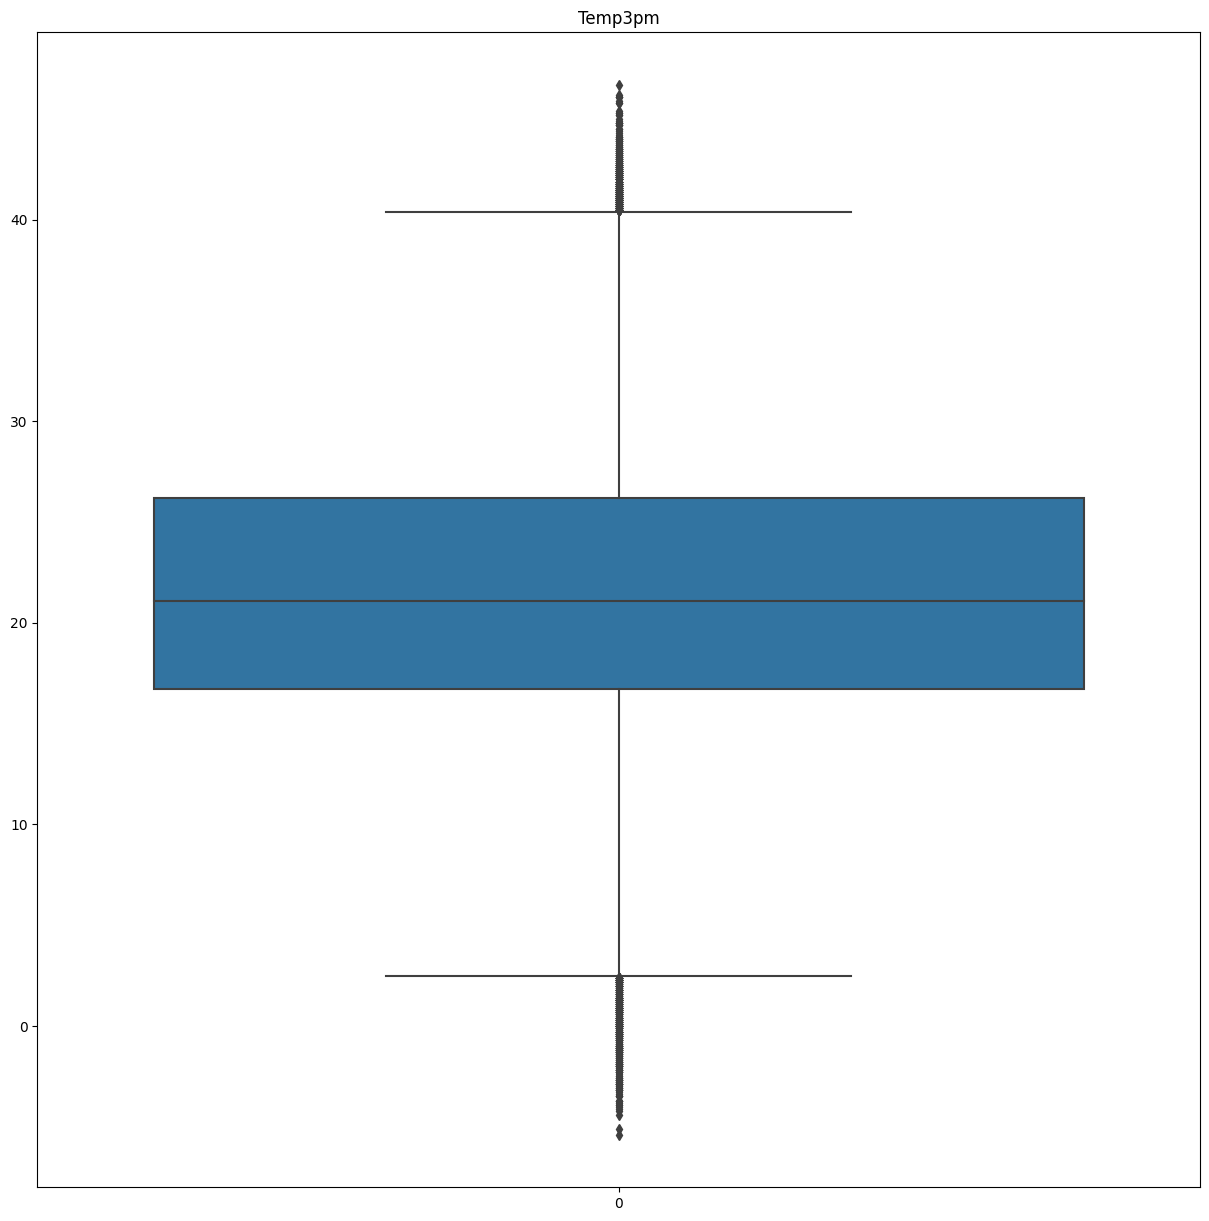

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate through each continuous feature
for feature in cont_features:
    plt.figure(figsize=(15, 15))  # Create a new figure
    sns.boxplot(weather_data[feature])  # Create a boxplot for the current feature
    plt.title(feature)  # Set the title of the plot
    plt.show()  # Display the plot


In [35]:
for feature in cont_features:
    print(feature)


MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [36]:


# Calculate IQR
IQR = weather_data["MinTemp"].quantile(0.75) - weather_data["MinTemp"].quantile(0.25)

# Calculate lower and upper bridges
lower_bridge = weather_data["MinTemp"].quantile(0.25) - (IQR * 1.5)
upper_bridge = weather_data["MinTemp"].quantile(0.75) + (IQR * 1.5)

print("Lower Bridge:", lower_bridge)
print("Upper Bridge:", upper_bridge)


Lower Bridge: -5.950000000000002
Upper Bridge: 30.450000000000003


In [37]:
weather_data.loc[weather_data['MinTemp']>=30.45,'MinTemp']=30.45
weather_data.loc[weather_data['MinTemp']<=-5.95,'MinTemp']=-5.95

In [38]:
IQR=weather_data.MaxTemp.quantile(0.75)-weather_data.MaxTemp.quantile(0.25)
lower_bridge=weather_data.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_data.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.700000000000001 43.5


In [39]:
weather_data.loc[weather_data['MaxTemp']>=43.5,'MaxTemp']=43.5
weather_data.loc[weather_data['MaxTemp']<=2.7,'MaxTemp']=2.7

In [40]:
IQR=weather_data.Rainfall.quantile(0.75)-weather_data.Rainfall.quantile(0.25)
lower_bridge=weather_data.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_data.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.8999999999999999 1.5


In [41]:
weather_data.loc[weather_data['Rainfall']>=1.5,'Rainfall']=1.5
weather_data.loc[weather_data['Rainfall']<=-0.89,'Rainfall']=-0.89

In [42]:


# Calculate IQR for Evaporation
IQR = weather_data["Evaporation"].quantile(0.75) - weather_data["Evaporation"].quantile(0.25)

# Calculate lower and upper bridges
lower_bridge = weather_data["Evaporation"].quantile(0.25) - (IQR * 1.5)
upper_bridge = weather_data["Evaporation"].quantile(0.75) + (IQR * 1.5)

print("Lower Bridge:", lower_bridge)
print("Upper Bridge:", upper_bridge)


Lower Bridge: 2.1999999999999997
Upper Bridge: 7.0


In [42]:
weather_data.loc[weather_data['Evaporation']>=14.6,'Evaporation']=14.6
weather_data.loc[weather_data['Evaporation']<=-4.6,'Evaporation']=-4.6

In [43]:
IQR=weather_data.WindGustSpeed.quantile(0.75)-weather_data.WindGustSpeed.quantile(0.25)
lower_bridge=weather_data.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_data.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [44]:
weather_data.loc[weather_data['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
weather_data.loc[weather_data['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [45]:
IQR=weather_data.WindSpeed9am.quantile(0.75)-weather_data.WindSpeed9am.quantile(0.25)
lower_bridge=weather_data.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_data.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [46]:
weather_data.loc[weather_data['WindSpeed9am']>=37,'WindSpeed9am']=37
weather_data.loc[weather_data['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [47]:
IQR=weather_data.WindSpeed3pm.quantile(0.75)-weather_data.WindSpeed3pm.quantile(0.25)
lower_bridge=weather_data.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_data.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [48]:
weather_data.loc[weather_data['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
weather_data.loc[weather_data['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [49]:
IQR=weather_data.Humidity9am.quantile(0.75)-weather_data.Humidity9am.quantile(0.25)
lower_bridge=weather_data.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_data.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [50]:
weather_data.loc[weather_data['Humidity9am']>=122,'Humidity9am']=122
weather_data.loc[weather_data['Humidity9am']<=18,'Humidity9am']=18

In [51]:
IQR=weather_data.Pressure9am.quantile(0.75)-weather_data.Pressure9am.quantile(0.25)
lower_bridge=weather_data.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_data.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.0500000000001 1034.25


In [52]:
weather_data.loc[weather_data['Pressure9am']>=1034.25,'Pressure9am']=1034.25
weather_data.loc[weather_data['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [53]:
IQR=weather_data.Pressure3pm.quantile(0.75)-weather_data.Pressure3pm.quantile(0.25)
lower_bridge=weather_data.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_data.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

998.6500000000001 1031.85


In [54]:
weather_data.loc[weather_data['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
weather_data.loc[weather_data['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [55]:
IQR=weather_data.Temp9am.quantile(0.75)-weather_data.Temp9am.quantile(0.25)
lower_bridge=weather_data.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_data.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [56]:
weather_data.loc[weather_data['Temp9am']>=35.3,'Temp9am']=35.3
weather_data.loc[weather_data['Temp9am']<=-1.49,'Temp9am']=-1.49

In [57]:
IQR=weather_data.Temp3pm.quantile(0.75)-weather_data.Temp3pm.quantile(0.25)
lower_bridge=weather_data.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=weather_data.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.4499999999999993 40.45


In [58]:
weather_data.loc[weather_data['Temp3pm']>=40.45,'Temp3pm']=40.45
weather_data.loc[weather_data['Temp3pm']<=2.45,'Temp3pm']=2.45

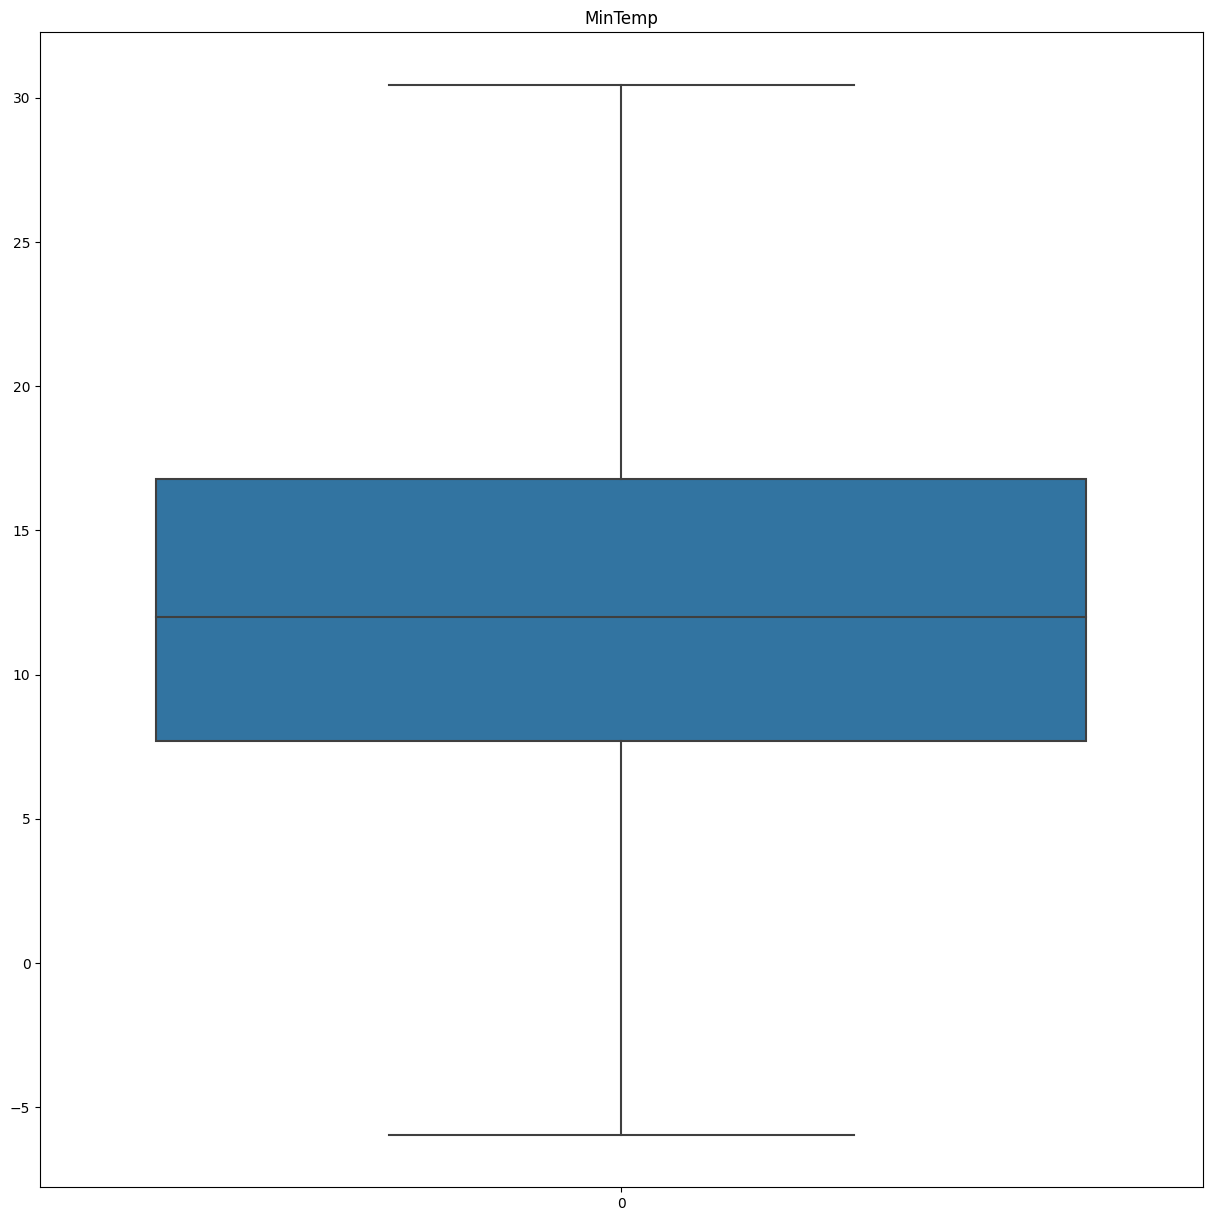

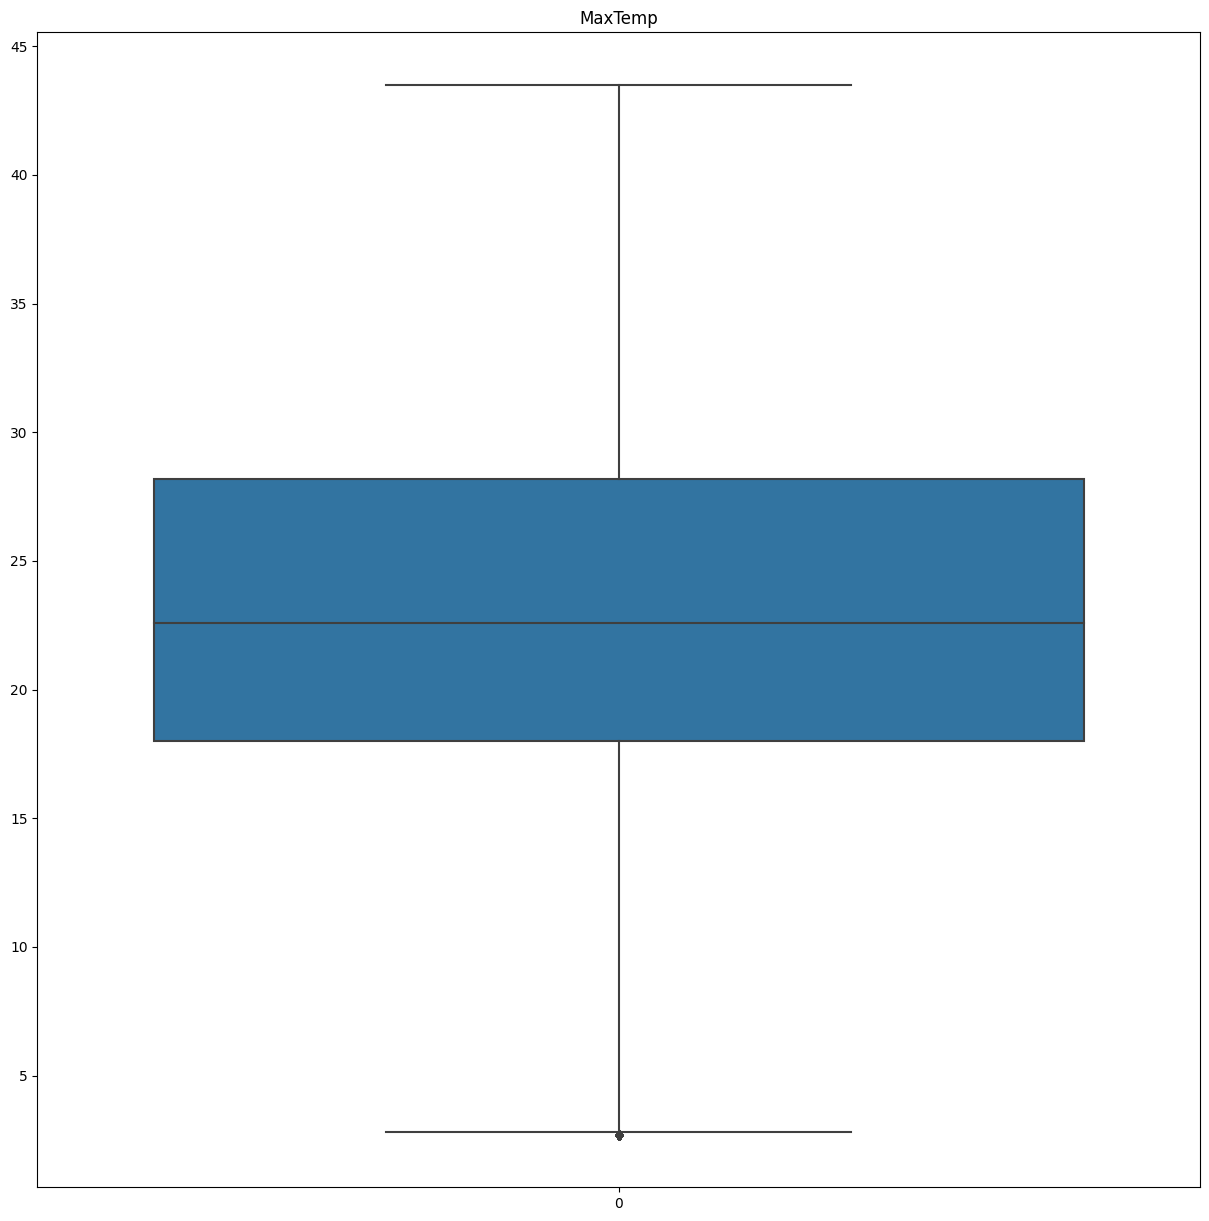

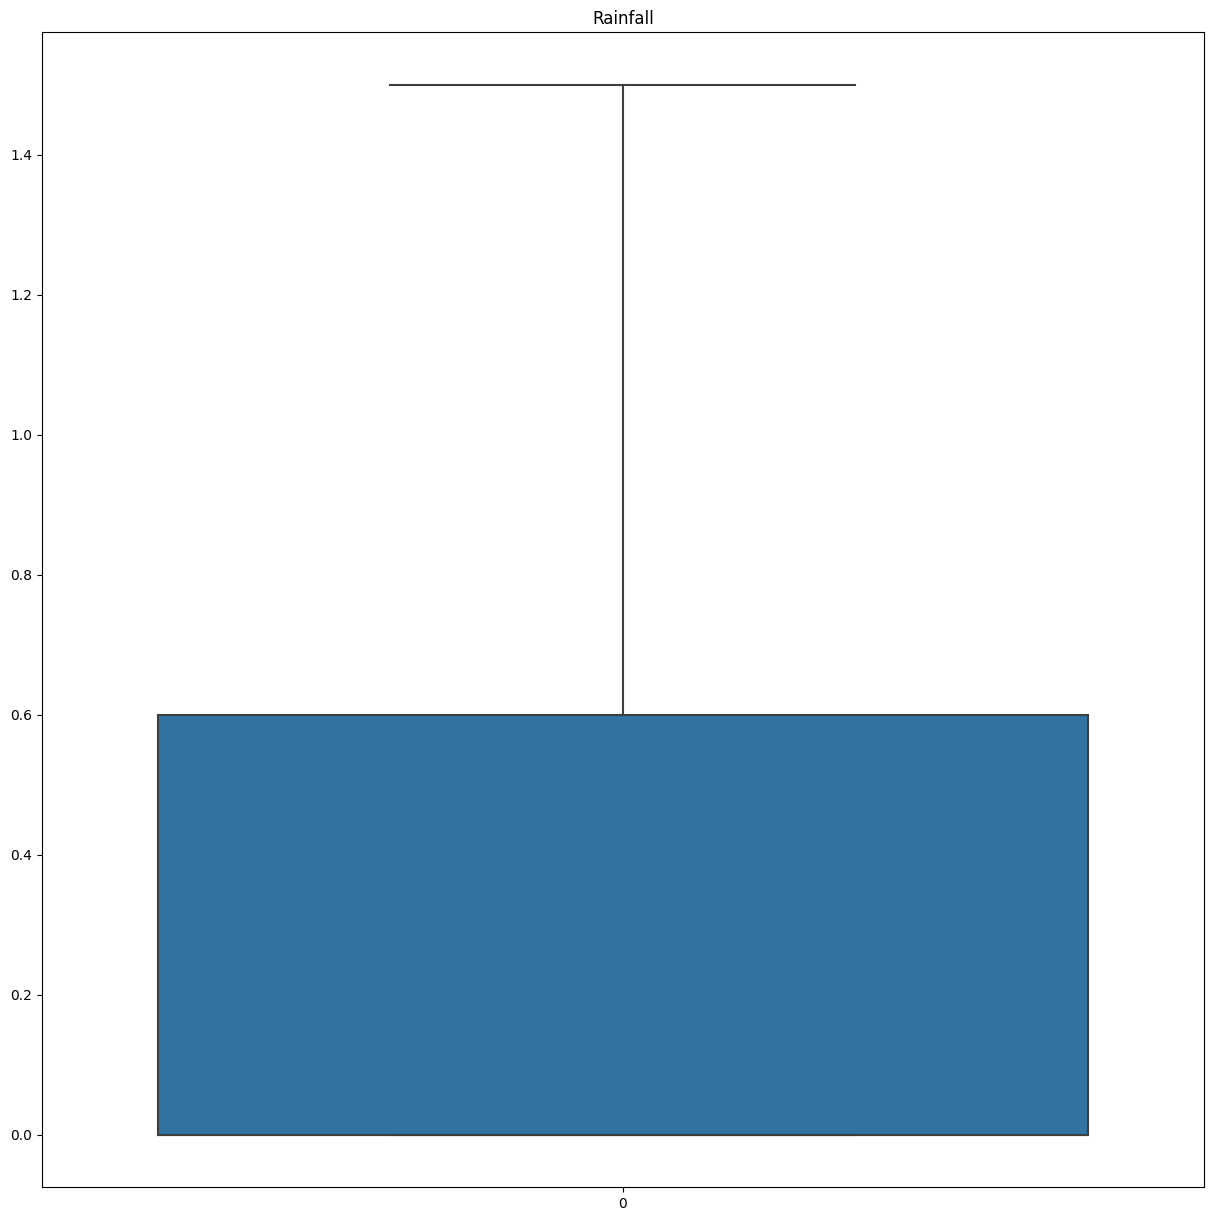

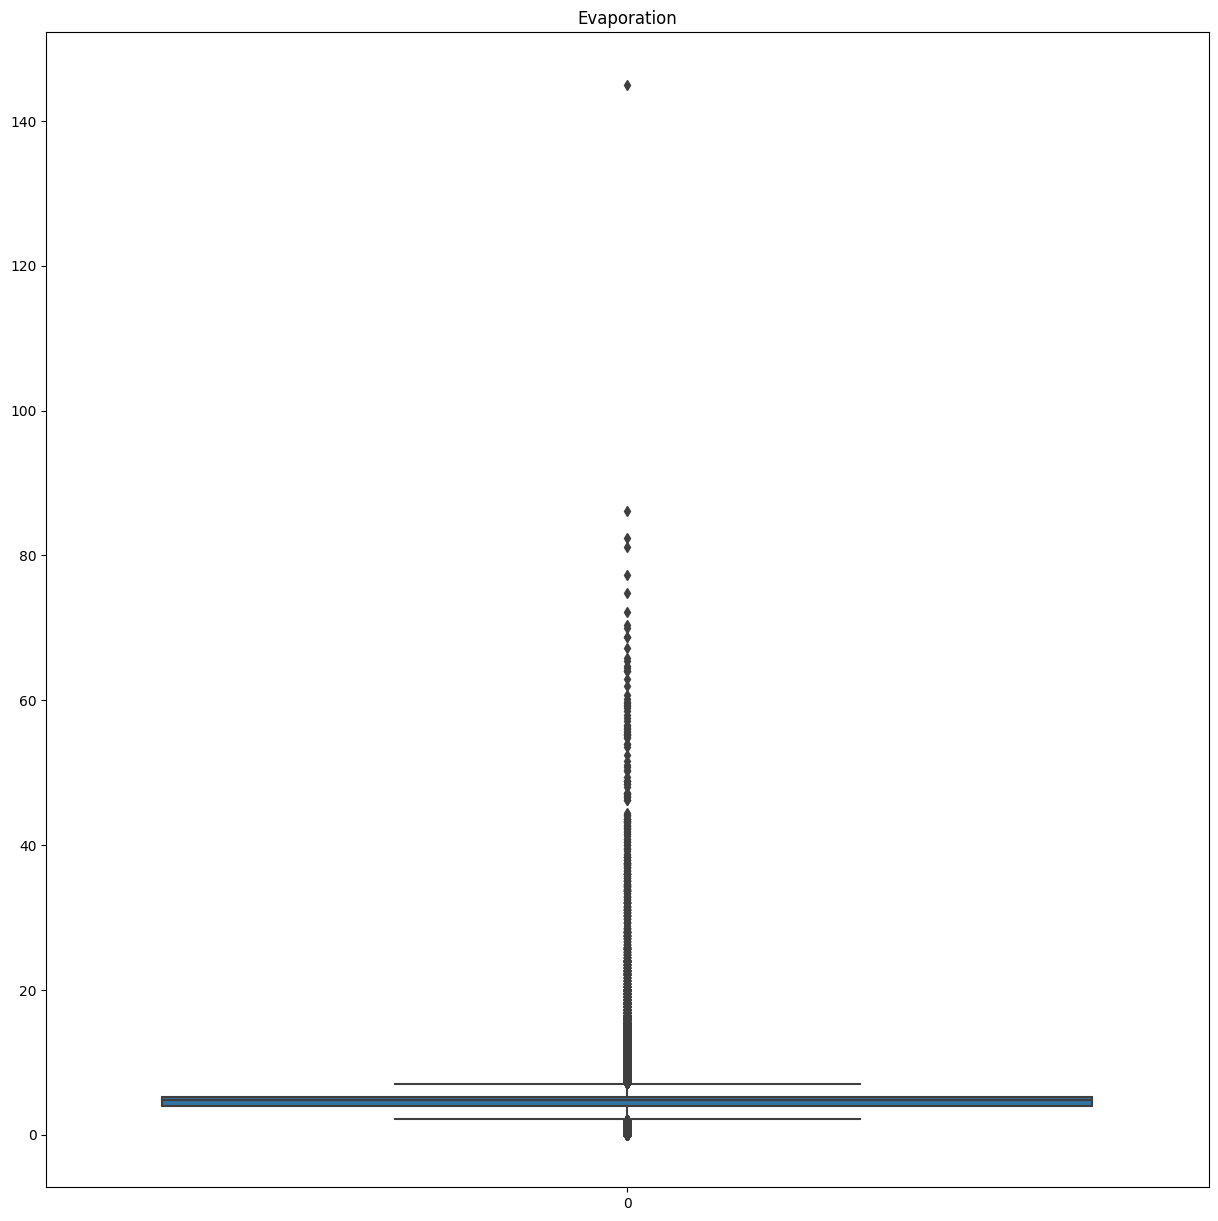

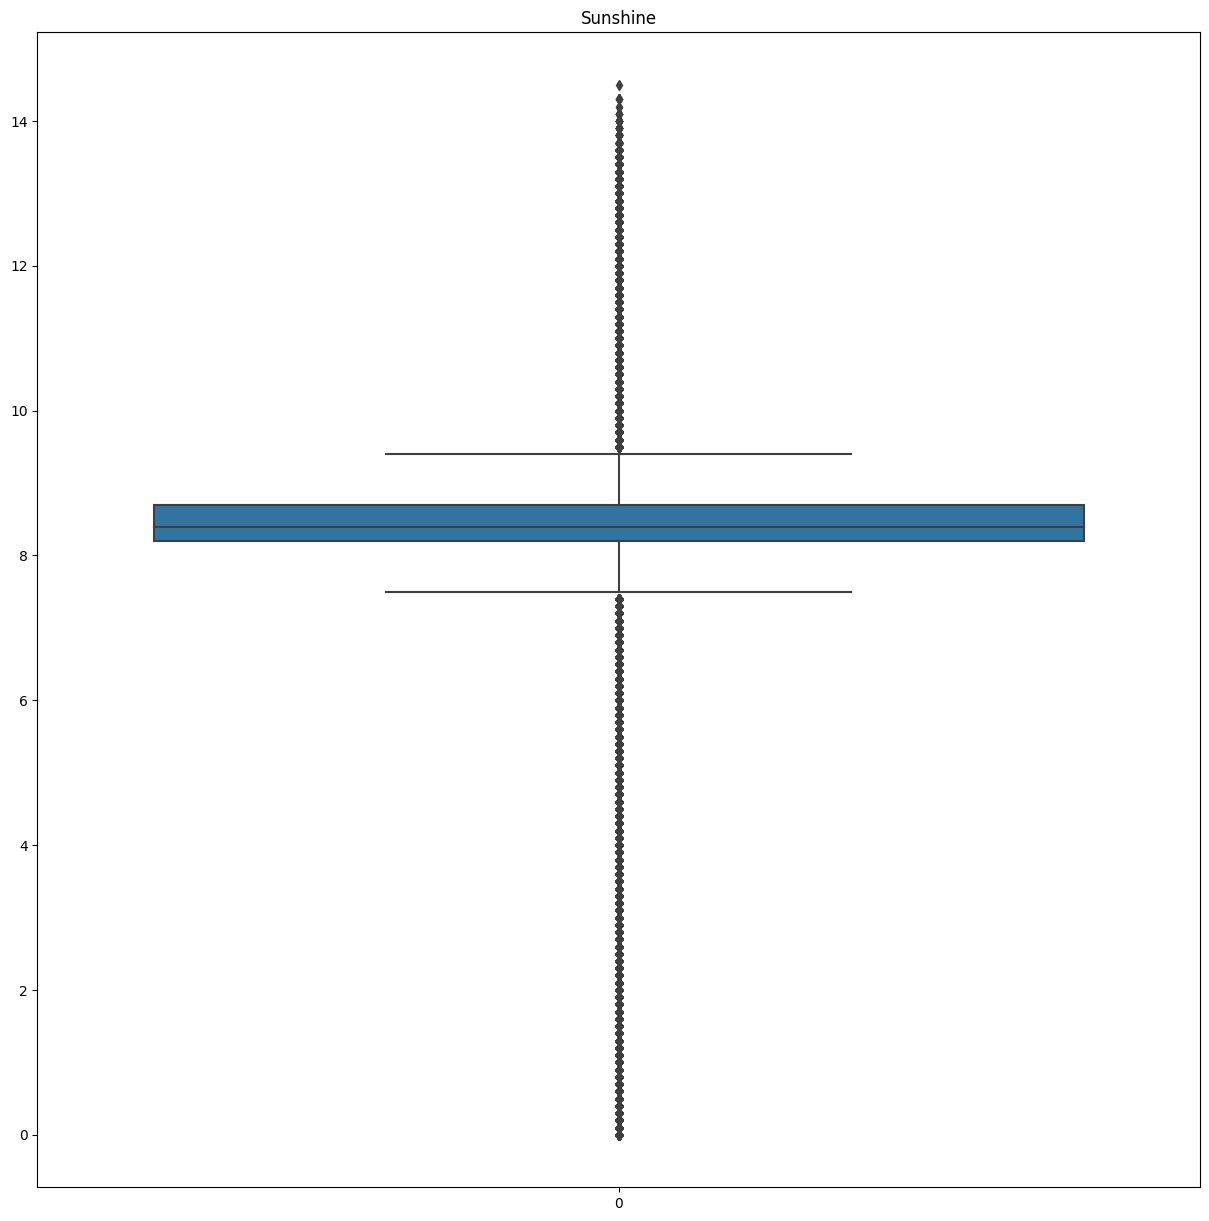

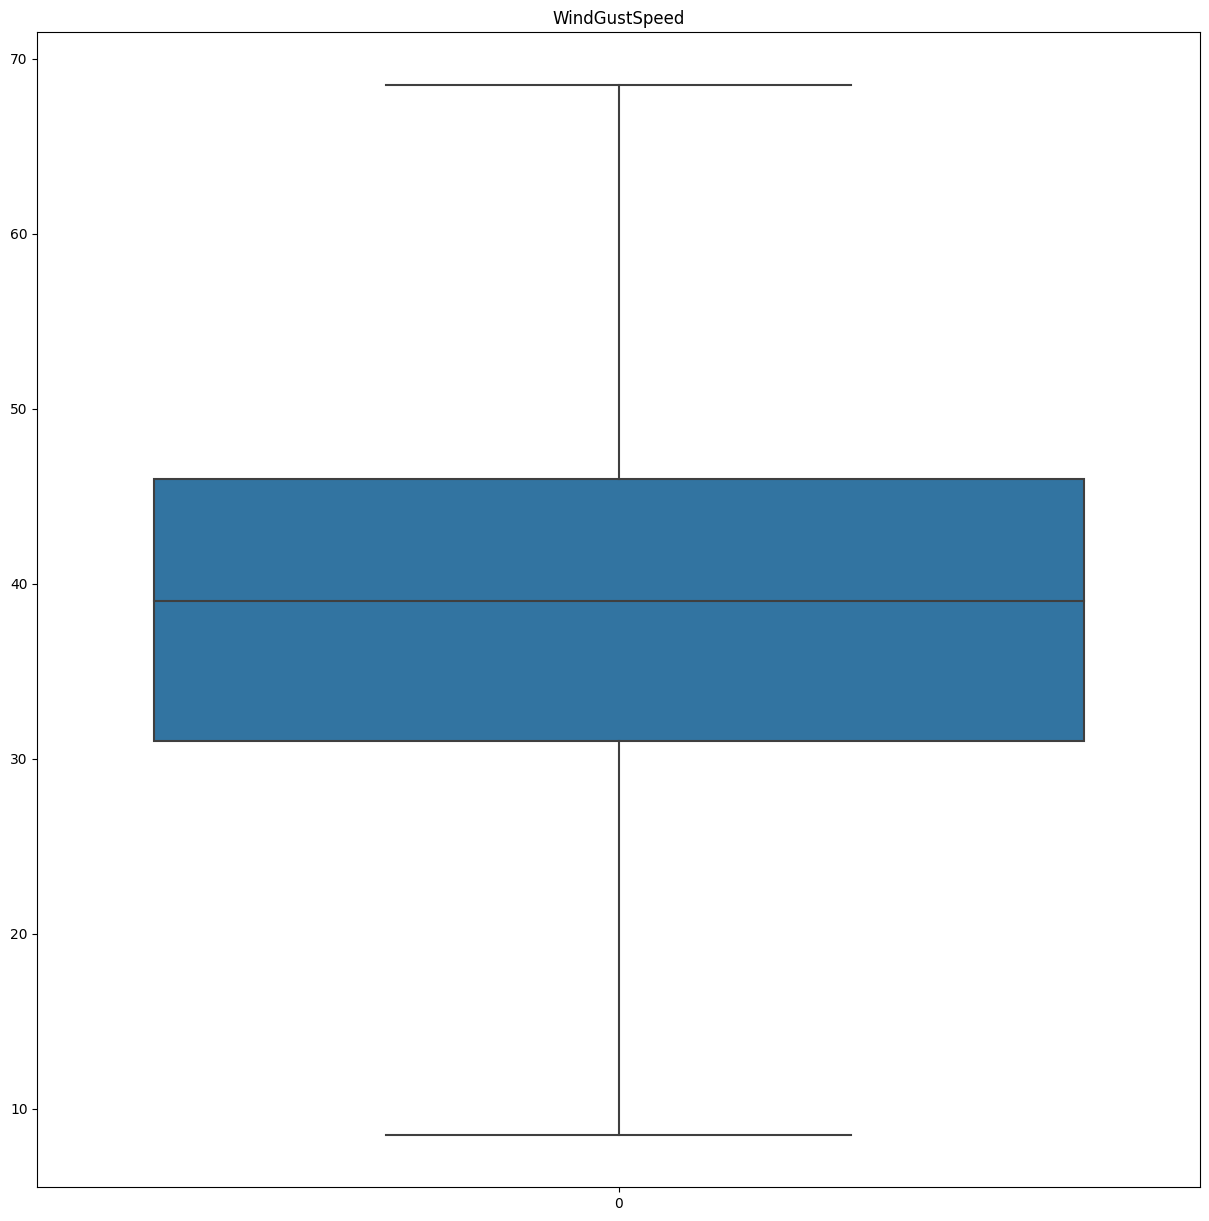

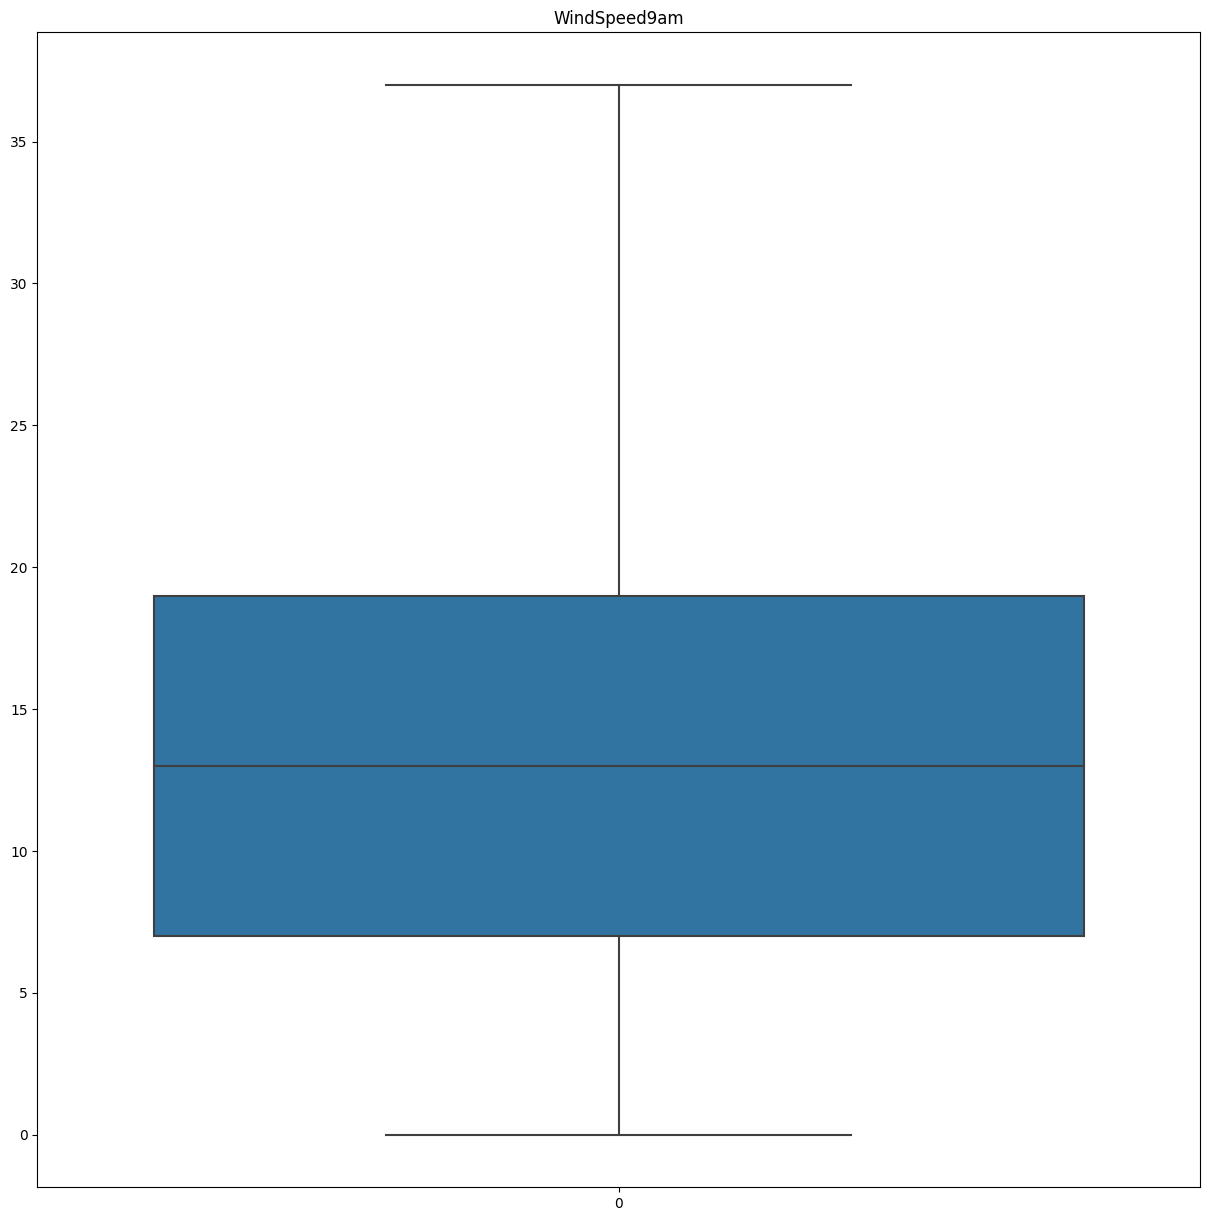

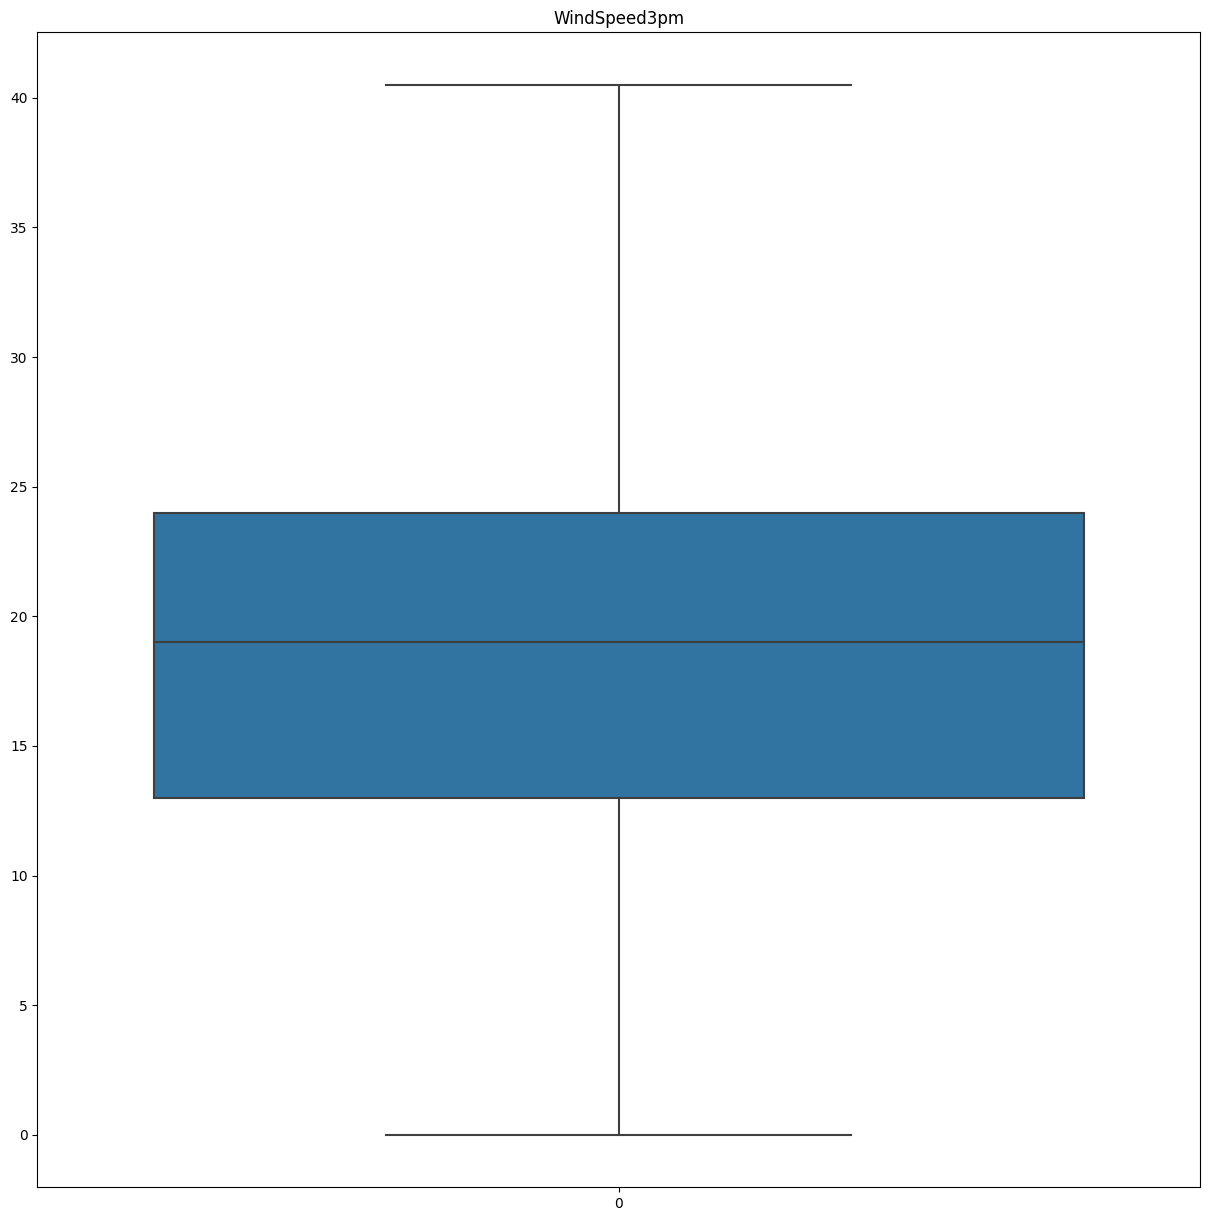

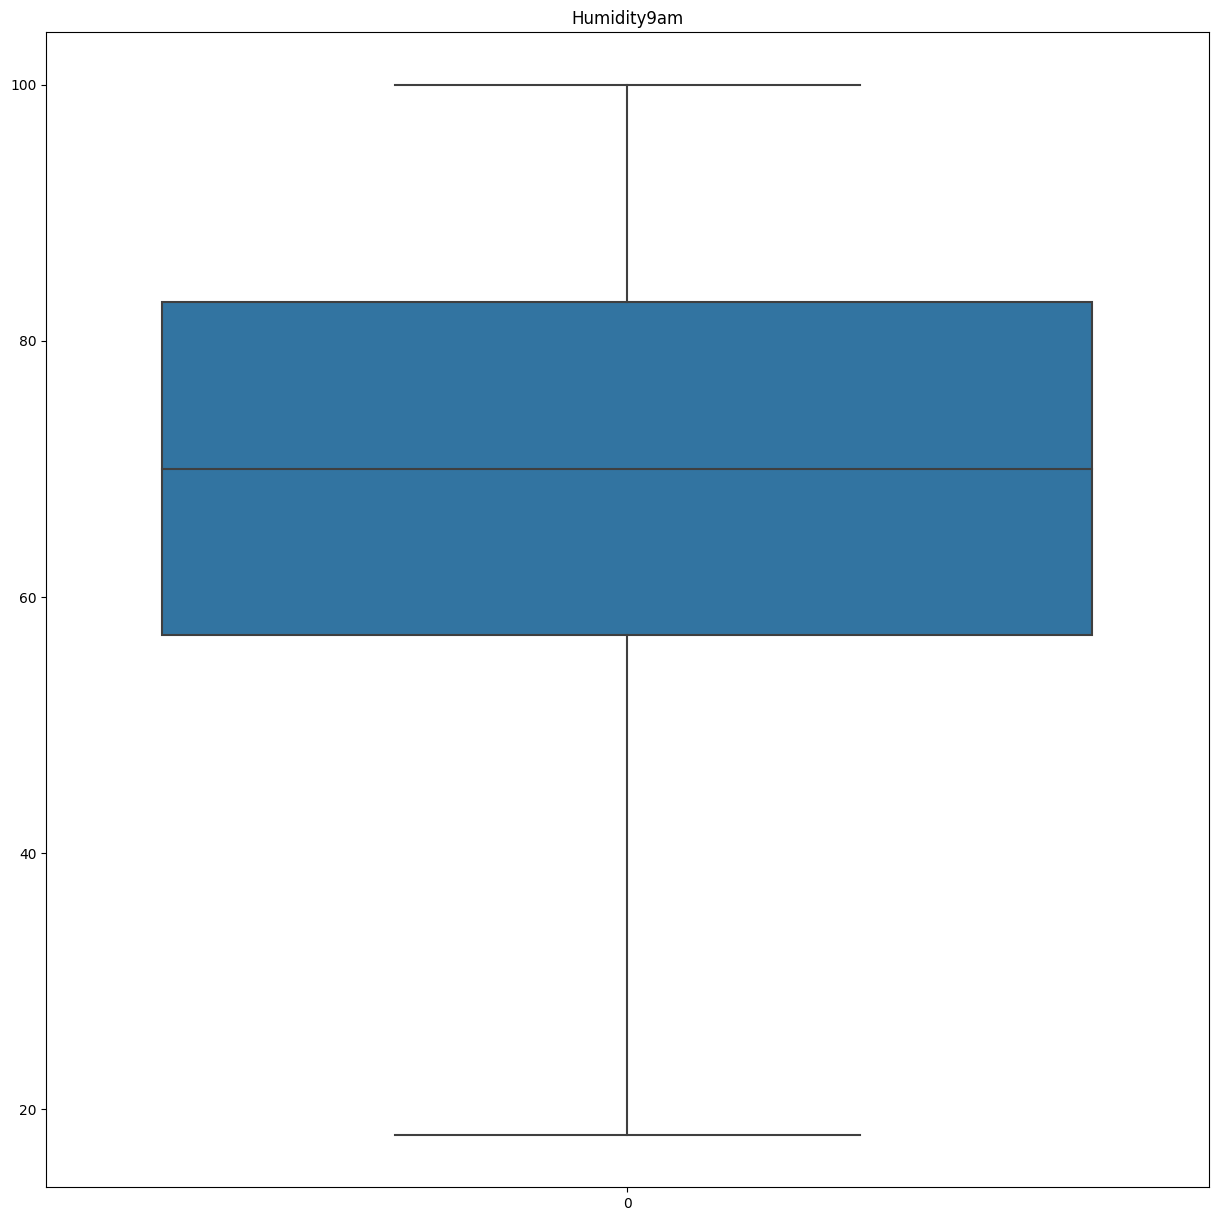

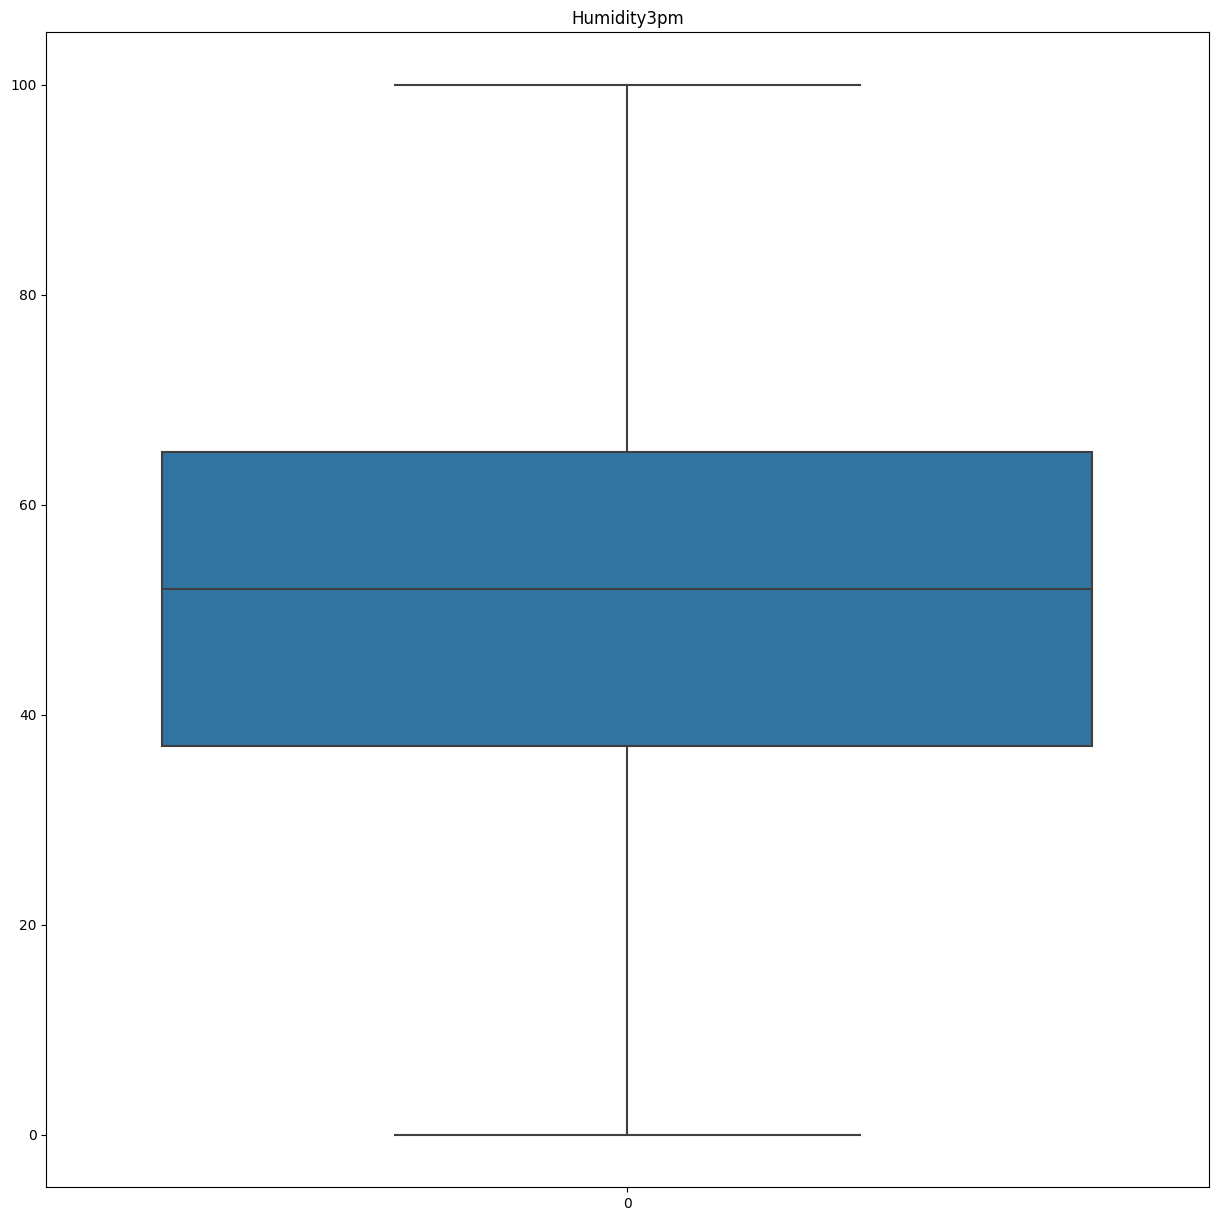

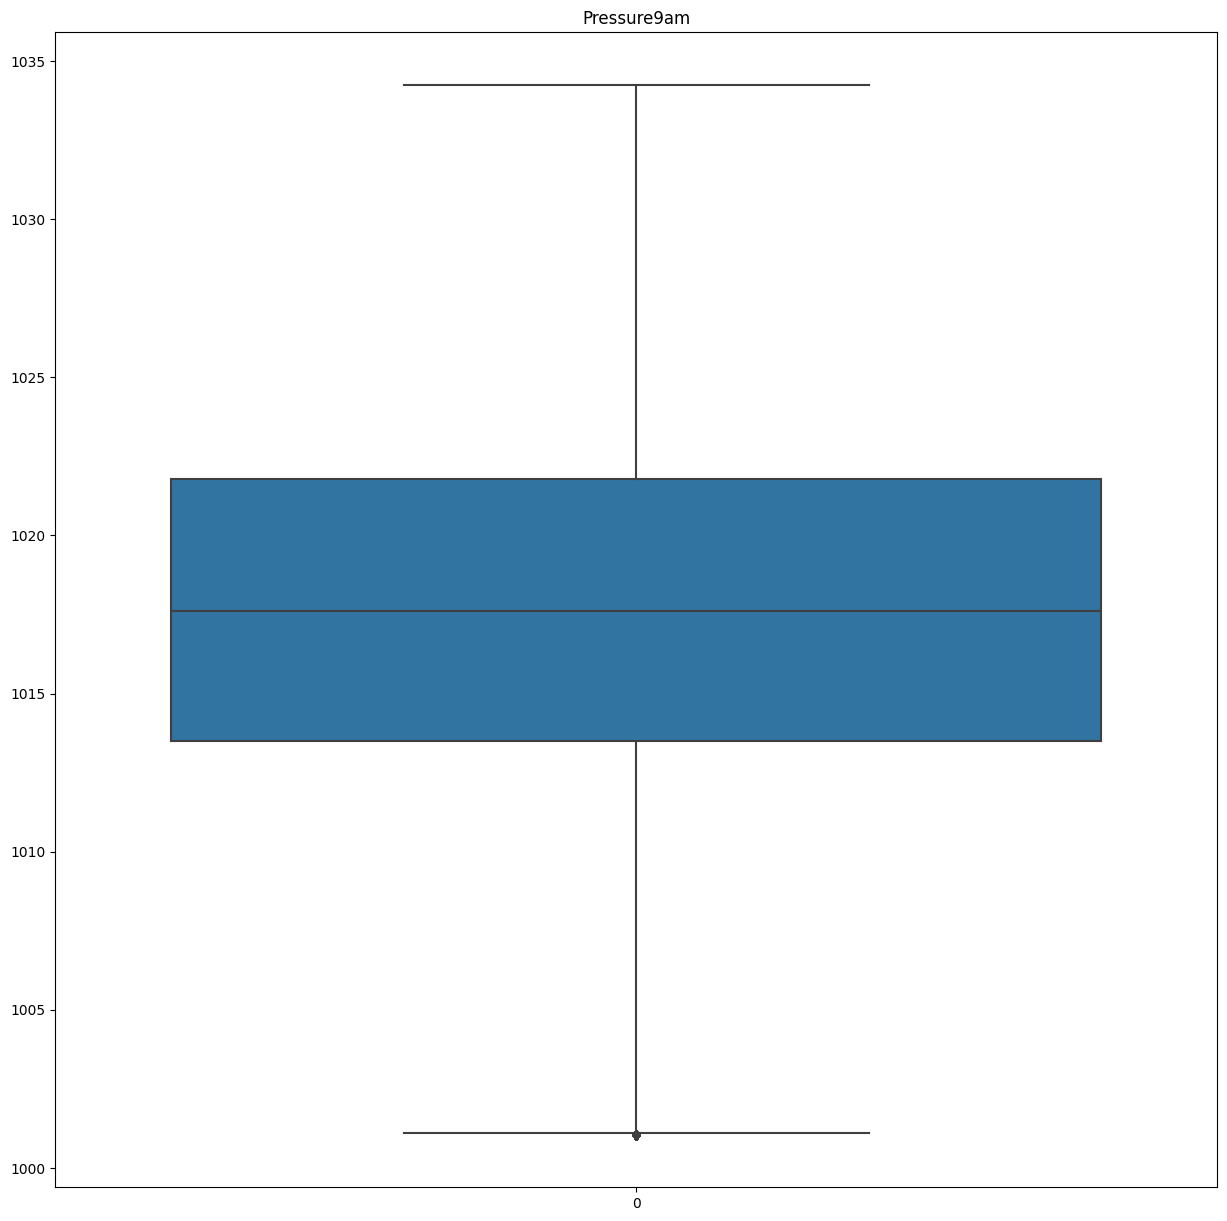

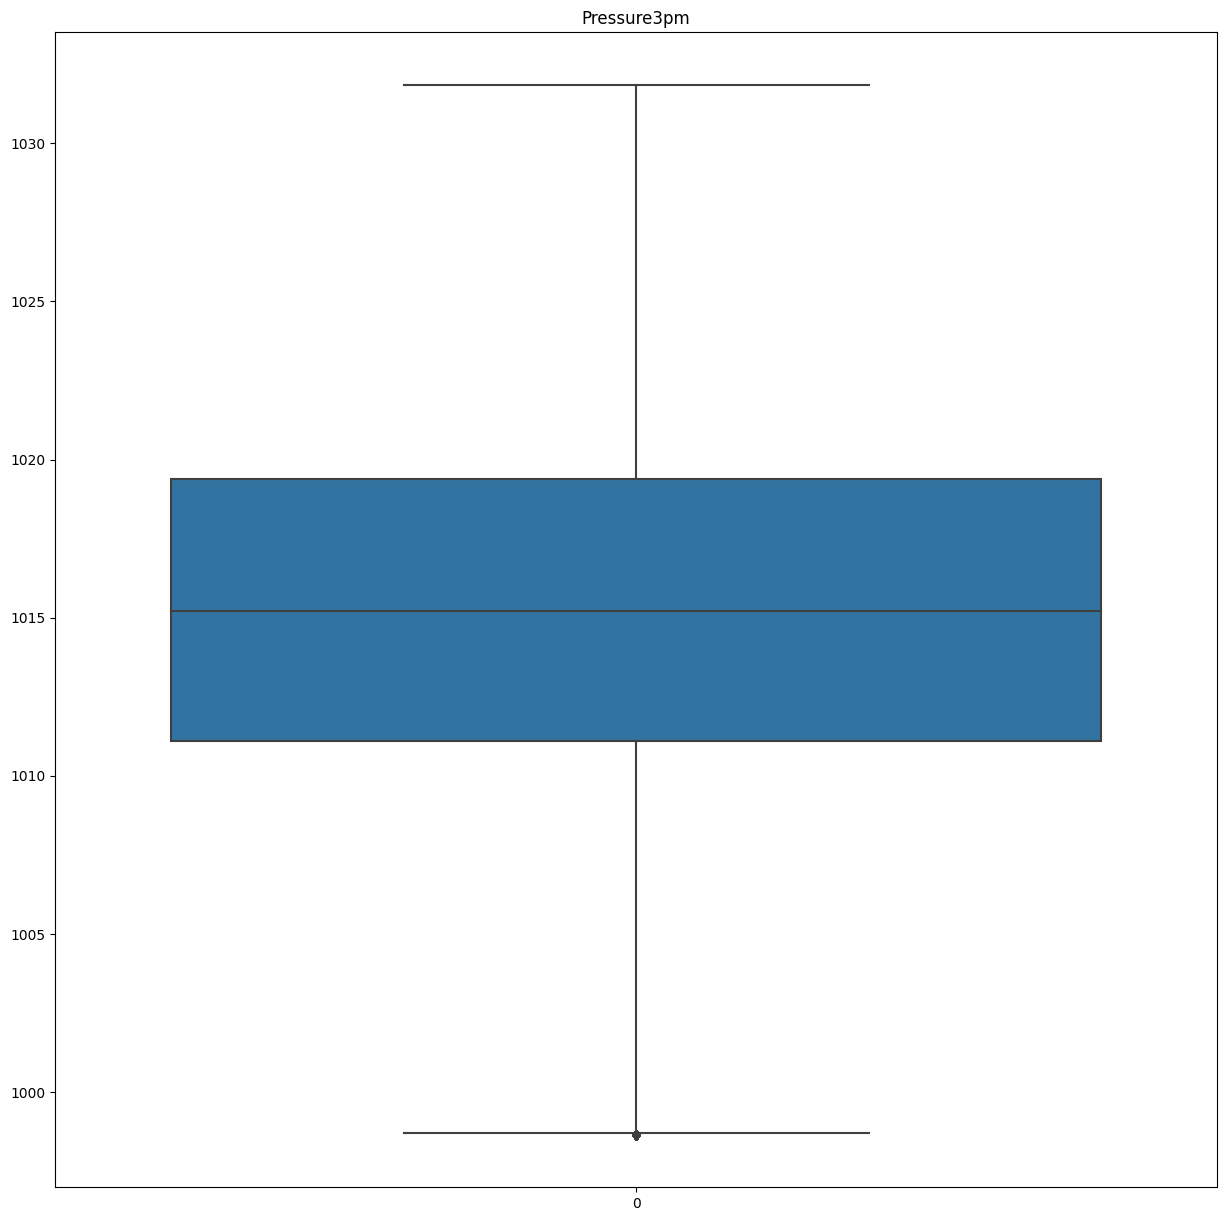

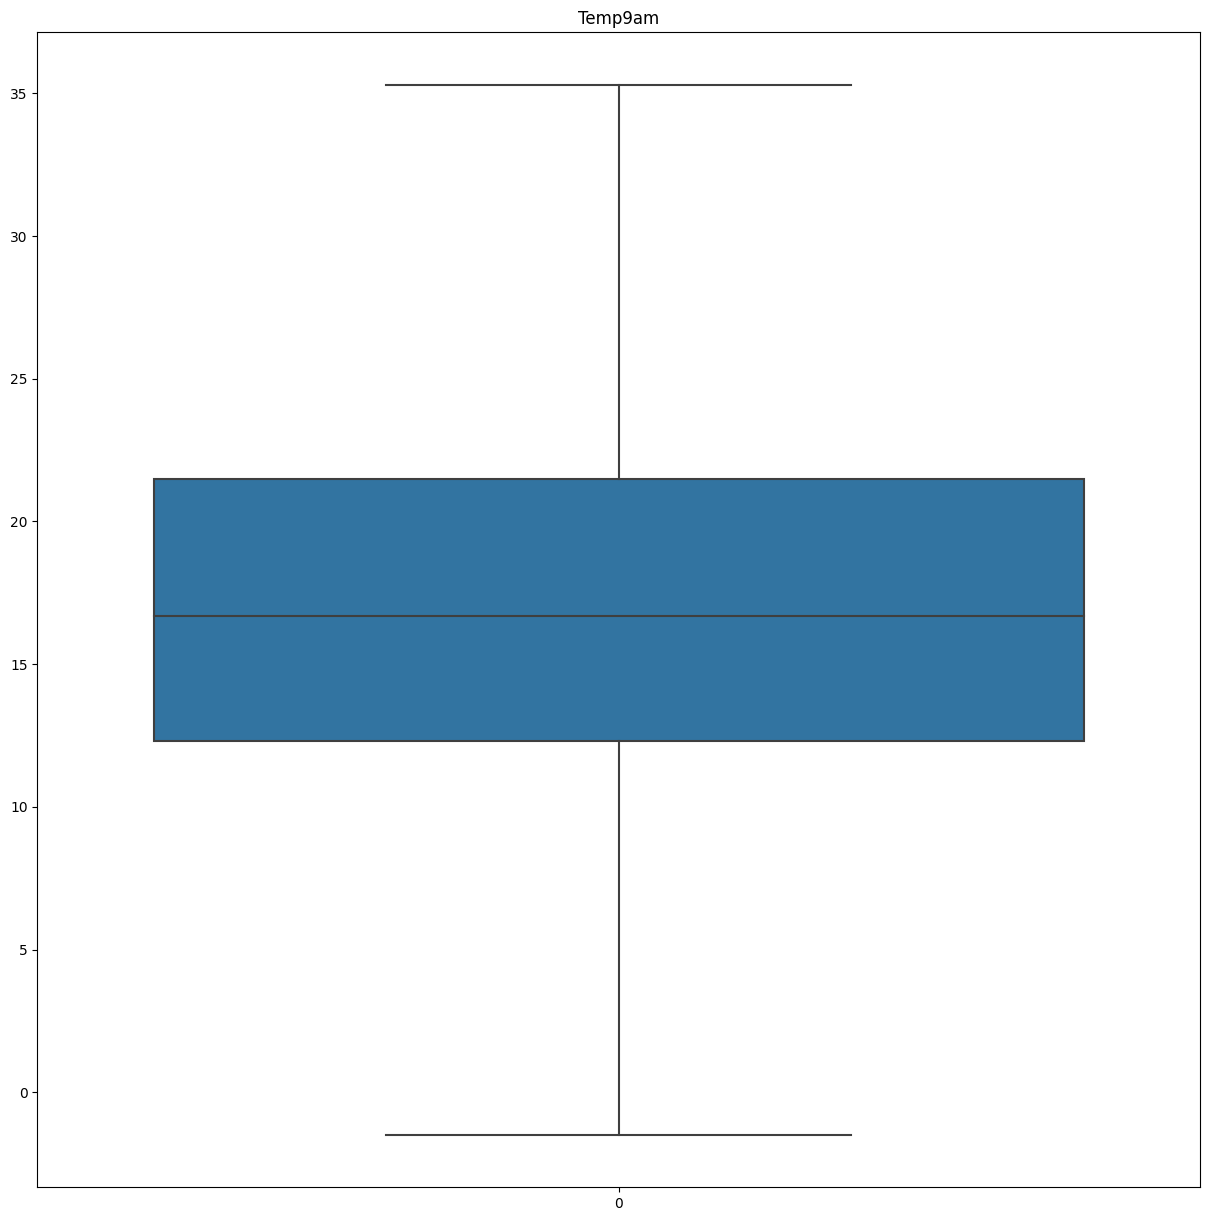

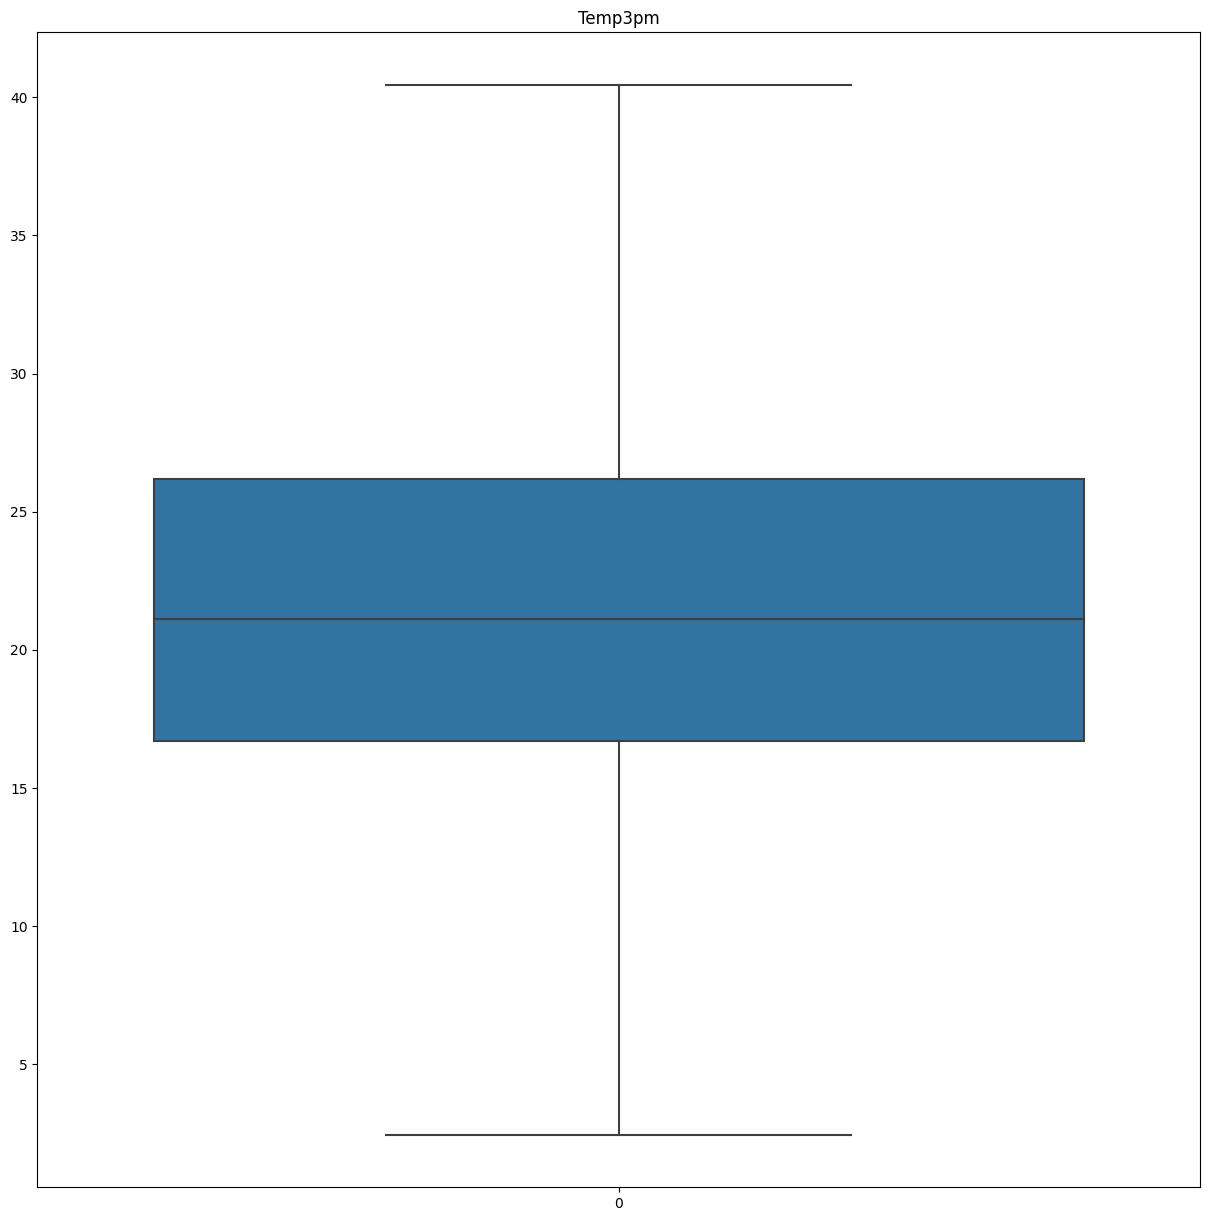

In [60]:
for feature in cont_features:
    plt.figure(figsize=(15, 15))  # Create a new figure
    sns.boxplot(weather_data[feature])  # Create a boxplot for the current feature
    plt.title(feature)  # Set the title of the plot
    plt.show()  # Display the plot

In [60]:
def qq_plots(weather_data, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    weather_data[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(weather_data[variable], dist="norm", plot=plt)
    plt.show()

In [61]:
import scipy.stats as stats
def qq_plots(weather_data, variable):
    plt.figure(figsize=(15, 6))
    
    # Histogram plot
    plt.subplot(1, 2, 1)
    weather_data[variable].hist()
    plt.title('Histogram of ' + variable)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    
    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(weather_data[variable], dist="norm", plot=plt)
    plt.title('Q-Q Plot of ' + variable)
    
    plt.tight_layout()
    plt.show()

In [62]:
weather_data.to_csv("preprocessed_1.csv", index=False)

In [63]:
X = weather_data.drop(["RainTomorrow", "Date"], axis=1)
Y = weather_data["RainTomorrow"]

In [59]:
# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(X)

In [64]:
from sklearn.model_selection import train_test_split

# Assuming X is your features and Y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)


In [65]:
y_train

43447     0
140904    0
54615     0
109793    0
74462     0
         ..
106567    0
52791     1
56339     0
82299     1
115175    0
Name: RainTomorrow, Length: 116368, dtype: uint8

In [66]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming X_train and y_train are your training features and labels after splitting
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("The number of classes before fit: {}".format(Counter(y_train)))
print("The number of classes after fit: {}".format(Counter(y_train_res)))


The number of classes before fit: Counter({0: 90866, 1: 25502})
The number of classes after fit: Counter({0: 90866, 1: 90866})


In [67]:
from catboost import CatBoostClassifier

# Assuming X_train_res and y_train_res are already defined after applying SMOTE
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC", random_state=0)  # Initialize CatBoostClassifier
cat.fit(X_train_res, y_train_res)  # Fit the model on the resampled data


Learning rate set to 0.050311
0:	total: 167ms	remaining: 5m 33s
1:	total: 182ms	remaining: 3m 1s
2:	total: 199ms	remaining: 2m 12s
3:	total: 217ms	remaining: 1m 48s
4:	total: 236ms	remaining: 1m 33s
5:	total: 252ms	remaining: 1m 23s
6:	total: 267ms	remaining: 1m 16s
7:	total: 283ms	remaining: 1m 10s
8:	total: 298ms	remaining: 1m 6s
9:	total: 315ms	remaining: 1m 2s
10:	total: 333ms	remaining: 1m
11:	total: 350ms	remaining: 57.9s
12:	total: 364ms	remaining: 55.6s
13:	total: 380ms	remaining: 53.9s
14:	total: 395ms	remaining: 52.2s
15:	total: 411ms	remaining: 50.9s
16:	total: 430ms	remaining: 50.1s
17:	total: 448ms	remaining: 49.3s
18:	total: 462ms	remaining: 48.1s
19:	total: 475ms	remaining: 47s
20:	total: 489ms	remaining: 46.1s
21:	total: 503ms	remaining: 45.2s
22:	total: 517ms	remaining: 44.4s
23:	total: 532ms	remaining: 43.8s
24:	total: 546ms	remaining: 43.1s
25:	total: 560ms	remaining: 42.5s
26:	total: 574ms	remaining: 42s
27:	total: 588ms	remaining: 41.4s
28:	total: 602ms	remaining: 

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming cat is your trained CatBoostClassifier and X_test, y_test are defined
y_pred = cat.predict(X_test)  # Predict labels for X_test

# Evaluate the predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # Print confusion matrix
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))  # Print accuracy score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Print classification report


[[21520  1197]
 [ 2777  3598]]
0.8633988725422796
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22717
           1       0.75      0.56      0.64      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.76      0.78     29092
weighted avg       0.86      0.86      0.86     29092



In [ ]:
from sklearn import metrics


# Plot ROC curve
metrics.plot_roc_curve(cat, X_test, y_test)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Calculate ROC AUC score
roc_auc = metrics.roc_auc_score(y_test, y_pred, average=None)
print("ROC AUC Score (Macro):", roc_auc)


In [70]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Fit the model on the resampled data
rf.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=0)

In [72]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20633  2084]
 [ 2470  3905]]
0.8434621201704936
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22717
           1       0.65      0.61      0.63      6375

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.77     29092
weighted avg       0.84      0.84      0.84     29092



0.7604057771367561

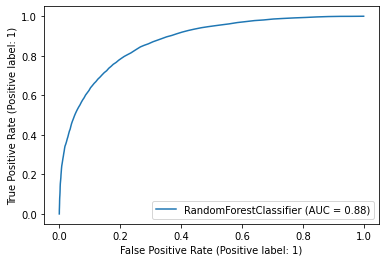

In [73]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [71]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=0)

# Fit the model on the resampled data
logreg.fit(X_train_res, y_train_res)


c:\Users\ARYAN THAKUR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [72]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17583  5134]
 [ 1514  4861]]
0.7714835693661488
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     22717
           1       0.49      0.76      0.59      6375

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.72     29092
weighted avg       0.83      0.77      0.79     29092



In [77]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the resampled data
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [78]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[17078  5639]
 [ 1661  4714]]
0.7490719098033823
              precision    recall  f1-score   support

           0       0.91      0.75      0.82     22717
           1       0.46      0.74      0.56      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.75      0.69     29092
weighted avg       0.81      0.75      0.77     29092



0.7456113906230715

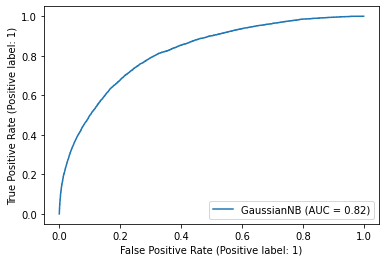

In [79]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

In [74]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier with n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the resampled data
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [75]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[17558  5159]
 [ 1824  4551]]
0.7599683761858931
              precision    recall  f1-score   support

           0       0.91      0.77      0.83     22717
           1       0.47      0.71      0.57      6375

    accuracy                           0.76     29092
   macro avg       0.69      0.74      0.70     29092
weighted avg       0.81      0.76      0.78     29092



0.7420022078999315

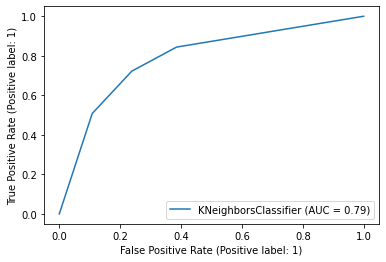

In [86]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None) 

In [76]:
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=0)

# Fit the model on the resampled data
xgb.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [77]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[21283  1434]
 [ 2743  3632]]
0.8564210092121546
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     22717
           1       0.72      0.57      0.63      6375

    accuracy                           0.86     29092
   macro avg       0.80      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



0.7478660345064204

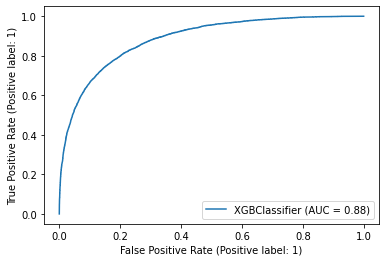

In [89]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None) 

In [78]:
from sklearn.svm import SVC

# Initialize SVC
svc = SVC(random_state=0)

# Fit the model on the resampled data
svc.fit(X_train_res, y_train_res)


In [ ]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[17824  4893]
 [ 1594  4781]]
0.7770177368348687
              precision    recall  f1-score   support

           0       0.92      0.78      0.85     22717
           1       0.49      0.75      0.60      6375

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.72     29092
weighted avg       0.83      0.78      0.79     29092



0.7672857141624093

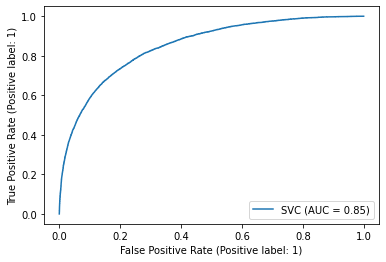

In [92]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None) 

In [93]:
# joblib.dump(rf, "rf.pkl")
# joblib.dump(cat, "cat.pkl")
# joblib.dump(logreg, "logreg.pkl")
# joblib.dump(gnb, "gnb.pkl")
# joblib.dump(knn, "knn.pkl")
import joblib

# Assuming svc and xgb are already trained models

# Save SVC model to file
joblib.dump(svc, "svc.pkl")

# Save XGBoost model to file
joblib.dump(xgb, "xgb.pkl")


['xgb.pkl']